In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SVMSMOTE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy.stats import chi2
from sklearn.utils.extmath import cartesian
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from scipy.stats import norm
from numpy import inf
from sklearn.decomposition import TruncatedSVD


warnings.filterwarnings('ignore')

## DATA WRANGLING

### Importing the Data

In [2]:
data = pd.read_csv('learningSet.csv')

In [3]:
copy = pd.read_csv('learningSet.csv')

### Exploring the Data

We will check the data types, unique values, null values and statistical overview of the data

### Data Overview

In [4]:
data.shape

(95412, 481)

In [5]:
data.describe()

ODATEDW         TCODE           DOB           AGE       NUMCHLD  \
count  95412.000000  95412.000000  95412.000000  71747.000000  12386.000000   
mean    9141.363256     54.223117   2723.602933     61.611649      1.527773   
std      343.454752    953.844476   2132.241295     16.664199      0.806861   
min     8306.000000      0.000000      0.000000      1.000000      1.000000   
25%     8801.000000      0.000000    201.000000     48.000000      1.000000   
50%     9201.000000      1.000000   2610.000000     62.000000      1.000000   
75%     9501.000000      2.000000   4601.000000     75.000000      2.000000   
max     9701.000000  72002.000000   9710.000000     98.000000      7.000000   

             INCOME       WEALTH1           HIT       MBCRAFT      MBGARDEN  \
count  74126.000000  50680.000000  95412.000000  42558.000000  42558.000000   
mean       3.886248      5.345699      3.321438      0.152075      0.059166   
std        1.854960      2.742490      9.306899      0.470023      0.262078   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      3.000000      0.000000      0.000000      0.000000   
50%        4.000000      6.000000      0.000000      0.000000      0.000000   
75%        5.000000      8.000000      3.000000      0.000000      0.000000   
max        7.000000      9.000000    241.000000      6.000000      4.000000   

       ...      FISTDATE      NEXTDATE       TIMELAG       AVGGIFT  \
count  ...  95412.000000  85439.000000  85439.000000  95412.000000   
mean   ...   9135.651648   9151.022917      8.093739     13.347786   
std    ...    320.394019    294.257260      8.213242     10.769997   
min    ...      0.000000   7211.000000      0.000000      1.285714   
25%    ...   8810.000000   8903.000000      4.000000      8.384615   
50%    ...   9201.000000   9204.000000      6.000000     11.636364   
75%    ...   9409.000000   9409.000000     11.000000     15.477955   
max    ...   9603.000000   9702.000000   1088.000000   1000.000000   

            CONTROLN      TARGET_B      TARGET_D      HPHONE_D        RFA_2F  \
count   95412.000000  95412.000000  95412.000000  95412.000000  95412.000000   
mean    95778.176959      0.050759      0.793073      0.500618      1.910053   
std     55284.596094      0.219506      4.429725      0.500002      1.072749   
min         1.000000      0.000000      0.000000      0.000000      1.000000   
25%     47910.750000      0.000000      0.000000      0.000000      1.000000   
50%     95681.500000      0.000000      0.000000      1.000000      2.000000   
75%    143643.500000      0.000000      0.000000      1.000000      3.000000   
max    191779.000000      1.000000    200.000000      1.000000      4.000000   

           CLUSTER2  
count  95280.000000  
mean      31.533711  
std       18.764614  
min        1.000000  
25%       15.000000  
50%       32.000000  
75%       49.000000  
max       62.000000  

[8 rows x 407 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 481 entries, ODATEDW to GEOCODE2
dtypes: float64(97), int64(310), object(74)
memory usage: 350.1+ MB


In [7]:
data = data.set_index('CONTROLN')

### Checking the Null Values

In [8]:
data.isna().sum()

ODATEDW       0
OSOURCE       0
TCODE         0
STATE         0
ZIP           0
           ... 
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
CLUSTER2    132
GEOCODE2    132
Length: 480, dtype: int64

In [9]:
def check_nan(df):
    nulls = pd.DataFrame((df.isna().sum()/len(df))*100)
    nulls = nulls.reset_index()
    nulls.columns = ['column_name', 'percentage_null_values']
    nulls.sort_values(by='percentage_null_values', ascending = False, inplace = True)
    return nulls

In [10]:
nulls = check_nan(data)
nulls

column_name  percentage_null_values
414     RDATE_5               99.990567
436     RAMNT_5               99.990567
412     RDATE_3               99.746363
434     RAMNT_3               99.746363
413     RDATE_4               99.705488
..          ...                     ...
168       ETHC3                0.000000
167       ETHC2                0.000000
166       ETHC1                0.000000
165       HHD12                0.000000
240       TPE11                0.000000

[480 rows x 2 columns]

In [11]:
only_nulls = nulls[nulls['percentage_null_values']>0]
only_nulls.describe()

percentage_null_values
count               92.000000
mean                58.770249
std                 32.281668
min                  0.138347
25%                 32.986941
50%                 63.800675
75%                 87.160944
max                 99.990567

#### We create a list where we will put the columns we want to drop 
OSOURCE - symbol definitions not provided, too many categories \
ZIP CODE - we are including state already

In [12]:
data['ZIP']

CONTROLN
95515     61081
148535    91326
15078     27017
172556    95953
7112      33176
          ...  
184568    99504
122706    77379
189641    48910
4693      91320
185114    28409
Name: ZIP, Length: 95412, dtype: object

In [13]:
drop_1 = data[['OSOURCE','ZIP']]
drop_list = drop_1.columns.tolist()
drop_list

['OSOURCE', 'ZIP']

#### Identify columns that over 85% missing values

In [14]:
eighty_five = nulls[nulls['percentage_null_values']>=85]
eighty_five

column_name  percentage_null_values
414     RDATE_5               99.990567
436     RAMNT_5               99.990567
412     RDATE_3               99.746363
434     RAMNT_3               99.746363
413     RDATE_4               99.705488
435     RAMNT_4               99.705488
415     RDATE_6               99.186685
437     RAMNT_6               99.186685
424    RDATE_15               92.388798
446    RAMNT_15               92.388798
432    RDATE_23               91.763091
454    RAMNT_23               91.763091
451    RAMNT_20               91.732696
429    RDATE_20               91.732696
416     RDATE_7               90.677273
438     RAMNT_7               90.677273
426    RDATE_17               90.146942
448    RAMNT_17               90.146942
430    RDATE_21               90.029556
452    RAMNT_21               90.029556
441    RAMNT_10               89.035970
419    RDATE_10               89.035970
444    RAMNT_13               87.160944
422    RDATE_13               87.160944
23      NUMCHLD               87.018404

In [15]:
for name in eighty_five.column_name:
    drop_list.append(name)
    
drop_list

['OSOURCE',
 'ZIP',
 'RDATE_5',
 'RAMNT_5',
 'RDATE_3',
 'RAMNT_3',
 'RDATE_4',
 'RAMNT_4',
 'RDATE_6',
 'RAMNT_6',
 'RDATE_15',
 'RAMNT_15',
 'RDATE_23',
 'RAMNT_23',
 'RAMNT_20',
 'RDATE_20',
 'RDATE_7',
 'RAMNT_7',
 'RDATE_17',
 'RAMNT_17',
 'RDATE_21',
 'RAMNT_21',
 'RAMNT_10',
 'RDATE_10',
 'RAMNT_13',
 'RDATE_13',
 'NUMCHLD']

#### Removing those columns from the dataframe

In [16]:
df = data.drop(columns=drop_list, axis = 1)
nulls_2 = check_nan(df)
nulls_2 = nulls_2[nulls_2['percentage_null_values']>0]
nulls_2

column_name  percentage_null_values
411    RDATE_11               84.551209
421    RAMNT_11               84.551209
426    RAMNT_19               83.359535
416    RDATE_19               83.359535
420     RAMNT_9               82.461326
..          ...                     ...
194         DMA                0.138347
452    GEOCODE2                0.138347
193         ADI                0.138347
192         MSA                0.138347
451    CLUSTER2                0.138347

[67 rows x 2 columns]

In [17]:
nulls_2.describe()

percentage_null_values
count               67.000000
mean                45.921130
std                 28.493307
min                  0.138347
25%                 21.814342
50%                 55.395548
75%                 73.064185
max                 84.551209

### Data Cleaning

#### Cleaning Gender

In [18]:
df.GENDER.value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [19]:
df['GENDER'] = np.where(df['GENDER'].isin(['F','M']), df['GENDER'], "other")
df.GENDER.value_counts()

F        51277
M        39094
other     5041
Name: GENDER, dtype: int64

#### Checking and cleaning the Nans in GENDER
No nulls in the column

In [20]:
df.GENDER.isna().sum()

0

### Checking for constants
I will check if any of the columns have only one unique value and then drop them

In [21]:
unique = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        unique.append(col)
        df.drop(col,inplace=True,axis=1)
print(unique)
df.shape

['RFA_2R']


(95412, 452)

## Lab | Feature engineering

In [22]:
numericals = df.select_dtypes(np.number)
numericals.head()

ODATEDW  TCODE   DOB   AGE  INCOME  WEALTH1  HIT  MBCRAFT  MBGARDEN  \
CONTROLN                                                                        
95515        8901      0  3712  60.0     NaN      NaN    0      NaN       NaN   
148535       9401      1  5202  46.0     6.0      9.0   16      0.0       0.0   
15078        9001      1     0   NaN     3.0      1.0    2      0.0       0.0   
172556       8701      0  2801  70.0     1.0      4.0    2      0.0       0.0   
7112         8601      0  2001  78.0     3.0      2.0   60      1.0       0.0   

          MBBOOKS  ...  LASTDATE  FISTDATE  NEXTDATE  TIMELAG    AVGGIFT  \
CONTROLN           ...                                                     
95515         NaN  ...      9512      8911    9003.0      4.0   7.741935   
148535        3.0  ...      9512      9310    9504.0     18.0  15.666667   
15078         1.0  ...      9512      9001    9101.0     12.0   7.481481   
172556        0.0  ...      9512      8702    8711.0      9.0   6.812500   
7112          9.0  ...      9601      7903    8005.0     14.0   6.864865   

          TARGET_B  TARGET_D  HPHONE_D  RFA_2F  CLUSTER2  
CONTROLN                                                  
95515            0       0.0         0       4      39.0  
148535           0       0.0         0       2       1.0  
15078            0       0.0         1       4      60.0  
172556           0       0.0         1       4      41.0  
7112             0       0.0         1       2      26.0  

[5 rows x 381 columns]

In [23]:
n_nulls = check_nan(numericals)
n_nulls.describe()

percentage_null_values
count              381.000000
mean                 8.075006
std                 21.152714
min                  0.000000
25%                  0.000000
50%                  0.000000
75%                  0.000000
max                 84.551209

In [24]:
[len(n_nulls[n_nulls['percentage_null_values']>0]), len(n_nulls[n_nulls['percentage_null_values']==0])]

[66, 315]

In [25]:
only_n_nulls = n_nulls[n_nulls['percentage_null_values']>0]
null_columns = only_n_nulls.column_name.to_list()
only_n_nulls

column_name  percentage_null_values
345    RDATE_11               84.551209
355    RAMNT_11               84.551209
360    RAMNT_19               83.359535
350    RDATE_19               83.359535
344     RDATE_9               82.461326
..          ...                     ...
316     ADATE_3                2.043768
151         DMA                0.138347
150         ADI                0.138347
149         MSA                0.138347
380    CLUSTER2                0.138347

[66 rows x 2 columns]

In [26]:
only_n_nulls.describe()

percentage_null_values
count               66.000000
mean                46.614809
std                 28.135797
min                  0.138347
25%                 22.291483
50%                 55.395548
75%                 73.064185
max                 84.551209

In [27]:
numericals.corrwith(numericals['TARGET_D']).sort_values(ascending=False)

TARGET_D    1.000000
TARGET_B    0.774232
RAMNT_9     0.090168
RAMNT_14    0.084498
RAMNT_22    0.081324
              ...   
IC15       -0.025528
EC4        -0.026064
CLUSTER2   -0.029087
ADATE_5          NaN
ADATE_15         NaN
Length: 381, dtype: float64

### Cleaning GEOCODE2

In [28]:
df.GEOCODE2.value_counts()

A    34484
B    28505
D    16580
C    15524
       187
Name: GEOCODE2, dtype: int64

In [29]:
df.GEOCODE2.unique()

array(['C', 'A', 'D', 'B', ' ', nan], dtype=object)

In [30]:
df.GEOCODE2.isna().sum()

132

In [31]:
round(len(df[df['GEOCODE2'] == ' '])/df.shape[0]*100,2), round(df.GEOCODE2.isna().sum()/df.shape[0]*100,2)

(0.2, 0.14)

In [32]:
def drop_fill(df, cols = []):
    for col in cols:
        _ = round(len(df[df[col] == ' '])/df.shape[0]*100,2)
        print(_, ' blank values')
        if _ < 5:
            df[col] = df[col].replace(r'^\s*$', np.nan, regex=True)
            n = round(df[col].isna().sum()/df.shape[0]*100,2)
            print(n, 'NaN values')
            if n >= 5:
                df[col].fillna(mode, inplace=True)
            else:
                df = df[~df[col].isna()]
    return df

In [33]:
df = drop_fill(df, cols = ['GEOCODE2'])
df.GEOCODE2.value_counts()

0.2  blank values
0.33 NaN values


A    34484
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [34]:
df.GEOCODE2.unique()

array(['C', 'A', 'D', 'B'], dtype=object)

### Cleaning WEALTH1

In [35]:
df.WEALTH1.unique()

array([nan,  9.,  1.,  4.,  2.,  6.,  0.,  5.,  8.,  3.,  7.])

In [36]:
df.WEALTH1.value_counts()

9.0    7578
8.0    6784
7.0    6192
6.0    5816
5.0    5272
4.0    4807
3.0    4230
2.0    4080
1.0    3450
0.0    2409
Name: WEALTH1, dtype: int64

In [37]:
round(df.WEALTH1.isna().sum()/df.shape[0]*100,2)

46.77

##### Replacing NaN with KNN Imputation
###### Define imputer

In [38]:
df.HIT.isna().sum()

0

In [39]:
df2 = df[['WEALTH1','HIT']].copy()
df2.head()

WEALTH1  HIT
CONTROLN              
95515         NaN    0
148535        9.0   16
15078         1.0    2
172556        4.0    2
7112          2.0   60

In [40]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputed = imputer.fit_transform(df2)
df_imputed = pd.DataFrame(imputed, columns=df2.columns)
df_imputed['WEALTH1'].unique()

array([6.2, 9. , 1. , 4. , 2. , 6. , 0. , 5. , 8. , 3. , 7. ])

In [41]:
df_imputed['WEALTH1'].isna().sum()

0

In [42]:
df['WEALTH1'] = df_imputed['WEALTH1'].values
df['WEALTH1'].value_counts()

6.2    44475
9.0     7578
8.0     6784
7.0     6192
6.0     5816
5.0     5272
4.0     4807
3.0     4230
2.0     4080
1.0     3450
0.0     2409
Name: WEALTH1, dtype: int64

In [43]:
df['WEALTH1'].isna().sum()

0

#### CLEANING ADI, MSA ans DMA

In [44]:
df.ADI.unique()

array([177.,  13., 281.,  67., 127., 185.,  91., 251., 391., 181., 269.,
        83., 107., 249., 291.,  57., 227., 329., 351.,  55., 133.,  51.,
        73., 159., 201.,  75., 233., 591., 203., 175.,  59., 105., 111.,
       173., 415., 323., 187.,  65., 412., 109., 425., 405., 197., 279.,
       645., 207.,  89., 361., 209., 213.,  15.,  21., 113., 131., 469.,
       199., 129., 441., 459., 235., 301.,  39., 429., 285., 245., 335.,
       393., 577., 439., 455., 383., 263.,   0., 427., 307., 275., 119.,
       229., 273., 325., 371., 377., 315., 342., 421., 219.,  61.,  93.,
       375., 283., 381., 243., 353., 613., 339., 367., 417., 299., 271.,
       157.,  77., 327.,  53.,  87., 451., 627.,  71., 253., 363., 403.,
       115., 389.,  63., 321., 448., 237., 217., 241., 123., 221., 165.,
       277.,  85., 319., 247.,  69., 379.,  95.,  17., 625., 462., 303.,
       179., 331., 231., 337., 257., 409., 457., 359., 373., 413., 215.,
       205., 313., 211., 305., 355., 419., 473., 42

In [45]:
df.MSA.unique()

array([   0., 4480., 9340., 5000., 2030., 3960., 5360., 3480.,  760.,
       2160., 5960., 5120.,  440., 6580., 1600.,  680., 3360., 7040.,
       2920., 3120., 6440.,  640., 6120., 3000., 7600., 2680., 5080.,
       1360., 2180., 4420., 1960., 6640., 7360., 5945., 1920., 1145.,
       7520., 2800., 1520., 7510., 1620., 4520., 7320.,  720., 4720.,
       1560., 8960.,   40., 6720.,  520., 9360., 3710., 8280., 6760.,
       3160., 5560., 3600., 6780., 5800., 4120., 5160., 5880.,  380.,
       3440., 2710., 2020., 9040., 6200., 6880., 6920., 2760., 7080.,
       4080., 2580., 4100., 5790., 4200.,  600., 4680., 4040., 1640.,
       5775., 8720., 3980., 2240., 1720., 5910., 9260.,  200., 7400.,
       1020., 3290., 2720., 7240., 3800., 8120.,  870., 2320., 3760.,
       1040., 2840., 3880.,  920., 6080.,  460.,  320., 1400., 3320.,
       2640., 8200., 4890., 3660., 2670., 1000., 2520., 2440., 8520.,
       3720., 2080., 7500., 3920., 1125., 4400.,  840., 7485., 8750.,
       8735., 1150.,

In [46]:
df.DMA.unique()

array([682., 803., 518., 862., 528., 691., 509., 643., 624., 659., 671.,
       527., 613., 716., 770., 505., 717., 534., 560., 547., 571., 602.,
       800., 638., 618., 609., 820., 821., 635., 675., 563., 819., 617.,
       637., 606., 709., 632., 807., 698., 623., 507., 627., 524., 517.,
       539., 649., 868., 546., 529., 567., 825., 512., 669., 764., 575.,
       548., 662., 811., 801., 652., 771., 603., 556., 622., 561., 724.,
       804., 633., 839., 686., 650., 743., 619., 678., 753., 610., 745.,
       604., 749., 670., 765., 711., 553., 762., 520., 503., 551., 515.,
       647., 544., 676., 752., 545., 754., 810., 790., 656., 755., 641.,
       616., 628., 588., 581., 540., 658., 583., 866., 642., 746., 634.,
       648., 705., 725., 744., 513., 612., 813., 531., 751., 500., 630.,
       611., 789., 582., 693., 692., 828., 626., 710., 542., 855., 687.,
       679., 640., 722., 620., 881., 564., 522., 756., 570., 718., 530.,
       557., 625., 541., 657., 631., 550., 525., 60

In [47]:
df.ADI.isna().sum(), df.DMA.isna().sum(), df.MSA.isna().sum()

(0, 0, 0)

### Use appropriate EDA technique where ever necessary.

#### REMOVING COLUMNS
<b> Variance Threshold - Only for Numericals <b>
    
Removing the ones with low Variance.

###### We first isolate the targets the targets

In [48]:
targets = df[['TARGET_B', 'TARGET_D']]
numericals = df.select_dtypes(np.number)
numericals = numericals.drop(['TARGET_B', 'TARGET_D'], axis=1)
targets.value_counts()

TARGET_B  TARGET_D
0         0.00        90263
1         10.00         938
          15.00         589
          20.00         576
          5.00          503
                      ...  
          44.21           1
          16.87           1
          17.50           1
          18.25           1
          4.50            1
Length: 71, dtype: int64

In [49]:
def variance_threshold_selector(df, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(df)
    return df[df.columns[selector.get_support(indices=True)]], selector

num_v, selection = variance_threshold_selector(numericals, 0.9)

#### Looking at the removed columns:

In [50]:
removed_columns = pd.DataFrame(data=(numericals.columns,selection.variances_,selection.get_support()), index=('column_name','variance','statement')).T
removed_columns[removed_columns['statement'] == False]

column_name  variance statement
7       MBCRAFT  0.220838     False
8      MBGARDEN  0.068622     False
10     MBCOLECT  0.088459     False
11      MAGFAML  0.674372     False
12       MAGFEM  0.145178     False
13      MAGMALE  0.076321     False
14     PUBGARDN  0.240602     False
15     PUBCULIN  0.183116     False
17     PUBDOITY   0.53116     False
19     PUBPHOTO  0.006081     False
20       PUBOPP  0.772721     False
42         ETH6  0.462795     False
187        TPE6  0.534391     False
188        TPE7   0.48507     False
270        ANC5  0.502118     False
271        ANC6   0.28492     False
276       ANC11  0.752959     False
280       ANC15   0.15109     False
304        HC15  0.244465     False
312       MHUC2  0.738906     False
315     ADATE_2  0.000547     False
316     ADATE_3  0.000773     False
318     ADATE_5       0.0     False
319     ADATE_6  0.002227     False
322     ADATE_9  0.131066     False
323    ADATE_10  0.074742     False
324    ADATE_11  0.266743     False
325    ADATE_12  0.263175     False
326    ADATE_13  0.130027     False
327    ADATE_14  0.008527     False
328    ADATE_15       0.0     False
329    ADATE_16  0.021256     False
330    ADATE_17  0.073943     False
332    ADATE_19  0.086381     False
333    ADATE_20  0.000311     False
334    ADATE_21  0.066727     False
337    ADATE_24  0.004731     False
376    HPHONE_D  0.249997     False

<b> Recursive feature elimination: scoring method, ranking the most important - for Categoricals and Numericals <b>
    
It's not for target, only for columns.
    
Ideal step = 1

from sklearn.feature_selection import RFE
from sklearn import linear_model

lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=20, verbose=False, step=1)
rfe.fit(num_v, targets)

df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = numerical.columns
df[df['Rank']==1]

In [51]:
num_v.head()

ODATEDW  TCODE   DOB   AGE  INCOME  WEALTH1  HIT  MBBOOKS  PUBHLTH  \
CONTROLN                                                                       
95515        8901      0  3712  60.0     NaN      6.2    0      NaN      NaN   
148535       9401      1  5202  46.0     6.0      9.0   16      3.0      2.0   
15078        9001      1     0   NaN     3.0      1.0    2      1.0      1.0   
172556       8701      0  2801  70.0     1.0      4.0    2      0.0      0.0   
7112         8601      0  2001  78.0     3.0      2.0   60      9.0      4.0   

          PUBNEWFN  ...  MAXRAMNT  MAXRDATE  LASTGIFT  LASTDATE  FISTDATE  \
CONTROLN            ...                                                     
95515          NaN  ...      12.0      9402      10.0      9512      8911   
148535         3.0  ...      25.0      9512      25.0      9512      9310   
15078          0.0  ...      16.0      9207       5.0      9512      9001   
172556         0.0  ...      11.0      9411      10.0      9512      8702   
7112           1.0  ...      15.0      9601      15.0      9601      7903   

          NEXTDATE  TIMELAG    AVGGIFT  RFA_2F  CLUSTER2  
CONTROLN                                                  
95515       9003.0      4.0   7.741935       4      39.0  
148535      9504.0     18.0  15.666667       2       1.0  
15078       9101.0     12.0   7.481481       4      60.0  
172556      8711.0      9.0   6.812500       4      41.0  
7112        8005.0     14.0   6.864865       2      26.0  

[5 rows x 341 columns]

In [52]:
num_v.corrwith(targets['TARGET_D']).sort_values(ascending=False)

RAMNT_9     0.090858
RAMNT_14    0.084836
RAMNT_8     0.081792
RAMNT_22    0.081394
RAMNT_12    0.062646
              ...   
IC6        -0.023799
POBC2      -0.024603
IC15       -0.025591
EC4        -0.026256
CLUSTER2   -0.029202
Length: 341, dtype: float64

### Preparing data for EDA

###### Separating categorical data

In [53]:
categoricals = df.select_dtypes(np.object)
categoricals.head()

STATE MAILCODE PVASTATE NOEXCH RECINHSE RECP3 RECPGVG RECSWEEP  \
CONTROLN                                                                  
95515       IL                        0                                   
148535      CA                        0                                   
15078       NC                        0                                   
172556      CA                        0                                   
7112        FL                        0        X     X                    

         MDMAUD DOMAIN  ... RFA_20 RFA_21 RFA_22 RFA_23 RFA_24 RFA_2A  \
CONTROLN                ...                                             
95515      XXXX     T2  ...    S4E    S4E    S4E    S4E    S4E      E   
148535     XXXX     S1  ...    N1E    N1E    N1E           F1E      G   
15078      XXXX     R2  ...                  S4D    S4D    S3D      E   
172556     XXXX     R2  ...    A1D    A1D    A1D                    E   
7112       XXXX     S2  ...    A3D    A3D    I4E    A3D    A3D      F   

         MDMAUD_R MDMAUD_F MDMAUD_A GEOCODE2  
CONTROLN                                      
95515           X        X        X        C  
148535          X        X        X        A  
15078           X        X        X        C  
172556          X        X        X        C  
7112            X        X        X        A  

[5 rows x 71 columns]

###### Separating discrete and continuous data

In [54]:
def separate_num(df, count):
    continuous = []
    discrete = []
    for col in df:
        if len(df[col].value_counts()) > count:
            continuous.append(col)
        else:
            discrete.append(col)
    print(len(continuous), ' continuous numerical columns')
    print(len(discrete), 'discrete numerical columns')
    continuous_df = df[continuous]
    discrete_df = df[discrete]
    return continuous_df, discrete_df            

In [55]:
continuous_df, discrete_df = separate_num(num_v, 100)

31  continuous numerical columns
310 discrete numerical columns


##### Checking the continuous and discrete data that are the most correlated to the target

In [56]:
continuous_df.corrwith(targets['TARGET_D']).sort_values(ascending=False).head(10)
top10_c_D = pd.DataFrame(continuous_df.corrwith(targets['TARGET_D']).sort_values(ascending=False).head(10))
top10_c_D.columns = ['correlation']
top10_c_D

correlation
RAMNT_14     0.084836
RAMNT_8      0.081792
RAMNT_12     0.062646
LASTGIFT     0.062027
RAMNT_18     0.050520
RAMNTALL     0.044992
AVGGIFT      0.044589
HV2          0.040005
MAXRAMNT     0.039396
HV1          0.039212

In [57]:
continuous_df.corrwith(targets['TARGET_B']).sort_values(ascending=False).head(10)
top10_c_B = pd.DataFrame(continuous_df.corrwith(targets['TARGET_B']).sort_values(ascending=False).head(10))
top10_c_B.columns = ['correlation']
top10_c_B

correlation
NUMPROM      0.033250
HV2          0.025636
HV1          0.025034
DMA          0.022492
IC4          0.020724
IC5          0.020616
IC2          0.019983
IC3          0.019620
IC1          0.018304
RAMNTALL     0.014712

In [58]:
discrete_df.corrwith(targets['TARGET_B']).sort_values(ascending=False).head(10)
top10_d_B = pd.DataFrame(discrete_df.corrwith(targets['TARGET_B']).sort_values(ascending=False).head(10))
top10_d_B.columns = ['correlation']
top10_d_B

correlation
RFA_2F       0.071980
CARDGIFT     0.053968
NGIFTALL     0.050907
LASTDATE     0.041117
CARDPROM     0.032554
HVP4         0.024287
HVP3         0.024228
HVP2         0.023508
HVP1         0.022933
HVP5         0.022201

In [59]:
discrete_df.corrwith(targets['TARGET_D']).sort_values(ascending=False).head(10)
top10_d_D = pd.DataFrame(discrete_df.corrwith(targets['TARGET_D']).sort_values(ascending=False).head(10))
top10_d_D.columns = ['correlation']
top10_d_D

correlation
RAMNT_9      0.090858
RAMNT_22     0.081394
RAMNT_11     0.059071
RAMNT_24     0.055812
RAMNT_19     0.042778
HVP1         0.035695
HVP3         0.035581
HVP2         0.035394
HVP4         0.035159
HVP6         0.033030

In [60]:
CB = top10_c_B.index.to_list()
CD = top10_c_D.index.to_list()
DB = top10_d_B.index.to_list()
DD = top10_d_D.index.to_list()

We will run different series of plots for each type of data: continuous numerical, discrete numerical and categorical.

### Plotting the continuous data

#### Density plots

In [61]:
def check_dist(df, l):
    for column in df:  
        if column in l:
            plt.figure(figsize=(10,5))
            plt.xlabel(column)
            plt.ylabel('Density')
            sns.kdeplot(df[column],shade=True)
            plt.show()
    return plt.show()

Top 10 correlated with TARGET_B

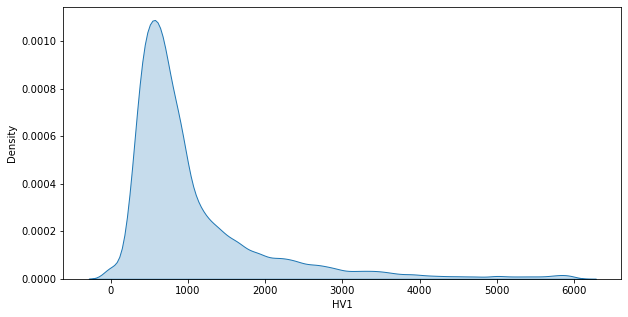

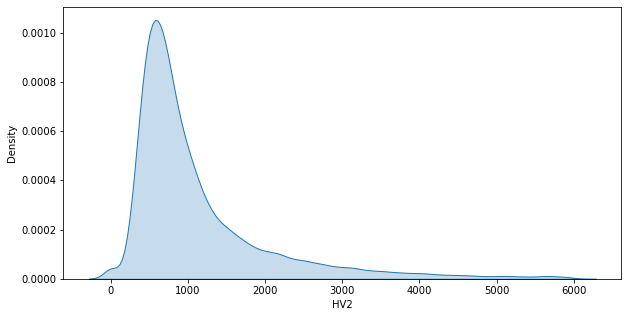

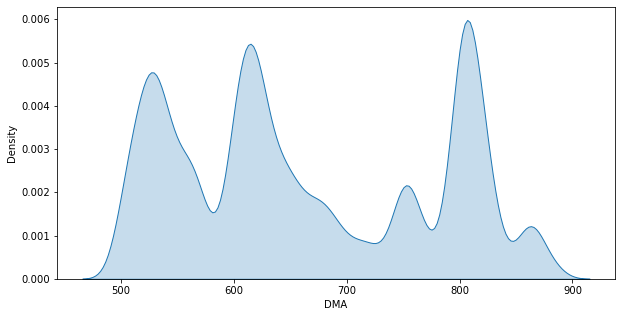

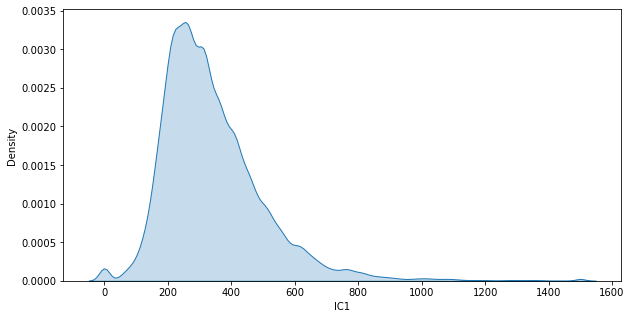

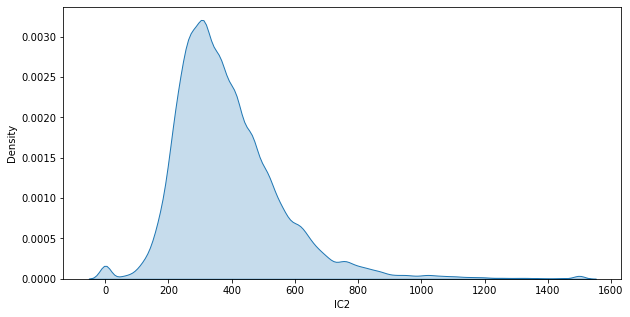

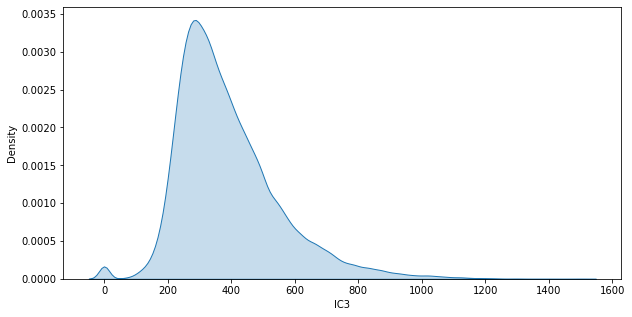

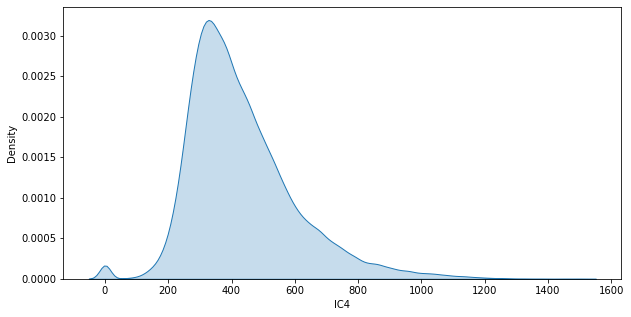

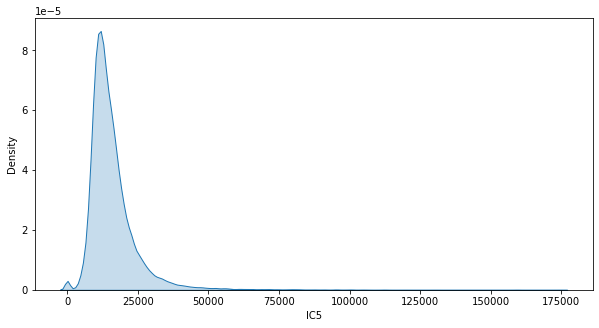

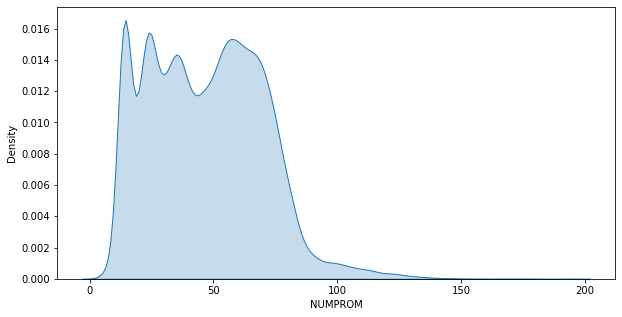

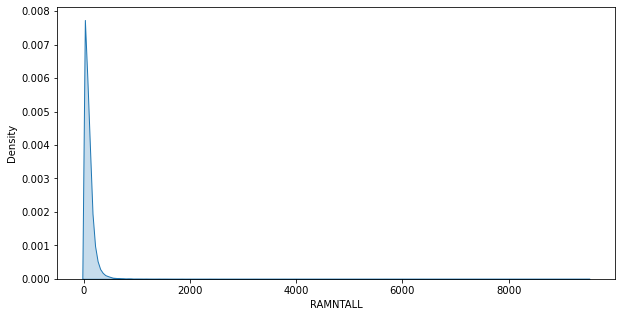

In [62]:
dist1 = check_dist(continuous_df, CB)

Top 10 correlated with TARGET_D

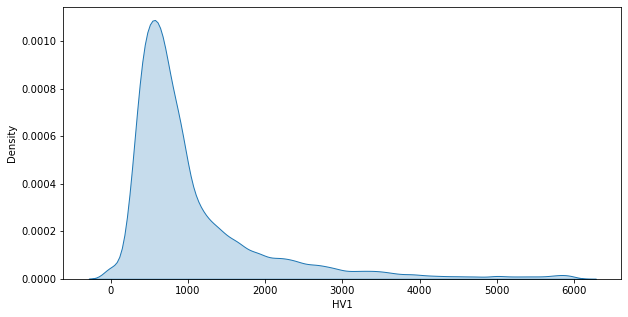

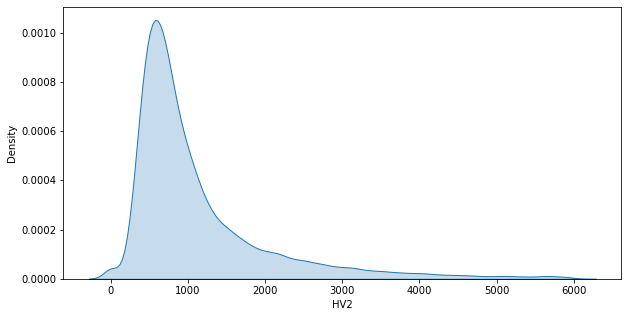

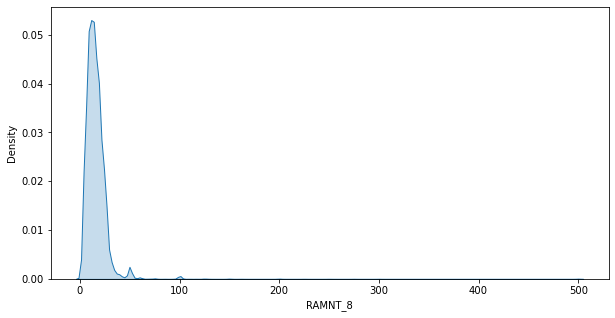

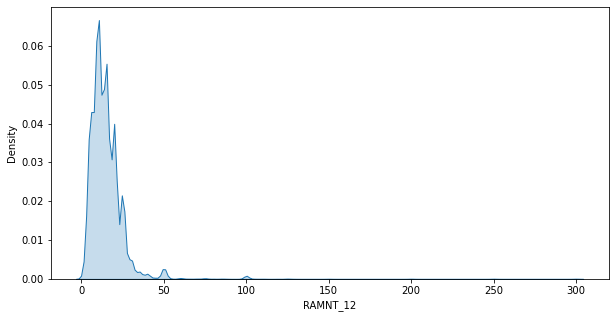

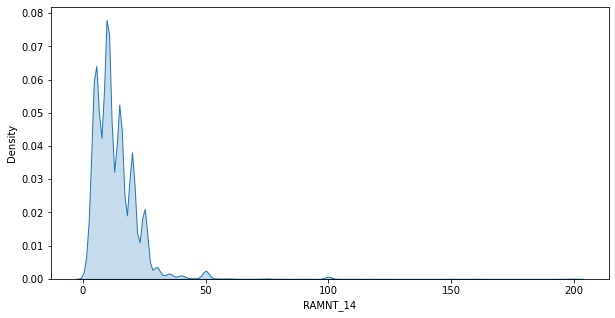

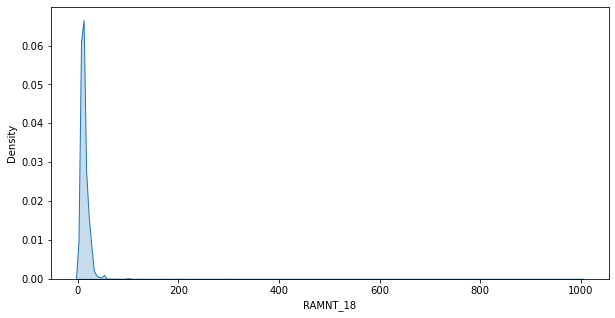

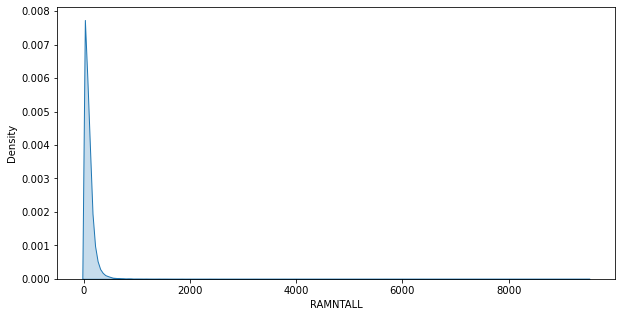

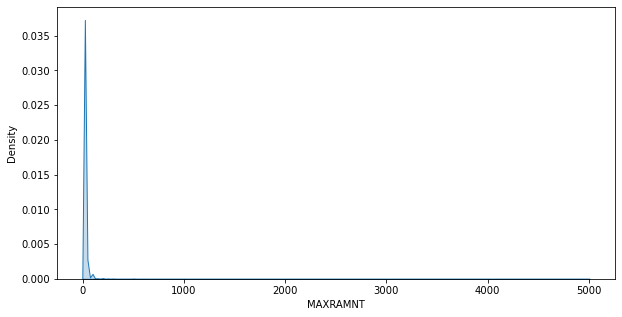

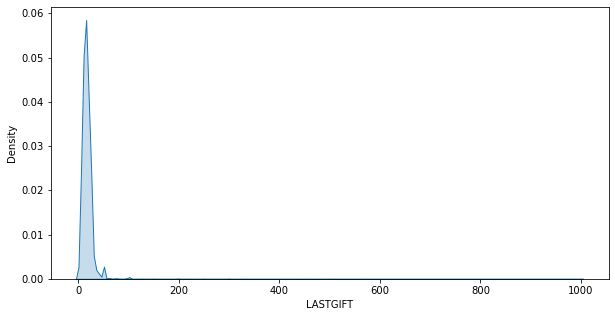

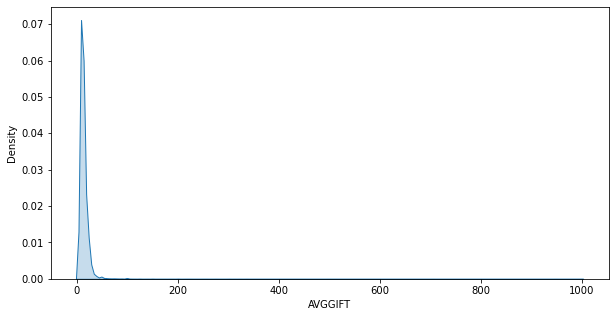

In [63]:
dist2 = check_dist(continuous_df, CD)

#### Boxen plots

Top 10 correlated with TARGET_B

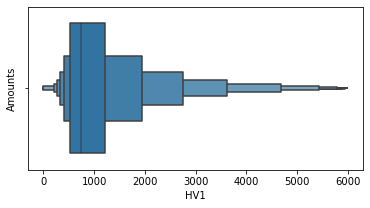

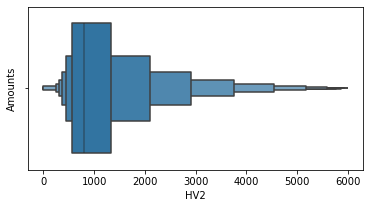

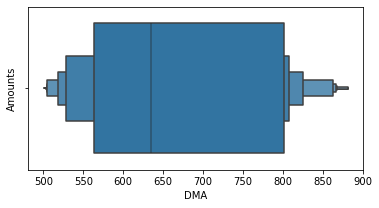

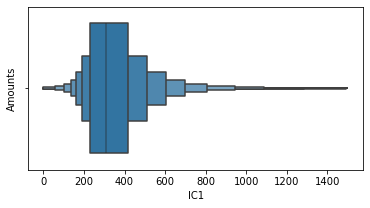

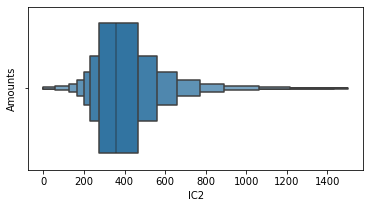

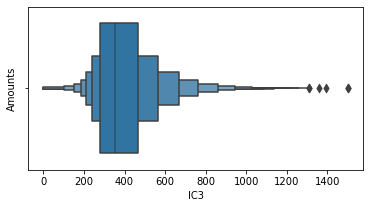

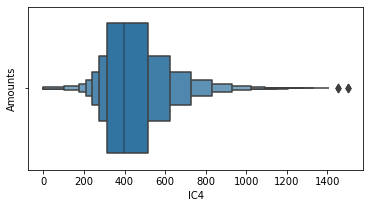

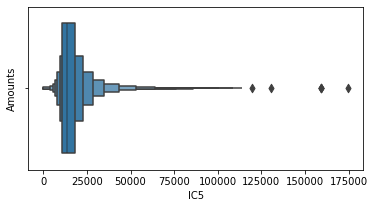

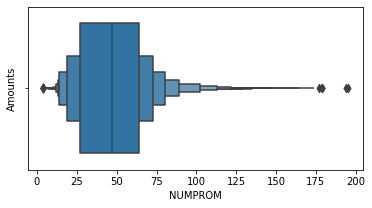

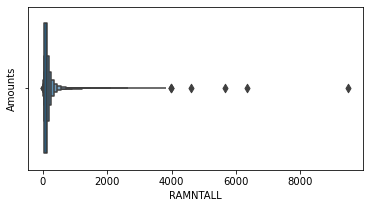

In [64]:
for column in continuous_df:      
    if column in CB:
        plt.figure(figsize=(6,3))
        plt.ylabel('Amounts')
        sns.boxenplot(x=continuous_df[column])
        plt.show()

Top 10 correlated with TARGET_D

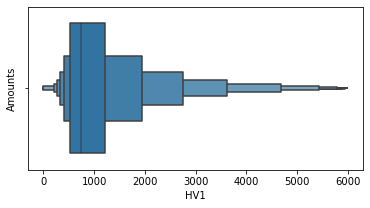

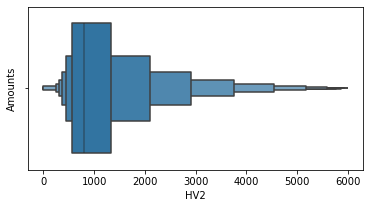

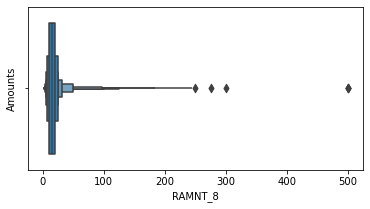

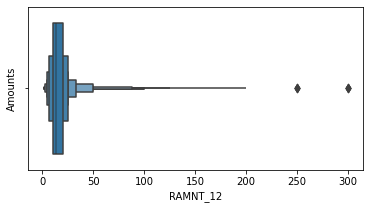

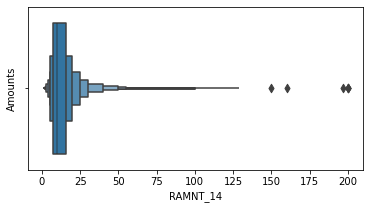

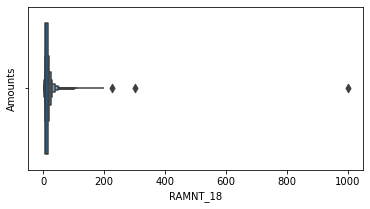

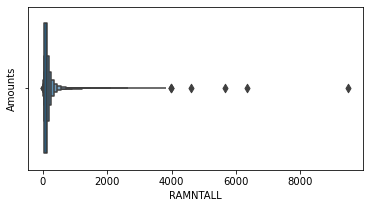

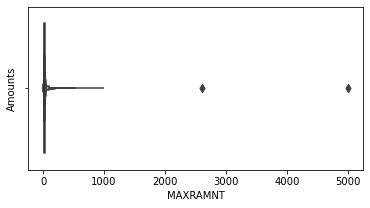

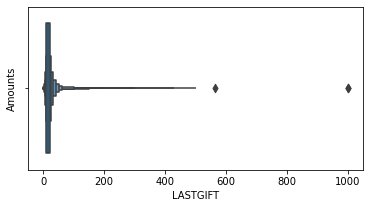

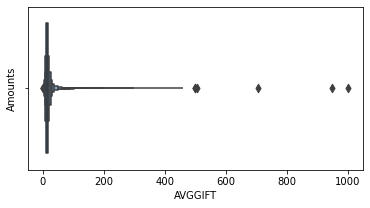

In [65]:
for column in continuous_df:      
    if column in CD:
        plt.figure(figsize=(6,3))
        plt.ylabel('Amounts')
        sns.boxenplot(x=continuous_df[column])
        plt.show()

#### Heatmap of the correlation matric for the most correlated variables with Target B - continuous data

In [66]:
def heatmap(df, l, targets):
    matrix = pd.concat([df[df.columns.intersection(l)], targets], axis=1)
    mask = np.zeros_like(matrix.corr())
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(12, 8))
    ax = sns.heatmap(matrix.corr(), mask=mask, annot=True, cmap='Blues')
    m = ax.get_figure()
    plt.show()
    return m

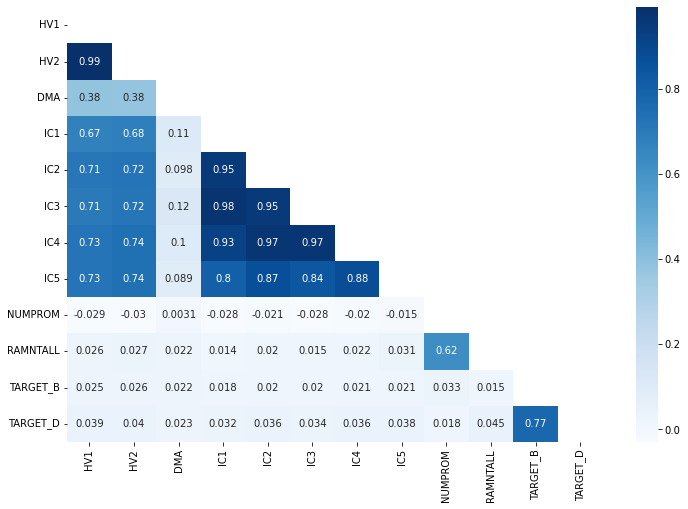

In [67]:
m1 = heatmap(continuous_df, CB, targets)

There are correlations higher than 0.9 between the IC variables and also between Hv1 and HV2. This level of colinearity will badly affect the model we will have to keep the colinear variables that are the most correlated to the target variables.

#### Heatmap of the correlation matric for the most correlated variables with Target D - continuous data

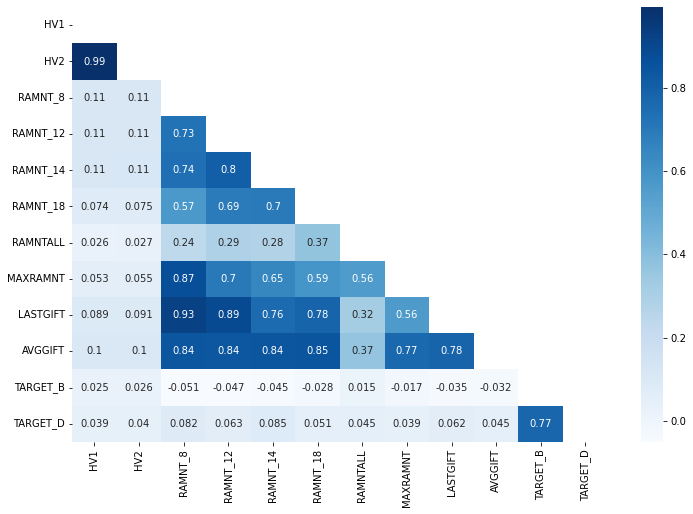

In [68]:
m2 = heatmap(continuous_df, CD, targets)

The RAMNT variables are all quite colinear with each other, especially RAMNT_12 and RAMNT_14. It might not be needed to keep all of them. Same observation for LASTGIFT and AVGGIFT, which on top of being highly correlated with each other are very correlated to the RAMNT variables as well.

### Plotting the discrete data

#### Histograms

Top 10 correlated with TARGET_D

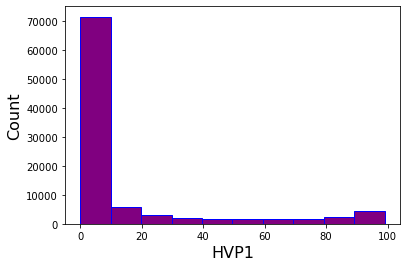

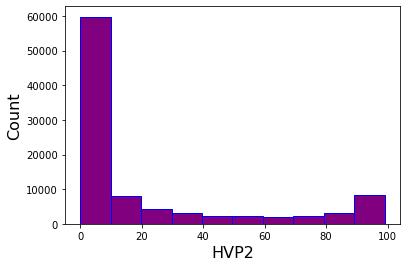

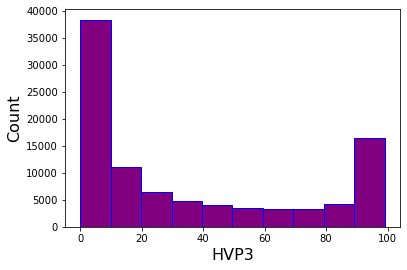

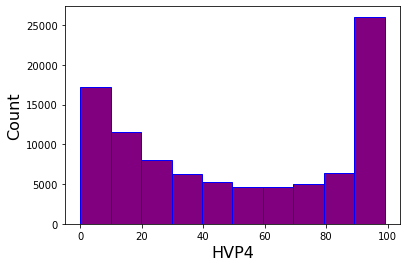

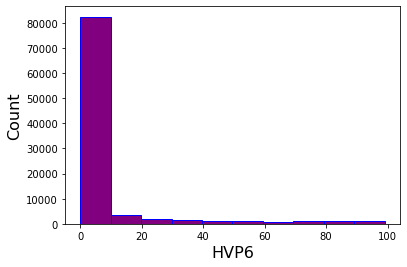

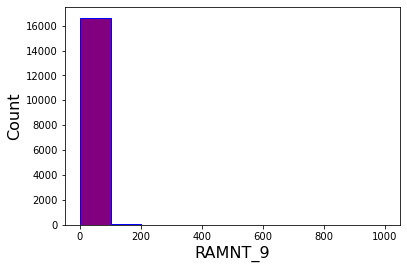

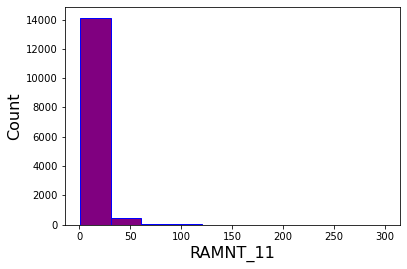

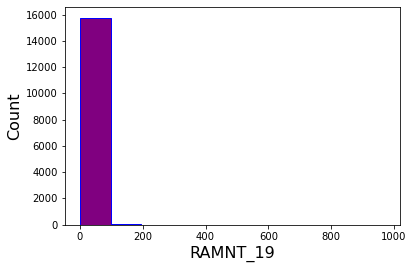

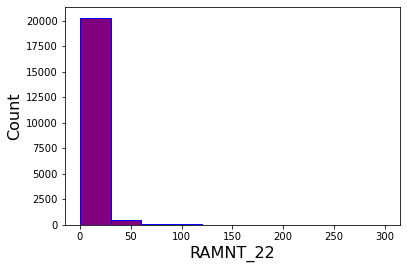

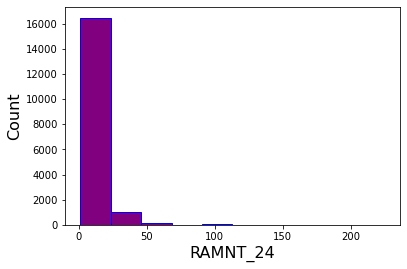

In [69]:
for column in discrete_df:
    if column in DD:
        plt.hist(discrete_df[column], bins=10, edgecolor="blue", color='purple')
        plt.xlabel(column, fontsize=16)
        plt.ylabel('Count', fontsize=16)
        plt.show()

Top 10 correlated with TARGET_B

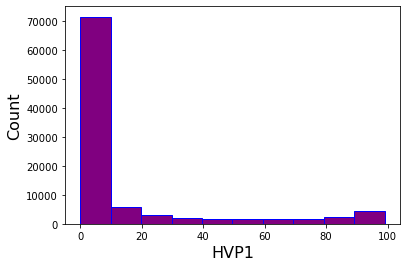

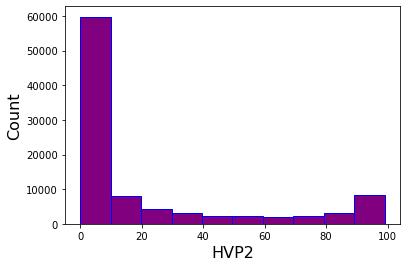

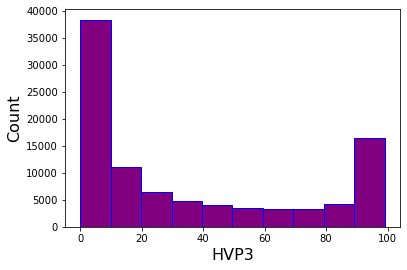

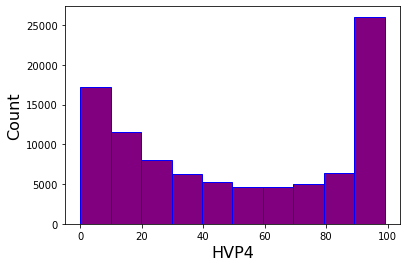

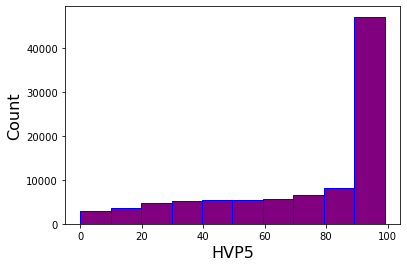

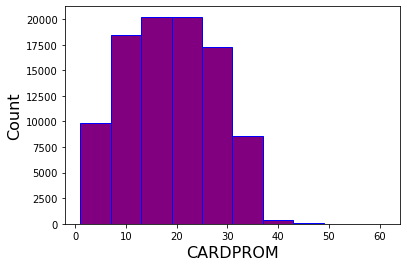

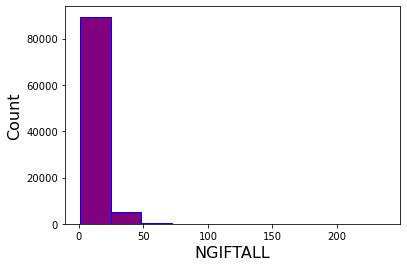

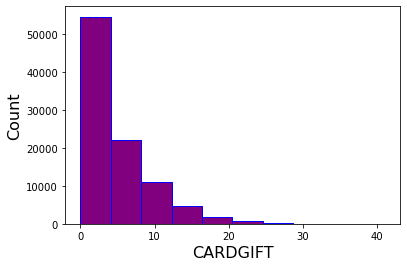

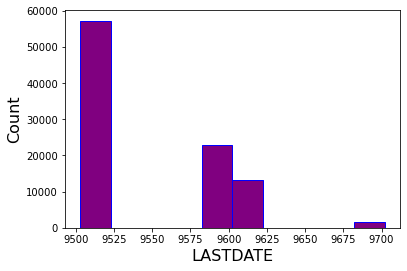

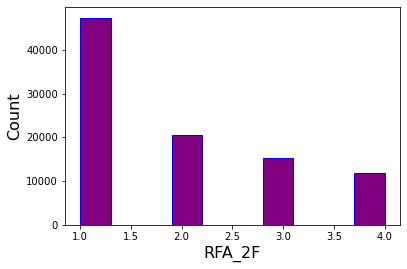

In [70]:
for column in discrete_df:
    if column in DB:
        plt.hist(discrete_df[column], bins=10, edgecolor="blue", color='purple')
        plt.xlabel(column, fontsize=16)
        plt.ylabel('Count', fontsize=16)
        plt.show()

#### Crosstabs

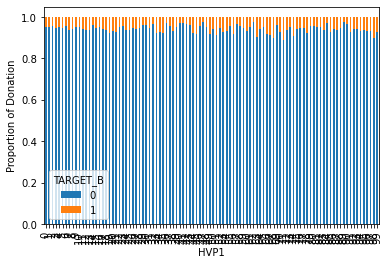

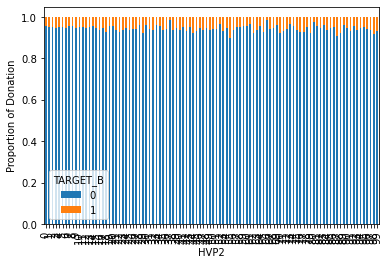

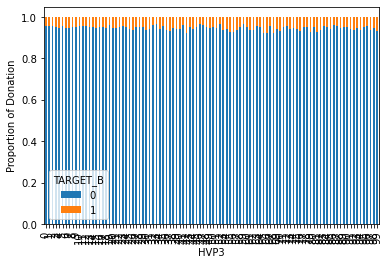

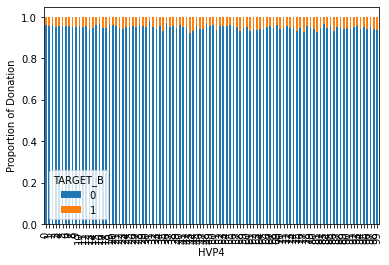

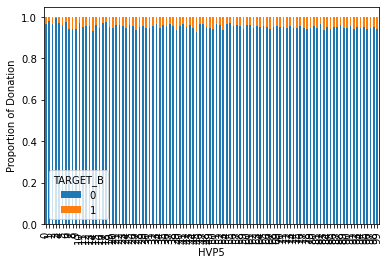

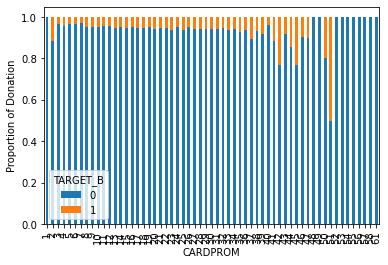

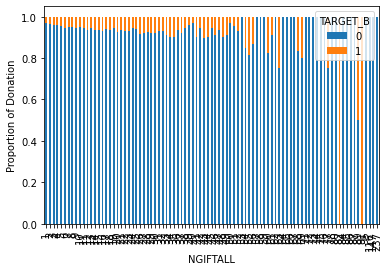

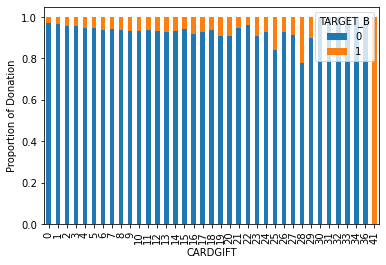

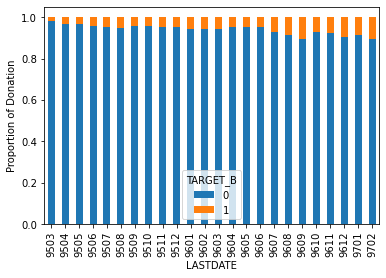

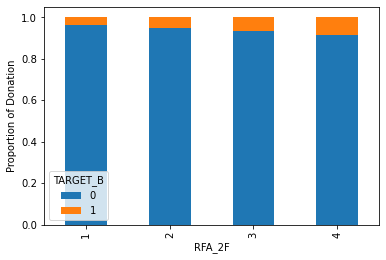

In [71]:
for column in discrete_df:
    if column in DB:
        table=pd.crosstab(discrete_df[column], targets['TARGET_B'])
        table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
        plt.xlabel(column)
        plt.ylabel('Proportion of Donation')

#### Heatmap of the correlation matric for the most correlated variables with Target B - discrete data

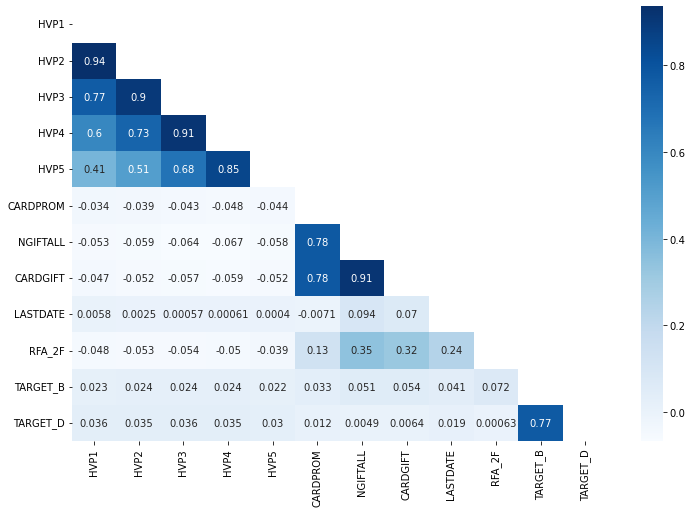

In [72]:
m3 = heatmap(discrete_df, DB, targets)

#### Heatmap of the correlation matric for the most correlated variables with Target B - discrete data

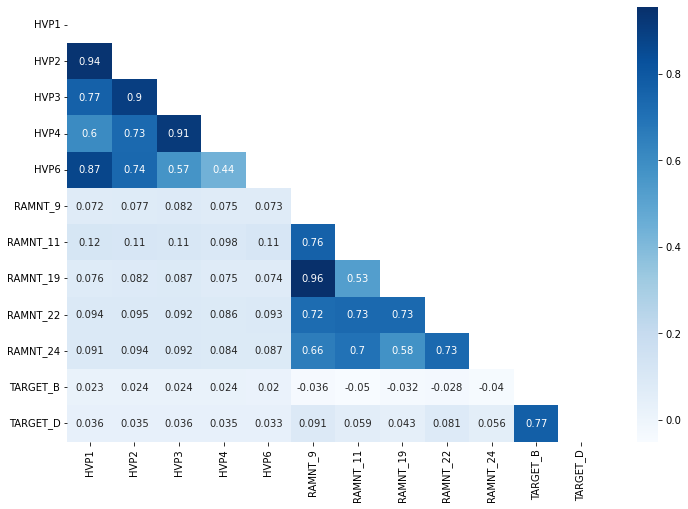

In [73]:
m4 = heatmap(discrete_df, DD, targets)

High correlation within the RAMNT and HPV variables. We will have to fix the colinearity by keeping the varibale the most correlated to the target and discarding the others for our model.

### Plotting the categorical data

##### Separating the categoricals with a lot of different unique values and thos with less unique values as they will be plotted differently

In [74]:
low_count = []
high_count = []
for col in categoricals:
        if len(categoricals[col].value_counts()) >= 15:
            high_count.append(col)
        else:
            low_count.append(col)
print(len(low_count), ' categorical columns with less than 20 unique values')
print(len(high_count), 'categorical columns with mote than 20 unique values')
low = categoricals[low_count]
high = categoricals[high_count]

45  categorical columns with less than 20 unique values
26 categorical columns with mote than 20 unique values


### Countplots

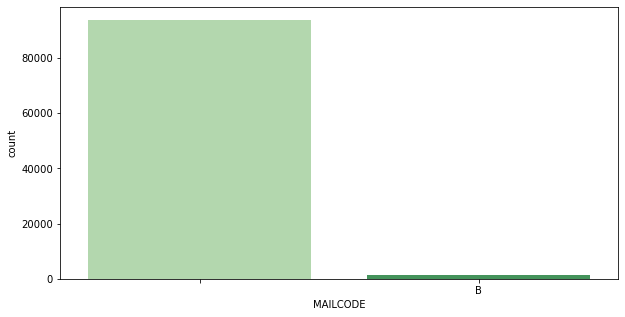

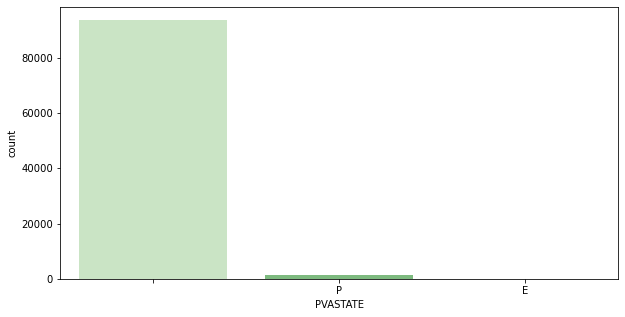

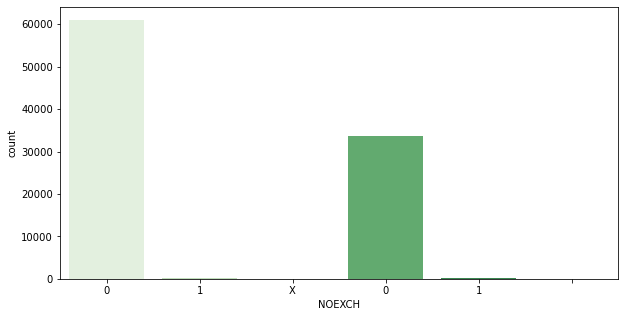

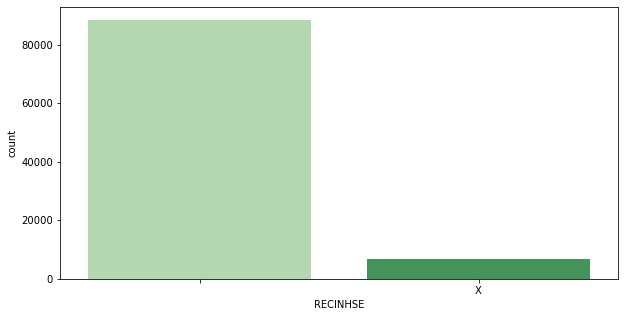

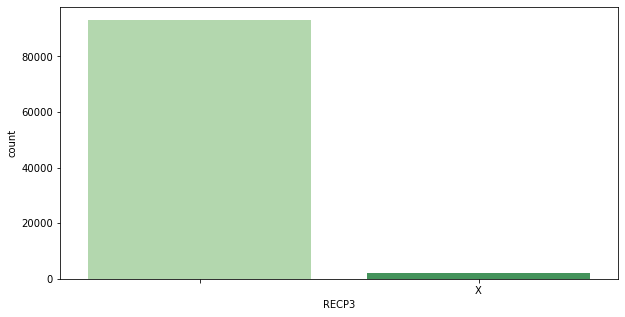

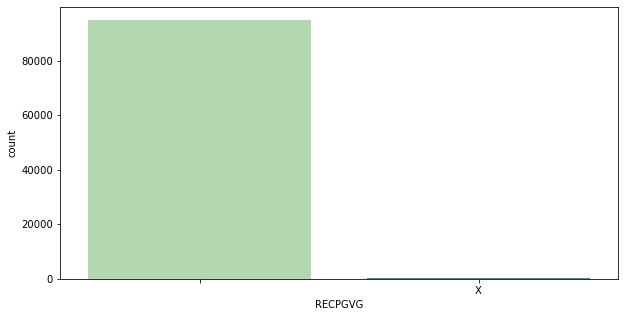

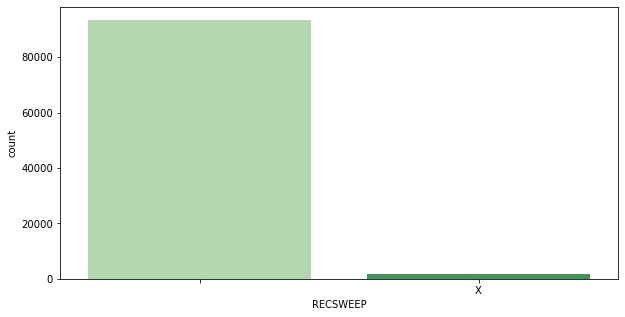

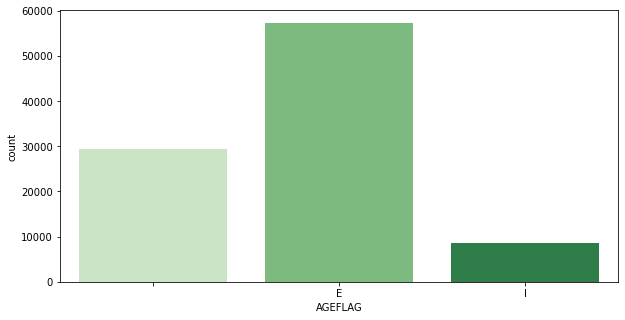

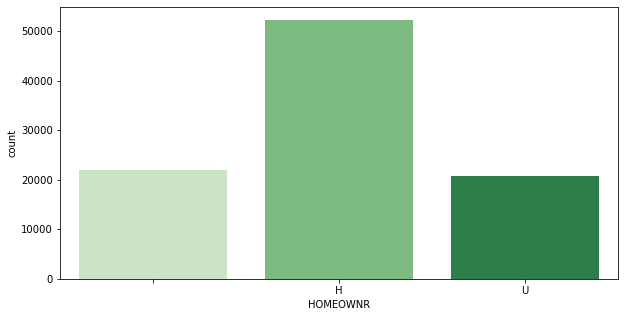

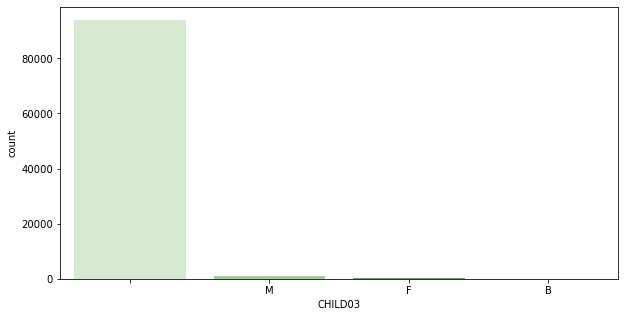

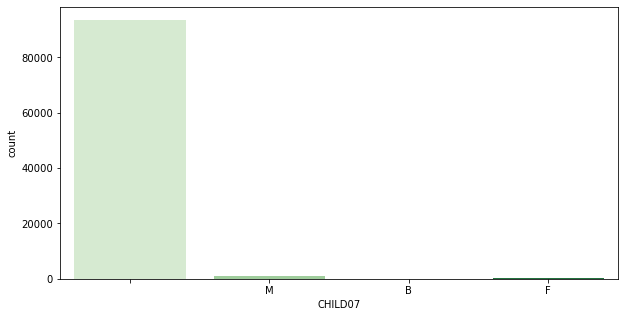

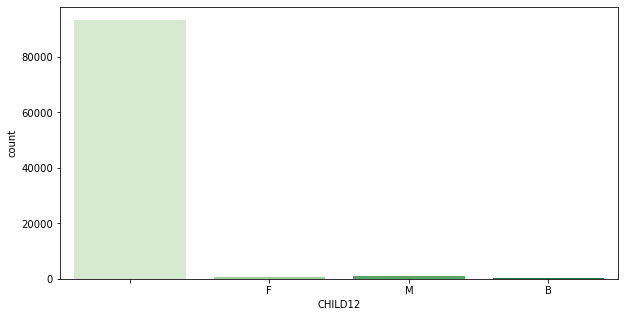

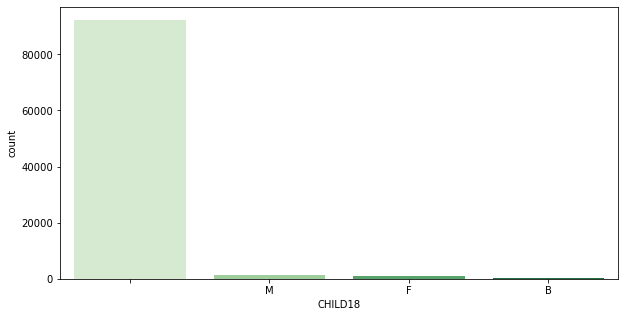

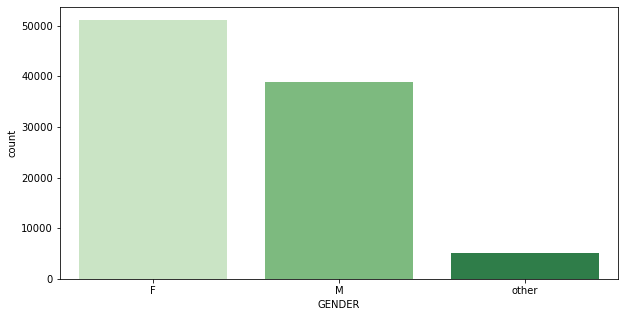

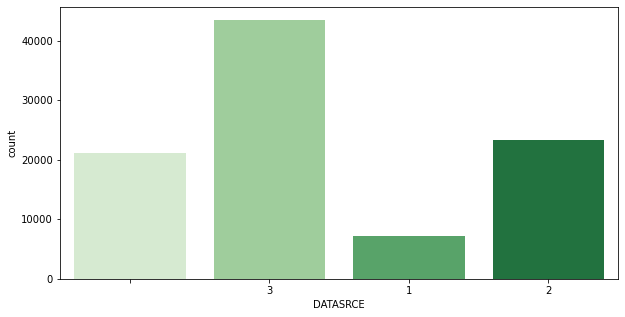

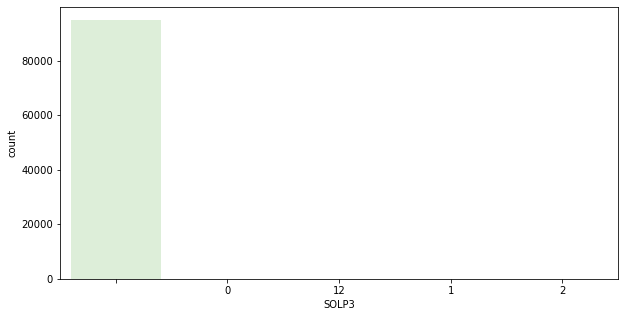

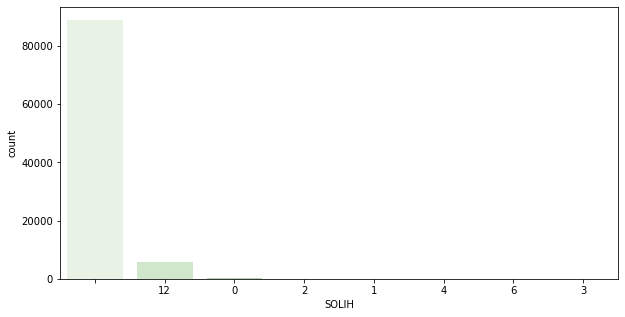

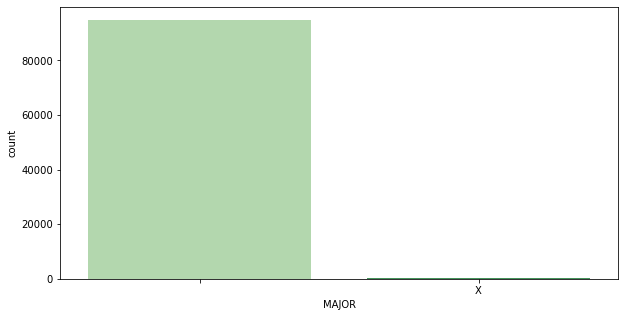

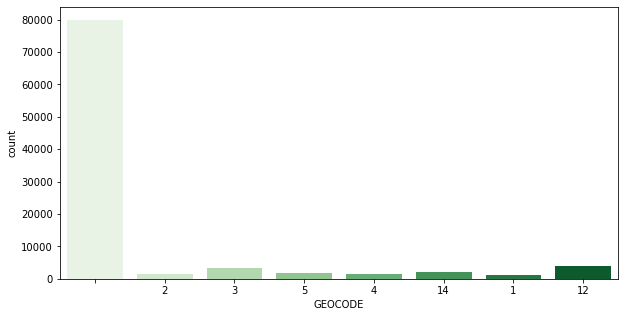

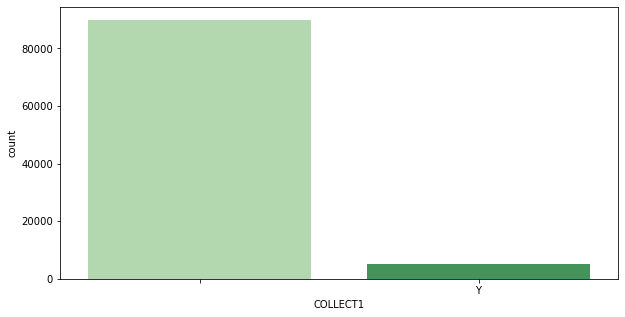

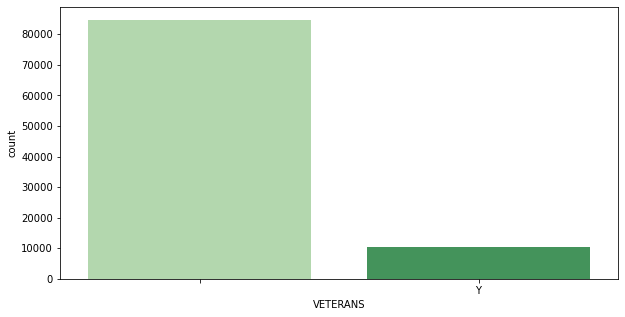

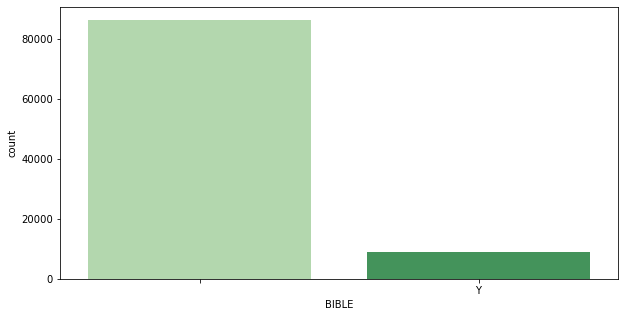

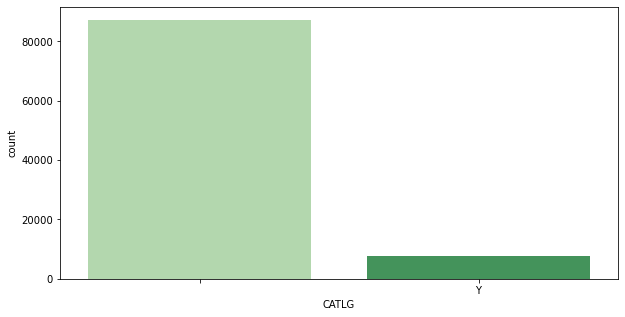

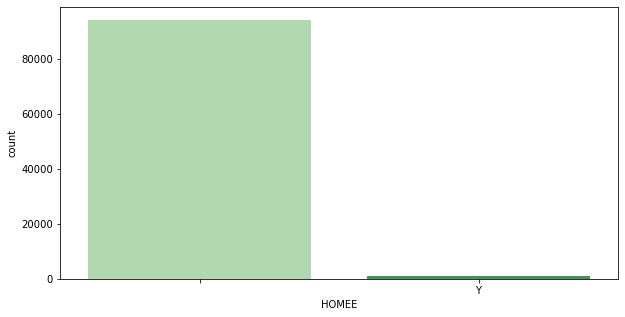

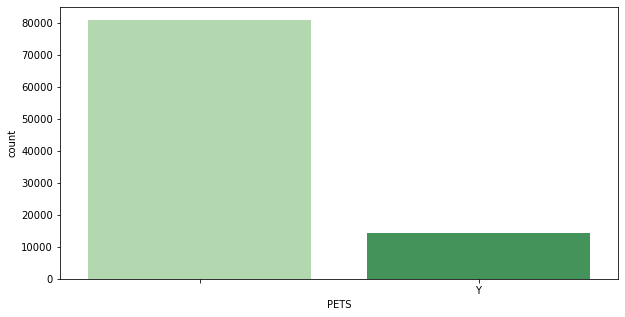

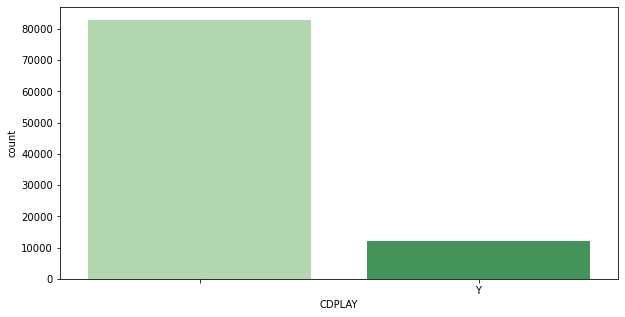

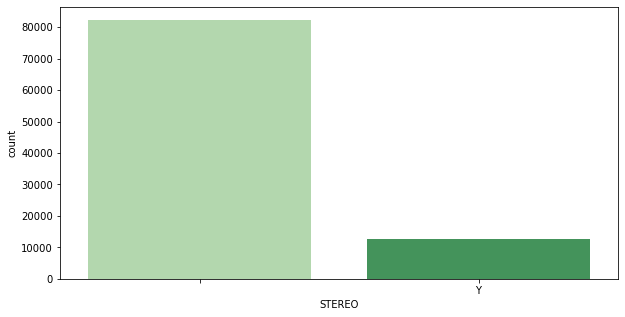

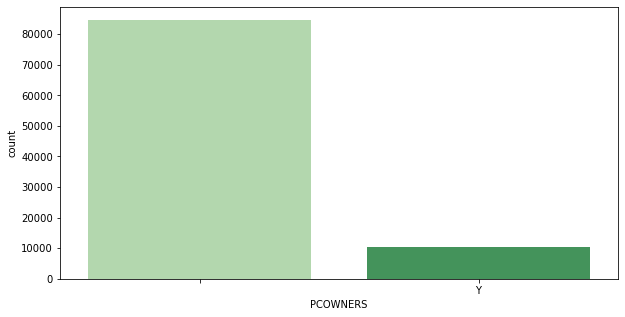

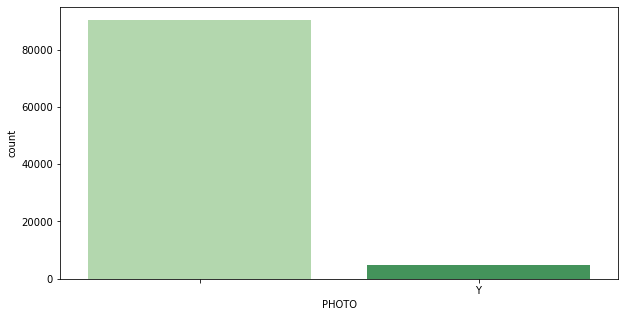

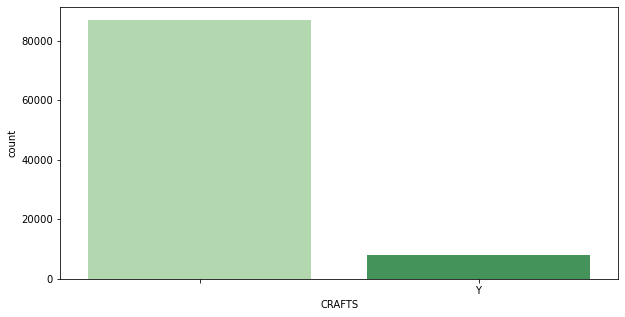

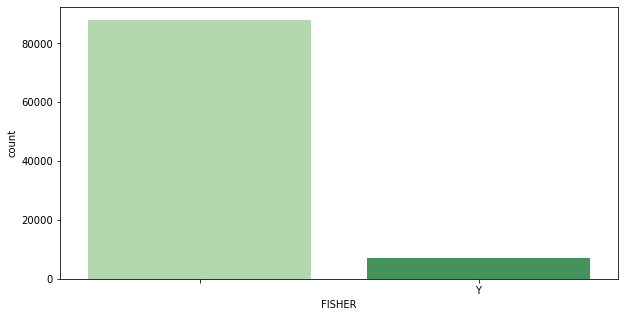

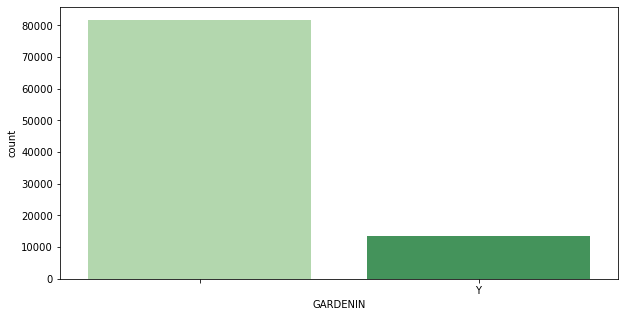

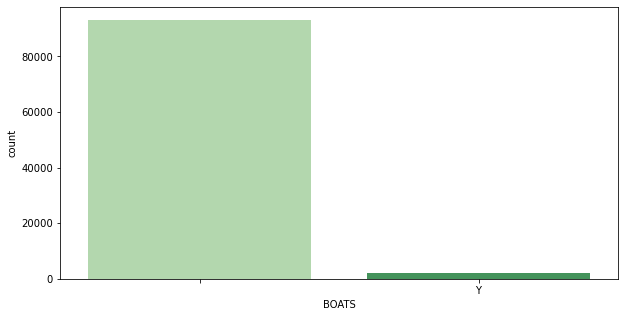

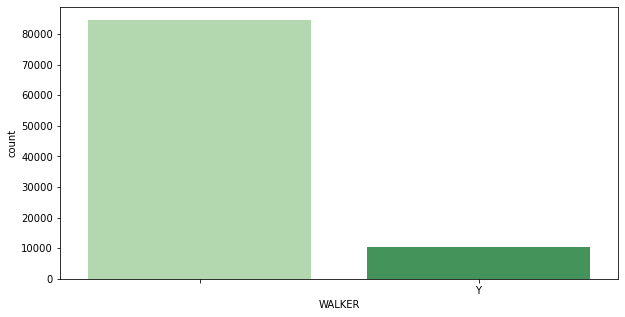

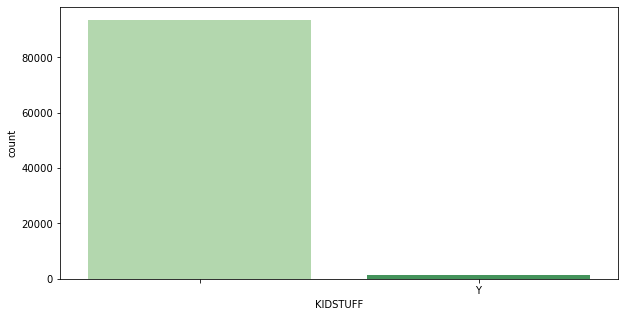

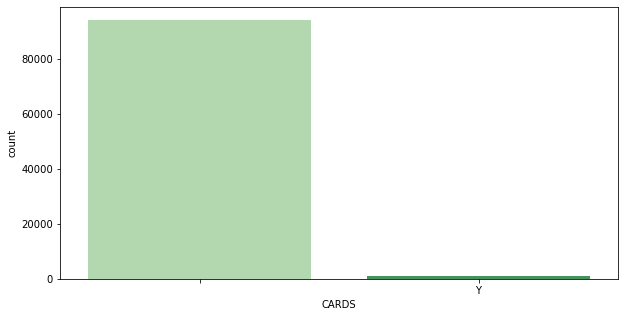

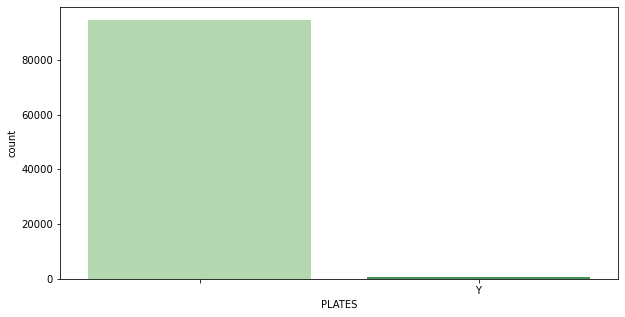

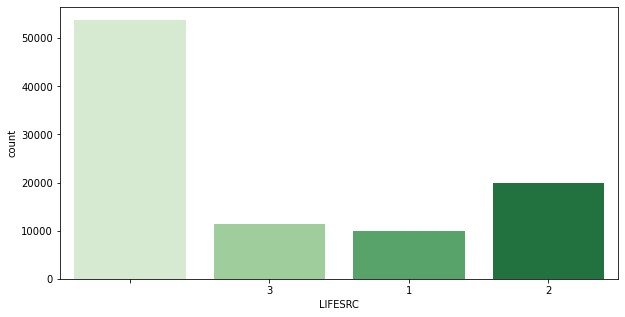

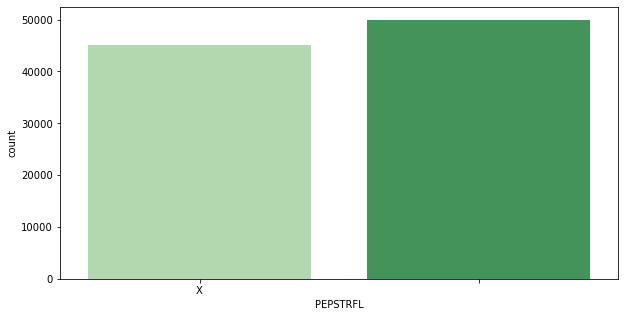

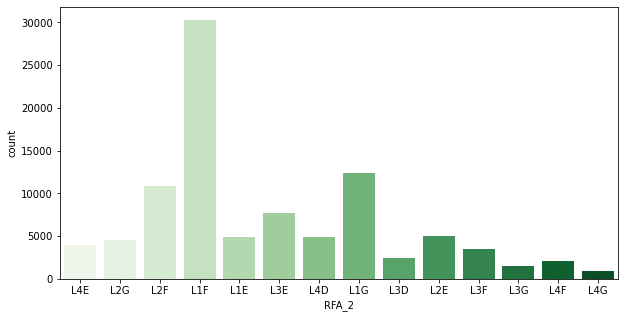

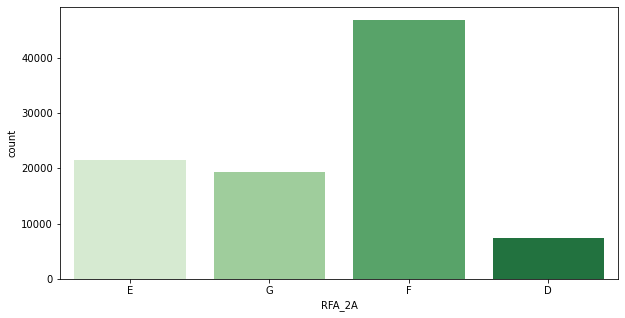

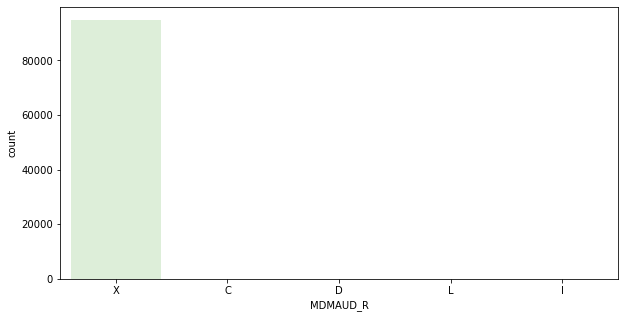

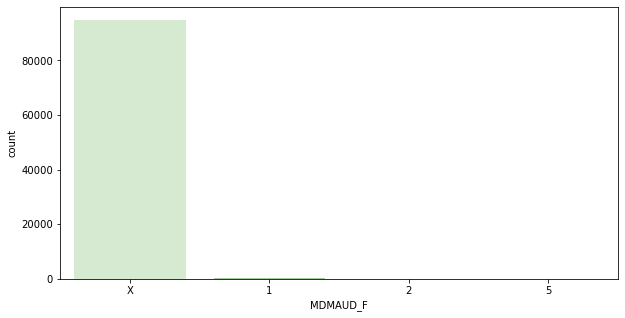

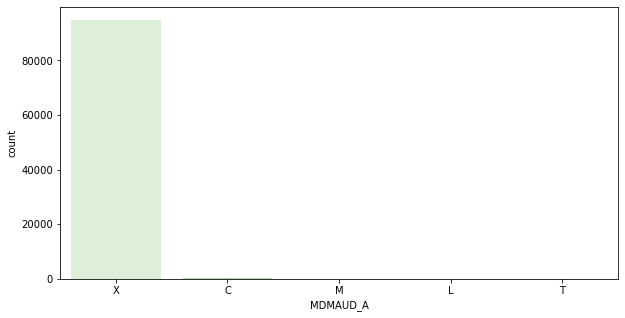

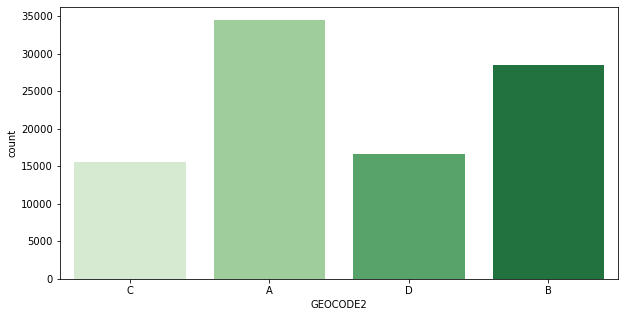

In [75]:
for column in low:
    plt.figure(figsize=(10,5))
    sns.countplot(x=column, data=low, palette='Greens')
    plt.show()

### Boxen plots

###### With TARGET_B

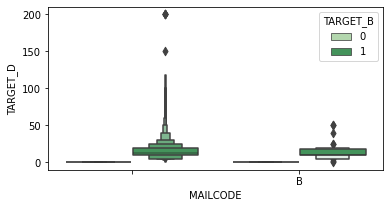

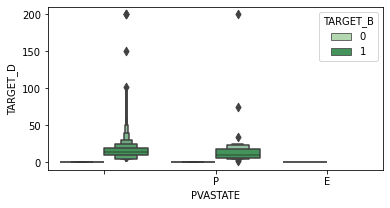

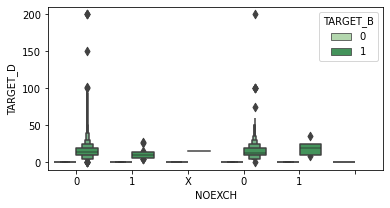

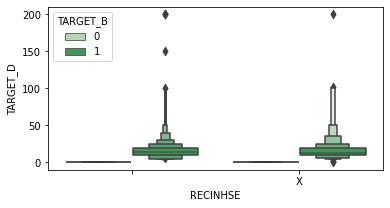

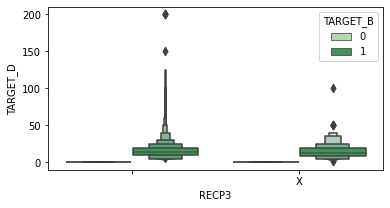

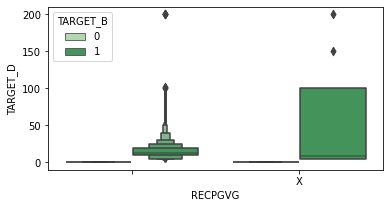

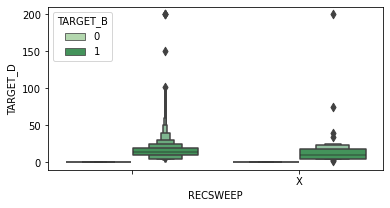

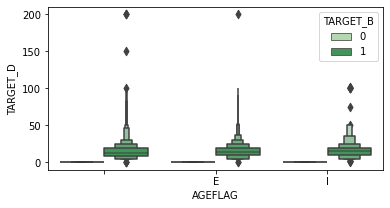

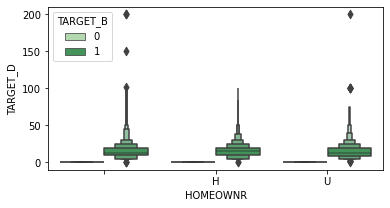

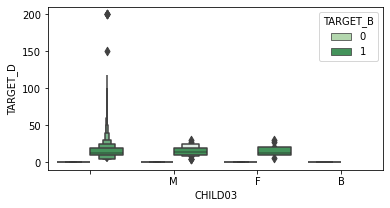

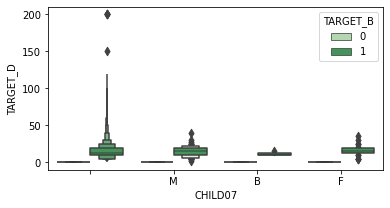

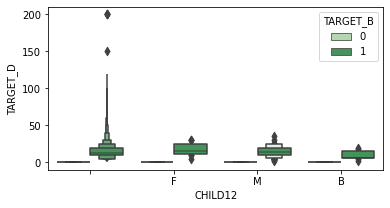

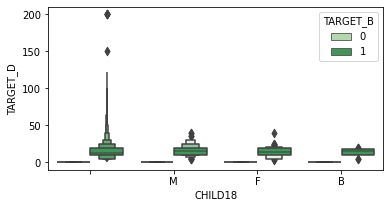

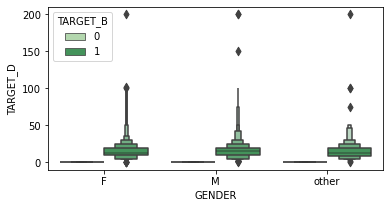

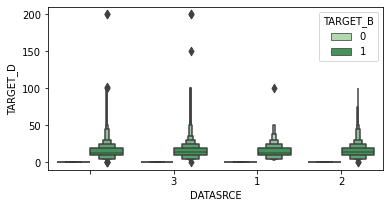

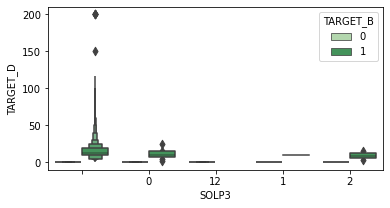

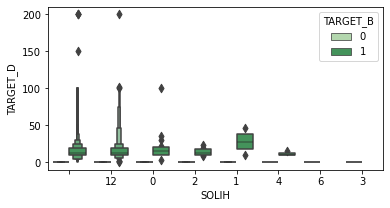

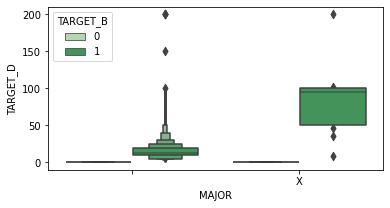

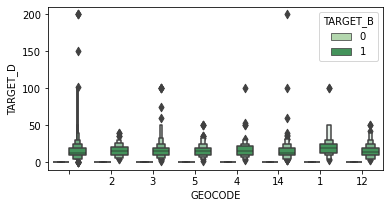

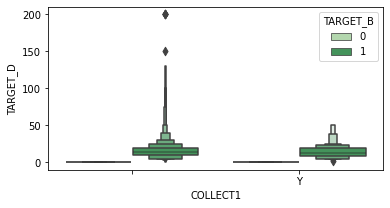

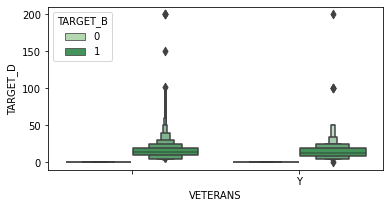

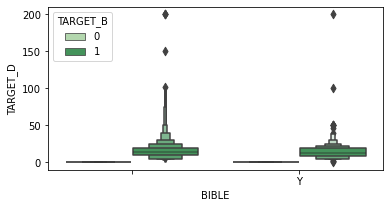

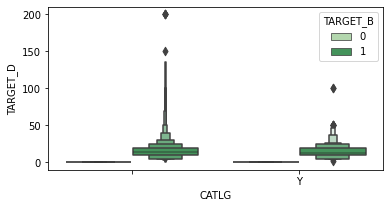

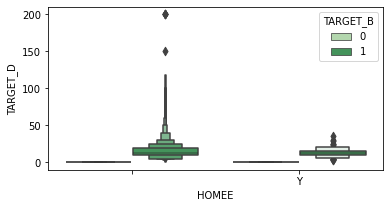

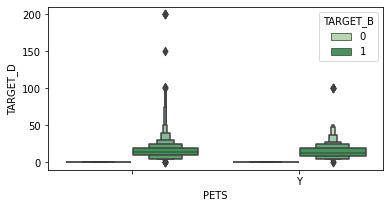

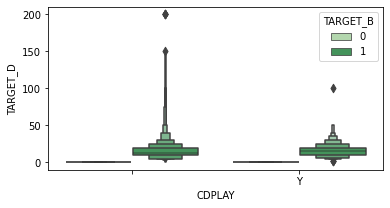

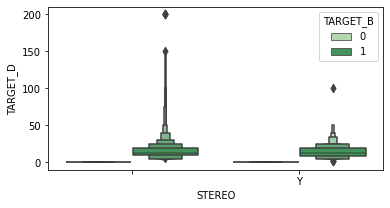

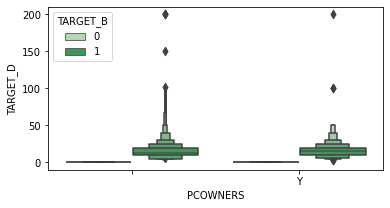

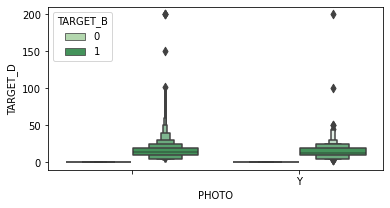

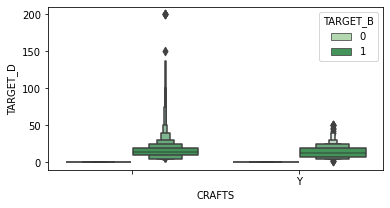

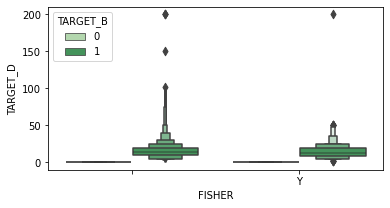

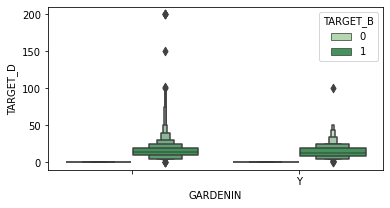

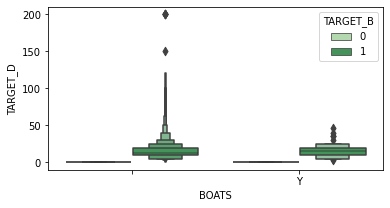

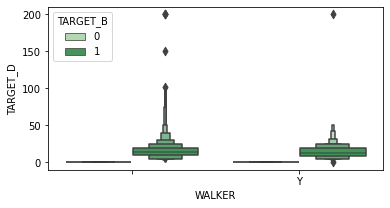

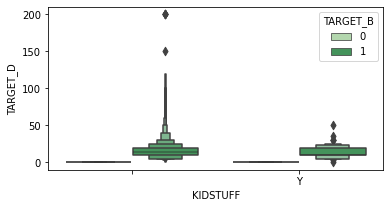

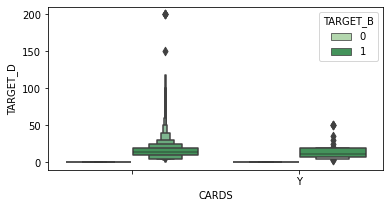

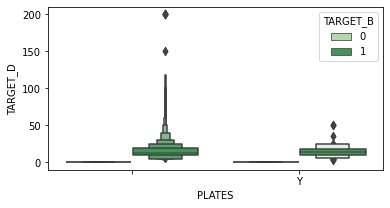

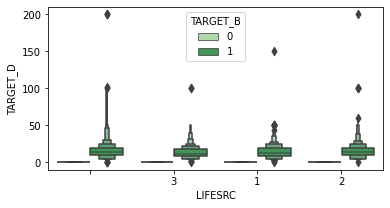

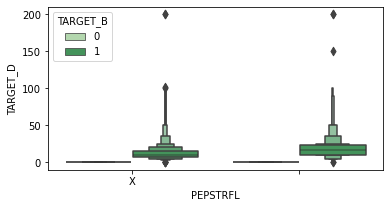

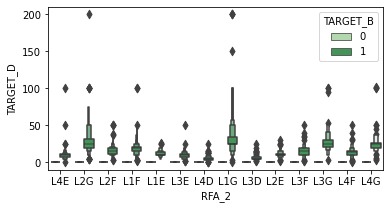

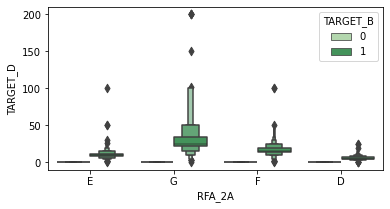

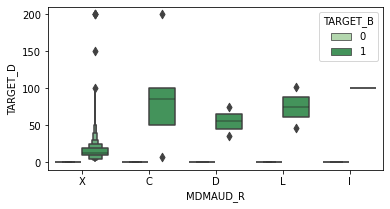

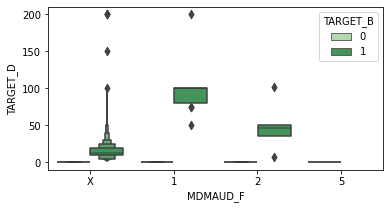

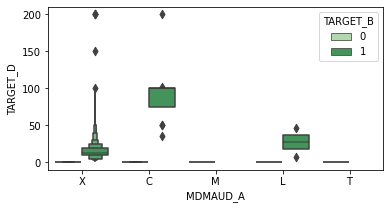

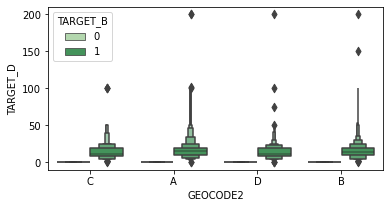

In [76]:
for column in low:      
    plt.figure(figsize=(6,3))
    plt.ylabel('Amounts')
    sns.boxenplot(x=low[column], y=targets['TARGET_D'], hue=targets['TARGET_B'], palette='Greens')
    plt.show()

# Lab | Random Forests

For this lab, you will be using the CSV files provided in the files_for_lab folder.

**Instructions**

Apply the Random Forests algorithm but this time only by upscaling the data using SMOTE.
Note that since SMOTE works on numerical data only, we will first encode the categorical variables in this case.

# Feature Selection and Feature Engineering

## Preapring the categoricals for modeling
### Cleaning the categorical data

#### Checking the values of each columns

In [77]:
def check_values(df):
    for i in range (len(df.columns)):
        print("column name: ", df.columns[i])
        print('number of unique values: ', len(pd.unique(df[df.columns[i]])))
        print('\n')
        print("  values: ",pd.unique(df[df.columns[i]]))
        print('\n')
              
c = check_values(categoricals)

column name:  STATE
number of unique values:  52


  values:  ['IL' 'CA' 'NC' 'FL' 'AL' 'IN' 'LA' 'IA' 'TN' 'KS' 'MN' 'UT' 'MI' 'MO'
 'TX' 'OR' 'WA' 'WI' 'GA' 'OK' 'SC' 'KY' 'MD' 'SD' 'NV' 'NE' 'AZ' 'VA'
 'ND' 'AK' 'AR' 'NM' 'MT' 'MS' 'CO' 'HI' 'ME' 'WY' 'ID' 'OH' 'NJ' 'MA'
 'VT' 'NY' 'PA' 'DC' 'CT' 'DE' 'WV' 'RI' 'AA' 'NH']


column name:  MAILCODE
number of unique values:  2


  values:  [' ' 'B']


column name:  PVASTATE
number of unique values:  3


  values:  [' ' 'P' 'E']


column name:  NOEXCH
number of unique values:  6


  values:  ['0' '1' 'X' 0 1 ' ']


column name:  RECINHSE
number of unique values:  2


  values:  [' ' 'X']


column name:  RECP3
number of unique values:  2


  values:  [' ' 'X']


column name:  RECPGVG
number of unique values:  2


  values:  [' ' 'X']


column name:  RECSWEEP
number of unique values:  2


  values:  [' ' 'X']


column name:  MDMAUD
number of unique values:  28


  values:  ['XXXX' 'C1CM' 'D1CM' 'L1CM' 'C2CM' 'D2CM' 'I1CM' 'I2MM' 'I1LM' 'L

number of unique values:  123


  values:  ['S4E' 'L1E' 'S4F' 'L3D' 'N3F' 'S3E' 'N2D' 'A1F' 'A1E' ' ' 'L1D' 'S2G'
 'A2F' 'N1E' 'S2D' 'F1F' 'N2G' 'F1D' 'L2G' 'S2E' 'I1D' 'A2D' 'A2G' 'F1E'
 'A1G' 'I1E' 'A4F' 'S4D' 'A2E' 'A1D' 'N2E' 'A4E' 'U1G' 'S4G' 'F1G' 'N3G'
 'L2E' 'L1G' 'S2F' 'N2C' 'S3F' 'N4C' 'L2F' 'L2C' 'N1F' 'N2F' 'A3E' 'L1F'
 'L2D' 'A3F' 'I3D' 'N4D' 'N4F' 'I3F' 'S3D' 'F1C' 'A4G' 'L3F' 'S3G' 'L3E'
 'I1F' 'N3D' 'S3C' 'A1C' 'A2C' 'L4F' 'S4B' 'I1G' 'A4D' 'A1B' 'S4C' 'L4D'
 'A3D' 'L4E' 'N4E' 'N3E' 'I2F' 'I3E' 'N1C' 'L3G' 'A3G' 'I2G' 'N4G' 'U1D'
 'N1D' 'L1C' 'U1F' 'A2B' 'L4G' 'U1E' 'I2E' 'F1A' 'I4E' 'N1G' 'I2D' 'A4C'
 'I4D' 'N1B' 'S2C' 'L4C' 'A1A' 'A3C' 'I4F' 'N3C' 'U1C' 'I4G' 'S2B' 'I2C'
 'A4B' 'I1C' 'F1B' 'N2B' 'I3G' 'I1B' 'L3C' 'S3B' 'P1D' 'S2A' 'A3B' 'P1E'
 'S4A' 'P1C' 'I3C']


column name:  RFA_17
number of unique values:  118


  values:  ['S4E' ' ' 'S2D' 'A2D' 'N2E' 'S2E' 'N2D' 'A1F' 'A1E' 'A1D' 'A2E' 'N1E'
 'A1G' 'L1D' 'P1F' 'L4F' 'A2F' 'A3E' 'L1E' 'P1E' 'A4F' 'S4D' 'P1A' 'N3D'

#### Let's bin the columns that have a code using the first two letters of the code (RFA columns) or with the first letter (DOMAIN)

In [78]:
for col in categoricals.columns:
    if col.startswith('RFA') or col.startswith('MDMAUD'):
        categoricals[col] = categoricals[col].str[:2]
    elif col.startswith('DOMAIN'):
        categoricals[col] = categoricals[col].str[:1]

In [79]:
categoricals['RFA_3'].value_counts()

A1    36232
A2    10896
F1     8283
S2     7285
A3     7251
S4     5951
S3     5853
A4     4994
N1     2229
N2     2220
       1934
N3     1181
N4      307
L1      250
L2      136
L3       62
L4       29
Name: RFA_3, dtype: int64

#### I will also drop the columns that have a lot of unique values.

In [80]:
to_remove = []
for column in categoricals.columns:
    if len(categoricals[column].unique()) > 50:
        to_remove.append(column)
print(to_remove)

# removing the columns with a lot of unique values
cat = categoricals.drop(to_remove, axis=1)

['STATE', 'CLUSTER']


#### Replacing the blanks
We replace the blank values with 'other' as the blank value does not mean that we miss data but it has its own meaning. \
It can mean the opposite of the other one, for example `mailcode` has ' ' which means that the address is good

In [81]:
for col in cat.columns:
    cat.loc[cat[col] == ' ', col] = 'other'

In [82]:
check_cat_values = check_values(cat)

column name:  MAILCODE
number of unique values:  2


  values:  ['other' 'B']


column name:  PVASTATE
number of unique values:  3


  values:  ['other' 'P' 'E']


column name:  NOEXCH
number of unique values:  6


  values:  ['0' '1' 'X' 0 1 'other']


column name:  RECINHSE
number of unique values:  2


  values:  ['other' 'X']


column name:  RECP3
number of unique values:  2


  values:  ['other' 'X']


column name:  RECPGVG
number of unique values:  2


  values:  ['other' 'X']


column name:  RECSWEEP
number of unique values:  2


  values:  ['other' 'X']


column name:  MDMAUD
number of unique values:  12


  values:  ['XX' 'C1' 'D1' 'L1' 'C2' 'D2' 'I1' 'I2' 'L2' 'D5' 'I5' 'C5']


column name:  DOMAIN
number of unique values:  6


  values:  ['T' 'S' 'R' 'U' 'C' 'other']


column name:  AGEFLAG
number of unique values:  3


  values:  ['other' 'E' 'I']


column name:  HOMEOWNR
number of unique values:  3


  values:  ['other' 'H' 'U']


column name:  CHILD03
number of unique val

### Checking the correlation of the categorical variables with each target

In [83]:
correlated_B = []
correlated_D = []
not_correlated_B = []
not_correlated_D = []

for col in cat.columns:
    for target in targets.columns:
        ct_table_ind_t=pd.crosstab(cat[col], targets[target])
        chi2_stat_t, p_t, dof_t, expected_t = stats.chi2_contingency(ct_table_ind_t)
        prob = 0.95
        critical_t = chi2.ppf(prob, dof_t)
        if abs(chi2_stat_t) >= critical_t:
            if target == 'TARGET_B':
                correlated_B.append(col)
            else:
                correlated_D.append(col)
        elif abs(chi2_stat_t) < critical_t:
            if target == 'TARGET_B':
                not_correlated_B.append(col)
            else:
                not_correlated_D.append(col)

cat_to_remove = []

for col in cat.columns:
    if col in not_correlated_B:
        cat_to_remove.append(col)
    elif col in not_correlated_D:
        cat_to_remove.append(col)

cat_light = cat.drop(cat_to_remove, axis=1)
cat_to_remove

['MAILCODE',
 'PVASTATE',
 'NOEXCH',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'AGEFLAG',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'GENDER',
 'DATASRCE',
 'SOLP3',
 'MAJOR',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'GEOCODE2']

In [84]:
cat_light.shape

(95093, 32)

### Checking the independance of the categorical variables
We have a lot of RFA features, they might be related and keeping them all will overfit the model.\
I will make contingency tables to use the chi-square test.

In [85]:
col_combos = cartesian([ cat_light.columns[1:], cat_light.columns[1:]])

ind_to_delete = []

for i in range(0, len(col_combos)-1):
    if col_combos[i][0] == col_combos[i][1]:
        ind_to_delete.append(i) 

col_combos = np.delete(col_combos, ind_to_delete, axis=0)

dependant = []
independant = []
for combo in col_combos:
    ct_table_ind=pd.crosstab(cat_light[combo[0]], cat_light[combo[1]])
    chi2_stat, p, dof, expected = stats.chi2_contingency(ct_table_ind)
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    if abs(chi2_stat) >= critical:
        dependant.append(combo)
    else:
        independant.append(combo)
dependant

[array(['RECP3', 'DOMAIN'], dtype=object),
 array(['RECP3', 'HOMEOWNR'], dtype=object),
 array(['RECP3', 'SOLIH'], dtype=object),
 array(['RECP3', 'GEOCODE'], dtype=object),
 array(['RECP3', 'LIFESRC'], dtype=object),
 array(['RECP3', 'PEPSTRFL'], dtype=object),
 array(['RECP3', 'RFA_2'], dtype=object),
 array(['RECP3', 'RFA_3'], dtype=object),
 array(['RECP3', 'RFA_4'], dtype=object),
 array(['RECP3', 'RFA_5'], dtype=object),
 array(['RECP3', 'RFA_6'], dtype=object),
 array(['RECP3', 'RFA_7'], dtype=object),
 array(['RECP3', 'RFA_8'], dtype=object),
 array(['RECP3', 'RFA_9'], dtype=object),
 array(['RECP3', 'RFA_10'], dtype=object),
 array(['RECP3', 'RFA_11'], dtype=object),
 array(['RECP3', 'RFA_12'], dtype=object),
 array(['RECP3', 'RFA_13'], dtype=object),
 array(['RECP3', 'RFA_14'], dtype=object),
 array(['RECP3', 'RFA_15'], dtype=object),
 array(['RECP3', 'RFA_16'], dtype=object),
 array(['RECP3', 'RFA_17'], dtype=object),
 array(['RECP3', 'RFA_18'], dtype=object),
 array(['RECP3

In [86]:
independant

[]

In [87]:
dep_df = pd.DataFrame(dependant, columns=['column_1', 'column_2'])
dep_df.column_1.value_counts()
n_dependancies = pd.DataFrame(dep_df.column_1.value_counts())
n_dependancies = n_dependancies.reset_index()
n_dependancies.columns = ['column_name', 'number_of_dependancies']
n_dependancies.sort_values(by='number_of_dependancies', ascending = False, inplace = True)
col_list = n_dependancies.column_name
n_dependancies

column_name  number_of_dependancies
0       RFA_2A                      31
16      DOMAIN                      30
29    HOMEOWNR                      30
28       SOLIH                      30
27     GEOCODE                      30
26     LIFESRC                      30
25    PEPSTRFL                      30
24       RFA_2                      30
23       RFA_3                      30
22       RFA_4                      30
21       RFA_5                      30
20       RFA_6                      30
19       RFA_7                      30
18       RFA_8                      30
17       RFA_9                      30
15       RECP3                      30
1       RFA_11                      30
14      RFA_12                      30
13      RFA_13                      30
12      RFA_14                      30
11      RFA_15                      30
10      RFA_16                      30
9       RFA_17                      30
8       RFA_18                      30
7       RFA_19                      30
6       RFA_20                      30
5       RFA_21                      30
4       RFA_22                      30
3       RFA_23                      30
2       RFA_24                      30
30      RFA_10                      30

### Post-Hoc testing: Let's check which class is responsible for creating a significant relationship

check = {}
for i in n_dependancies.column_name:
    dummies = pd.get_dummies(cat_light[i])
    adjusted_p_value = 0.05/cat_light[i].nunique()  # using the Bonferroni-adjusted method for correcting the p-value, adjusting it by the number of pairwise comparisons we will do
    for series in dummies:
        if stats.chi2_contingency(pd.crosstab(cat_light['HOMEOWNR'], dummies[series]))[1] < adjusted_p_value:
            check['{}-{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
n_dependancies_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
n_dependancies_ph.columns = ['Pair', 'Hypothesis']
n_dependancies_ph

n_dependancies_ph.Hypothesis.value_counts()
####### here we can see that a lot of the classes are significant.

reject = n_dependancies_ph.Hypothesis.value_counts()[0]
fail = n_dependancies_ph.Hypothesis.value_counts()[1]
if reject > fail:
    print('yeah')

more_reject = []
more_fail = []

for col in n_dependancies.column_name:
    check = {}
    for i in n_dependancies.column_name:
        if i != col:
            print(i)
            dummies = pd.get_dummies(cat_light[i])
            adjusted_p_value = 0.05/cat_light[i].nunique()  # using the Bonferroni-adjusted method for correcting the p-value, adjusting it by the number of pairwise comparisons we will do
            for series in dummies:
                print(series)
                if stats.chi2_contingency(pd.crosstab(cat_light[col], dummies[series]))[1] < adjusted_p_value:
                    check['{}-{}'.format(i, series)] = 'Reject Null Hypothesis'
                else:
                    check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
        n_dependancies_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
        n_dependancies_ph.columns = ['Pair', 'Hypothesis']
        print(n_dependancies_ph)
        print(n_dependancies_ph.Hypothesis.value_counts()[0])
        #reject = n_dependancies_ph.Hypothesis.value_counts()[0]
        #fail = n_dependancies_ph.Hypothesis.value_counts()[1]
        #if reject > fail:
            #more_reject.append(col)
        #else:
            #more_fail.append(col)

### Encoding the categoricals
There is a lot of multicolinearity with the categorical features, but we will do a first modeling without removing first.

In [88]:
cat_encoded = pd.get_dummies(cat_light)
cat_encoded.shape

(95093, 513)

### Dimensionality reduction with SVD

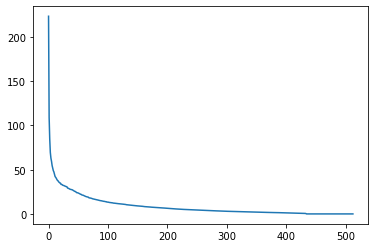

In [89]:
import matplotlib.pyplot as plt
U, D, VT = np.linalg.svd(np.array(cat_encoded.iloc[:5000]))
plt.plot(D)

In [90]:
svd = TruncatedSVD(n_components=50)
cat_svd = svd.fit_transform(cat_encoded)

In [91]:
cat_svd = pd.DataFrame(cat_svd)
cat_svd

0         1         2         3         4         5         6   \
0      2.016182  0.436638  3.675475 -0.894003 -0.623809 -0.673978 -2.166917   
1      3.170596  0.458137 -0.814234  0.802564 -0.661641  2.127639 -1.116434   
2      2.484371 -0.293586  3.428772 -0.895112 -0.439812 -0.517097 -1.945460   
3      2.628961  0.477885  2.657061 -0.329675  0.896855 -0.509247 -1.238122   
4      1.837330  0.904691 -0.605487  0.820169 -0.716013  1.219564 -0.519274   
...         ...       ...       ...       ...       ...       ...       ...   
95088  3.947372 -2.919070 -0.665019 -0.795974  0.780942  0.085451 -0.903248   
95089  4.066267 -2.606195 -0.586377 -0.567597  0.545664 -0.010402 -0.528220   
95090  2.327168 -0.763885  1.326622  0.569941 -0.518174  0.056335  0.589689   
95091  1.457666  0.963376  2.178323 -0.516978  0.809220 -0.492780 -1.070628   
95092  1.920633  1.798657 -0.124691 -1.323529 -1.036093 -0.141849 -0.041596   

             7         8         9   ...        40        41        42  \
0      1.312638 -0.606438 -0.560561  ... -0.300136  0.104495 -0.051921   
1     -0.306900  0.149716 -0.526467  ... -0.429981 -0.592665  0.353761   
2      1.187408 -0.648523 -0.249229  ... -0.052727  0.169920 -0.035416   
3      1.762757 -0.672323  0.092476  ...  0.220360  0.274837 -0.203152   
4     -0.447113  0.660599 -1.013607  ...  0.241317  0.274848 -0.299719   
...         ...       ...       ...  ...       ...       ...       ...   
95088 -0.712681 -0.677598  0.252374  ...  0.011062 -0.147757 -0.127228   
95089 -0.523423  0.190984  0.034925  ...  0.213454 -0.048179 -0.115821   
95090  0.711160 -0.944849  0.709259  ... -0.186611  0.236750  0.159781   
95091  1.379847  0.878427 -0.547615  ...  0.398941 -0.108950 -0.309521   
95092 -0.559851 -0.766308 -0.037504  ...  1.094705  0.146863 -0.618202   

             43        44        45        46        47        48        49  
0     -0.320604 -0.149517 -0.407541  0.076128  0.062243 -0.087857  0.009835  
1     -0.831236  0.226021  0.384370  0.209970  0.645675 -0.126365 -0.184836  
2     -0.118386 -0.347472  0.090350  0.361393 -0.128473  0.124377  0.003228  
3     -0.076605 -1.253631  0.459761 -0.024521 -0.008885 -0.066638  0.046010  
4      0.424351 -0.421264 -0.302809 -0.402201 -0.584034 -0.205260  0.286702  
...         ...       ...       ...       ...       ...       ...       ...  
95088 -0.102173  0.241878 -0.270193 -0.265831  0.138032 -0.126471  0.019164  
95089  0.069258 -0.082148  0.047489  0.182276 -0.212716 -0.075956 -0.072802  
95090 -0.353465 -0.622579 -0.611001  0.542887 -0.307932 -0.588660 -0.299317  
95091  0.004938 -0.434491  0.568374 -0.337201  0.677167 -0.123907  0.387189  
95092  0.433934  0.083073 -0.115840  0.318387  1.067625  0.566263  0.801086  

[95093 rows x 50 columns]

### Cleaning the discrete numerical data

In [92]:
for col in discrete_df.columns:
    if discrete_df[col].isna().sum() > 0:
        print(col, ': ', discrete_df[col].isna().sum(), ' or ', discrete_df[col].isna().sum()/len(discrete_df))

AGE :  23480  or  0.24691617679534772
INCOME :  21121  or  0.22210888288307237
MBBOOKS :  52580  or  0.5529323924999737
PUBHLTH :  52580  or  0.5529323924999737
PUBNEWFN :  52580  or  0.5529323924999737
WEALTH2 :  43626  or  0.4587719390491414
ADATE_4 :  2175  or  0.02287234601916019
ADATE_7 :  8834  or  0.09289853091184419
ADATE_8 :  3496  or  0.036764009969188056
ADATE_18 :  21183  or  0.2227608761948829
ADATE_22 :  25566  or  0.26885259693142505
ADATE_23 :  56055  or  0.5894755660248389
RDATE_8 :  73706  or  0.7750938554888372
RDATE_9 :  78412  or  0.8245822510594891
RDATE_11 :  80403  or  0.8455196491855341
RDATE_12 :  69484  or  0.7306952141587709
RDATE_14 :  71844  or  0.7555130240922044
RDATE_16 :  68184  or  0.7170243866530659
RDATE_18 :  75379  or  0.7926871588865637
RDATE_19 :  79271  or  0.8336155132344126
RDATE_22 :  74316  or  0.7815086283953603
RDATE_24 :  77405  or  0.8139926177531469
RAMNT_9 :  78412  or  0.8245822510594891
RAMNT_11 :  80403  or  0.8455196491855341
RAMN

In [93]:
nan_dis = check_nan(discrete_df)
nan_dis

column_name  percentage_null_values
300    RAMNT_11               84.551965
291    RDATE_11               84.551965
296    RDATE_19               83.361551
301    RAMNT_19               83.361551
290     RDATE_9               82.458225
..          ...                     ...
106        HVP1                0.000000
105       ETHC6                0.000000
104       ETHC5                0.000000
103       ETHC4                0.000000
309    CLUSTER2                0.000000

[310 rows x 2 columns]

In [94]:
# this are the top ten columns that are the most related to either target, we want to keep those
DB, DD

(['RFA_2F',
  'CARDGIFT',
  'NGIFTALL',
  'LASTDATE',
  'CARDPROM',
  'HVP4',
  'HVP3',
  'HVP2',
  'HVP1',
  'HVP5'],
 ['RAMNT_9',
  'RAMNT_22',
  'RAMNT_11',
  'RAMNT_24',
  'RAMNT_19',
  'HVP1',
  'HVP3',
  'HVP2',
  'HVP4',
  'HVP6'])

In [95]:
too_many = nan_dis[nan_dis['percentage_null_values']>=40]
to_drop_dis = []
for col in too_many.column_name:
    if col in DB:
        continue
    elif col in DD:
        continue
    else:
        to_drop_dis.append(col)
    
to_drop_dis

['RDATE_11',
 'RDATE_19',
 'RDATE_9',
 'RDATE_24',
 'RDATE_18',
 'RDATE_22',
 'RDATE_8',
 'RDATE_14',
 'RDATE_12',
 'RDATE_16',
 'ADATE_23',
 'PUBNEWFN',
 'MBBOOKS',
 'PUBHLTH',
 'WEALTH2']

In [96]:
dis_df = discrete_df.drop(to_drop_dis, axis=1)
for col in dis_df.columns:
    if dis_df[col].isna().sum() > 0:
        print(col, ': ', dis_df[col].isna().sum())

AGE :  23480
INCOME :  21121
ADATE_4 :  2175
ADATE_7 :  8834
ADATE_8 :  3496
ADATE_18 :  21183
ADATE_22 :  25566
RAMNT_9 :  78412
RAMNT_11 :  80403
RAMNT_19 :  79271
RAMNT_22 :  74316
RAMNT_24 :  77405
TIMELAG :  9934


In [97]:
for col in dis_df.columns:
    if dis_df[col].isna().sum() > 0:
        dis_df[col] = dis_df[col].fillna(dis_df[col].mean())

for col in dis_df.columns:
    if dis_df[col].isna().sum() > 0:
        print(col, ': ', dis_df[col].isna().sum())

In [98]:
dis_df.shape

(95093, 295)

### Cleaning the continuous numerical data

In [99]:
for col in continuous_df.columns:
    if continuous_df[col].isna().sum() > 0:
        print(col, ': ', continuous_df[col].isna().sum(), ' or ', continuous_df[col].isna().sum()/len(continuous_df))

RAMNT_8 :  73706  or  0.7750938554888372
RAMNT_12 :  69484  or  0.7306952141587709
RAMNT_14 :  71844  or  0.7555130240922044
RAMNT_16 :  68184  or  0.7170243866530659
RAMNT_18 :  75379  or  0.7926871588865637
NEXTDATE :  9934  or  0.10446615418590222


In [100]:
nan_con = check_nan(continuous_df)
nan_con

column_name  percentage_null_values
21    RAMNT_18               79.268716
17     RAMNT_8               77.509386
19    RAMNT_14               75.551302
18    RAMNT_12               73.069521
20    RAMNT_16               71.702439
29    NEXTDATE               10.446615
0          DOB                0.000000
16     NUMPROM                0.000000
28    FISTDATE                0.000000
27    LASTGIFT                0.000000
26    MAXRDATE                0.000000
25    MAXRAMNT                0.000000
24    MINRDATE                0.000000
23    MINRAMNT                0.000000
22    RAMNTALL                0.000000
15         IC5                0.000000
1       POP901                0.000000
14         IC4                0.000000
13         IC3                0.000000
12         IC2                0.000000
11         IC1                0.000000
10         DMA                0.000000
9          ADI                0.000000
8          MSA                0.000000
7          HV2                0.000000
6          HV1                0.000000
5         HHP2                0.000000
4         HHP1                0.000000
3       POP903                0.000000
2       POP902                0.000000
30     AVGGIFT                0.000000

In [101]:
# this are the top ten columns that are the most related to either target, we want to keep those
CB, CD

(['NUMPROM',
  'HV2',
  'HV1',
  'DMA',
  'IC4',
  'IC5',
  'IC2',
  'IC3',
  'IC1',
  'RAMNTALL'],
 ['RAMNT_14',
  'RAMNT_8',
  'RAMNT_12',
  'LASTGIFT',
  'RAMNT_18',
  'RAMNTALL',
  'AVGGIFT',
  'HV2',
  'MAXRAMNT',
  'HV1'])

In [102]:
too_much = nan_con[nan_con['percentage_null_values']>=40]
to_drop_con = []
for col in too_much.column_name:
    if col in CB:
        continue
    elif col in CD:
        continue
    else:
        to_drop_con.append(col)
    
to_drop_con

['RAMNT_16']

In [103]:
con_df = continuous_df.drop(to_drop_con, axis=1)
for col in con_df.columns:
    if con_df[col].isna().sum() > 0:
        print(col, ': ', con_df[col].isna().sum())

RAMNT_8 :  73706
RAMNT_12 :  69484
RAMNT_14 :  71844
RAMNT_18 :  75379
NEXTDATE :  9934


In [104]:
for col in con_df.columns:
    if con_df[col].isna().sum() > 0:
        con_df[col] = con_df[col].fillna(con_df[col].mean())
        
for col in con_df.columns:
    if con_df[col].isna().sum() > 0:
        print(col, ': ', con_df[col].isna().sum())

## Preparing the numerical features for modeling

###### Useful functions

In [105]:
# I will use the Log Transformation to reduce the skewness of the numerical variables
def log_transfom_x(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.nan

def log_transform_df(df):
    df_log = df.copy()
    for col in df_log.columns:
        df_log[col] = list(map(log_transfom_x, df_log[col]))
    for col in df_log.columns:
        df_log[col] = df_log[col].fillna(np.mean(df_log[col]))
        sns.distplot(df_log[col], fit=norm)
        fig = plt.figure()
    return df_log


def sqrt_transfom_x(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.nan
    
def sqrt_transform_df(df):
    df_log = df.copy()
    for col in df_log.columns:
        df_log[col] = list(map(sqrt_transfom_x, df_log[col]))
    for col in df_log.columns:
        df_log[col] = df_log[col].fillna(np.mean(df_log[col]))
        sns.distplot(df_log[col], fit=norm)
        fig = plt.figure()
    return df_log

In [106]:
# I will use this function to scale the data with StandardScaler
def standard_scaling(df):
    transformer = StandardScaler().fit(df)
    x_standardized = transformer.transform(df)
    X = pd.DataFrame(x_standardized)
    X.columns = df.columns
    return X

In [107]:
# I will use VIF to detect multicollinearity
def VIF(data):
    vif_info = pd.DataFrame()
    vif_info['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif_info['Column'] = data.columns
    vif_info.sort_values('VIF', ascending=False)
    return vif_info.sort_values('VIF', ascending=False)

### Improving the distribtution of the continuous numerical variables 
I will try both the log transformation and the square root transformation to check which works best with our data

DOB     POP901    POP902    POP903      HHP1      HHP2  \
CONTROLN                                                                
95515     8.219326   6.899723  5.575949  5.805135  5.288267  5.620401   
148535    8.556798   8.191740  6.845880  6.905753  5.758902  5.886104   
15078     8.048108   8.853808  7.620705  7.889459  5.209486  5.537334   
172556    7.937732   6.461468  5.075174  5.389072  5.293305  5.645447   
7112      7.601402   7.832014  6.440947  6.634633  5.459586  5.777652   
...            ...        ...       ...       ...       ...       ...   
184568    8.048108  10.217568  8.889033  9.214034  5.273000  5.602119   
122706    8.517393   7.134094  5.774552  5.888878  5.726848  5.846439   
189641    8.243019   6.313548  4.875197  5.323010  5.187386  5.590987   
4693      8.295299   7.465083  6.068426  6.230481  5.568345  5.780744   
185114    7.496097   8.277666  7.083388  7.201916  5.429346  5.680173   

               HV1       HV2       MSA       ADI  ...  RAMNT_18  RAMNTALL  \
CONTROLN                                          ...                       
95515     6.171701  6.453625  8.203168  5.176150  ...  2.508284  5.480639   
148535    8.606668  8.559869  8.407378  2.564949  ...  2.508284  3.850148   
15078     6.208590  6.302619  8.203168  5.638355  ...  2.079442  5.308268   
172556    6.907755  7.141245  9.142062  4.204693  ...  2.508284  4.691348   
7112      6.356108  6.386879  8.517193  4.844187  ...  2.508284  5.537334   
...            ...       ...       ...       ...  ...       ...       ...   
184568    6.895683  6.932448  5.940171  4.867009  ...  2.508284  3.218876   
122706    7.425954  7.451822  8.119696  5.303305  ...  2.508284  2.995732   
189641    5.929589  5.932245  8.304000  4.110874  ...  2.302585  4.060443   
4693      7.791936  7.807510  9.075093  2.564949  ...  2.708050  6.210600   
185114    6.843750  6.955593  9.126959  5.872118  ...  2.508284  8.236156   

          MINRAMNT  MINRDATE  MAXRAMNT  MAXRDATE  LASTGIFT  FISTDATE  \
CONTROLN                                                               
95515     1.609438  9.127828  2.484907  9.148678  2.302585  9.095042   
148535    2.302585  9.138844  3.218876  9.160309  3.218876  9.138844   
15078     0.693147  9.117238  2.772589  9.127719  1.609438  9.105091   
172556    0.693147  9.072342  2.397895  9.149634  2.302585  9.071308   
7112      1.098612  9.138844  2.708050  9.169623  2.708050  8.974998   
...            ...       ...       ...       ...       ...       ...   
184568    3.218876  9.169727  3.218876  9.169727  3.218876  9.169727   
122706    2.995732  9.169831  2.995732  9.169831  2.995732  9.169831   
189641    1.098612  9.169831  2.302585  9.159152  2.302585  9.149528   
4693      1.609438  9.106201  3.044522  9.170351  2.890372  9.060912   
185114    2.302585  9.083870  5.303305  9.139059  4.605170  9.082848   

          NEXTDATE   AVGGIFT  
CONTROLN                      
95515     9.105313  2.046652  
148535    9.159468  2.751535  
15078     9.116140  2.012431  
172556    9.072342  1.918759  
7112      8.987822  1.926416  
...            ...       ...  
184568    9.121587  3.218876  
122706    9.121587  2.995732  
189641    9.159152  2.114533  
4693      9.071538  2.497028  
185114    9.083529  4.572594  

[95093 rows x 30 columns]

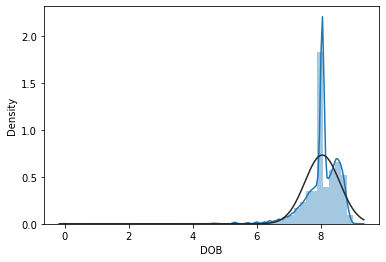

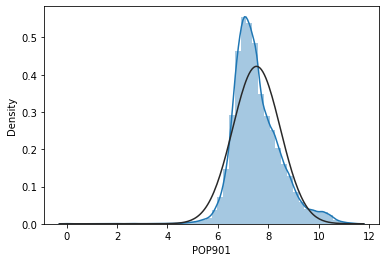

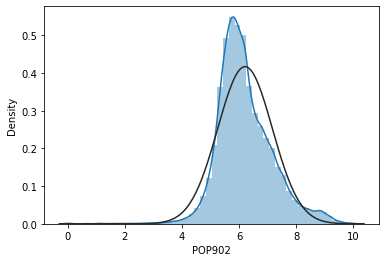

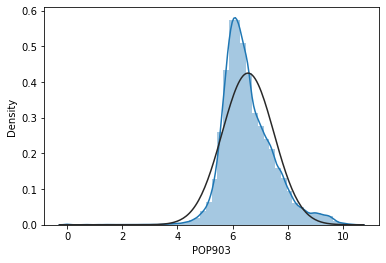

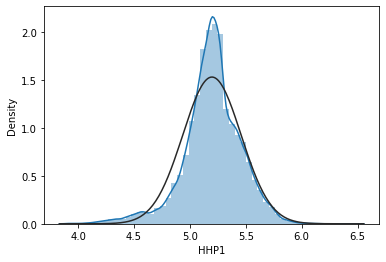

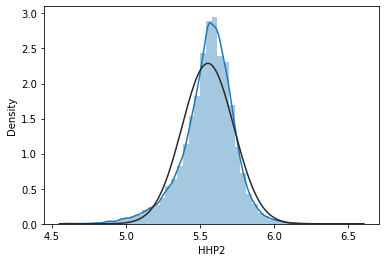

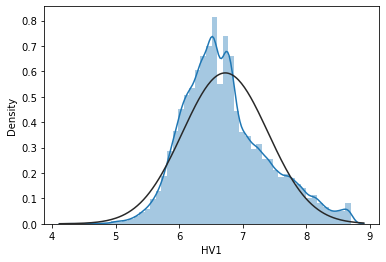

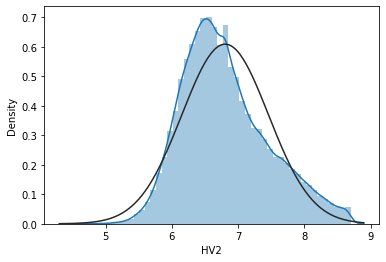

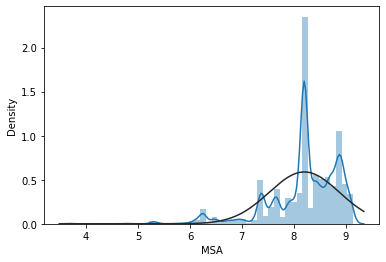

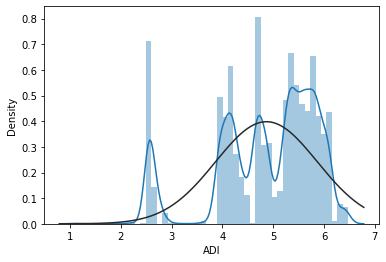

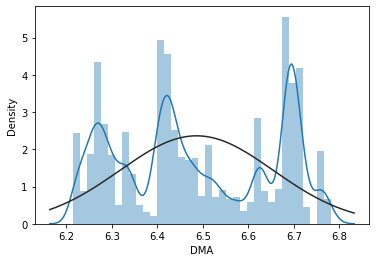

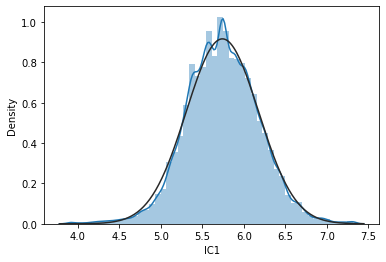

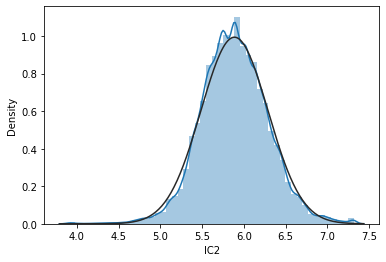

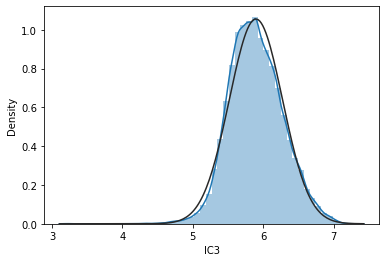

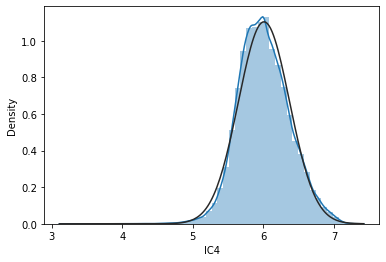

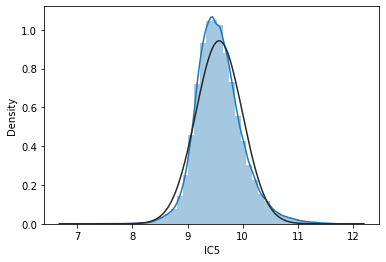

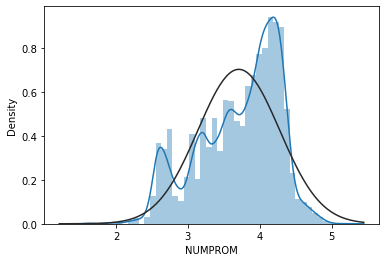

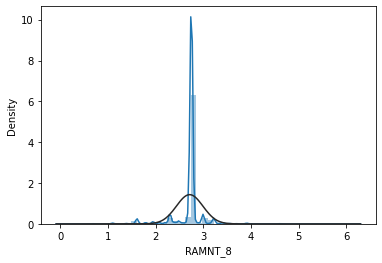

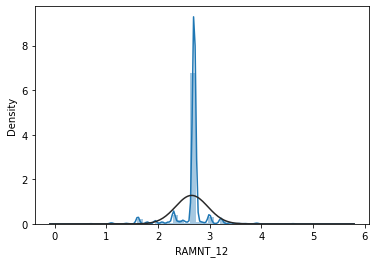

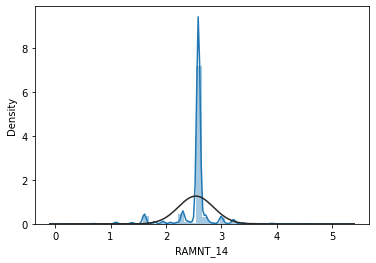

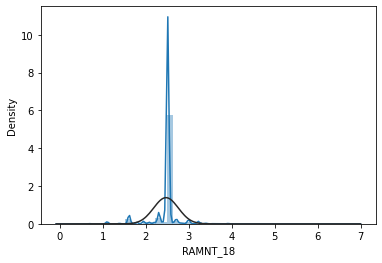

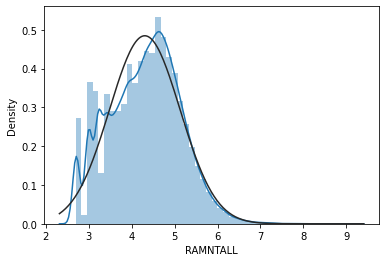

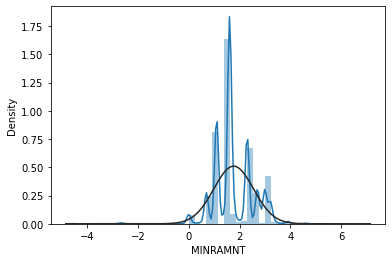

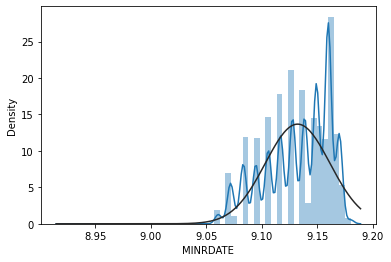

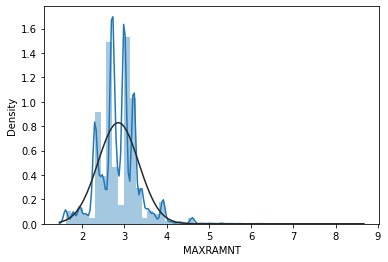

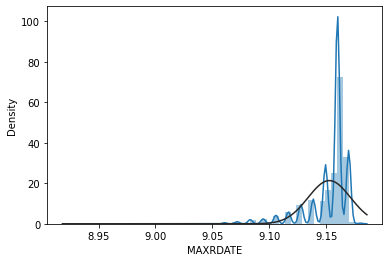

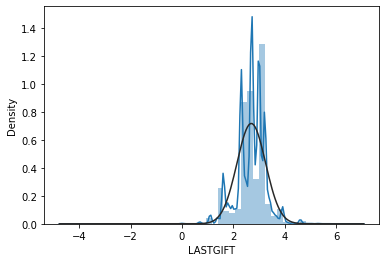

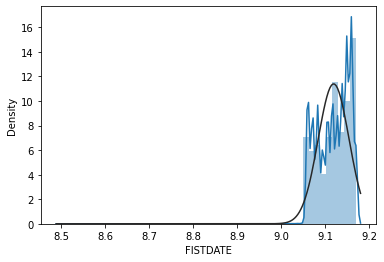

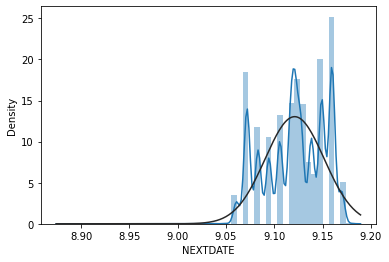

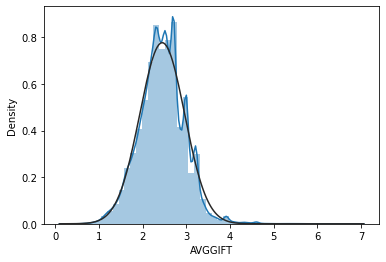

<Figure size 432x288 with 0 Axes>

In [108]:
con_df_log = log_transform_df(con_df)
con_df_log

'DOB', 'MSA', 'ADI', 

DOB      POP901     POP902      POP903       HHP1       HHP2  \
CONTROLN                                                                       
95515     60.926185   31.496031  16.248077   18.220867  14.071247  16.613248   
148535    72.124892   60.091597  30.659419   31.591138  17.804494  18.973666   
15078      0.000000   83.671979  45.166359   51.662365  13.527749  15.937377   
172556    52.924474   25.298221  12.649111   14.798649  14.106736  16.822604   
7112      44.732538   50.199602  25.039968   27.586228  15.329710  17.972201   
...             ...         ...        ...         ...        ...        ...   
184568     0.000000  165.469030  85.158675  100.184829  13.964240  16.462078   
122706    70.717749   35.411862  17.944358   19.000000  17.521415  18.601075   
189641    61.652251   23.494680  11.445523   14.317821  13.379088  16.370706   
4693      63.285069   41.785165  20.784610   22.538855  16.186414  18.000000   
185114    42.438190   62.729578  34.525353   36.633318  15.099669  17.117243   

                HV1        HV2        MSA        ADI  ...  RAMNT_18  \
CONTROLN                                              ...             
95515     21.886069  25.199206   0.000000  13.304135  ...  3.504830   
148535    73.945926  72.235725  66.932802   3.605551  ...  3.504830   
15078     22.293497  23.366643   0.000000  16.763055  ...  2.828427   
172556    31.622777  35.538711  96.643675   8.185353  ...  3.504830   
7112      24.000000  24.372115  70.710678  11.269428  ...  3.504830   
...             ...        ...        ...        ...  ...       ...   
184568    31.432467  32.015621  19.493589   0.000000  ...  3.504830   
122706    40.975602  41.509035  57.965507  14.177447  ...  3.504830   
189641    19.390719  19.416488  63.560994   7.810250  ...  3.162278   
4693      49.203658  49.588305  93.461222   3.605551  ...  3.872983   
185114    30.626786  32.388269  95.916630  18.841444  ...  3.504830   

           RAMNTALL  MINRAMNT   MINRDATE   MAXRAMNT   MAXRDATE   LASTGIFT  \
CONTROLN                                                                    
95515     15.491933  2.236068  95.958324   3.464102  96.963911   3.162278   
148535     6.855655  3.162278  96.488341   5.000000  97.529483   5.000000   
15078     14.212670  1.414214  95.451558   4.000000  95.953114   2.236068   
172556    10.440307  1.414214  93.332738   3.316625  97.010309   3.162278   
7112      15.937377  1.732051  96.488341   3.872983  97.984693   3.872983   
...             ...       ...        ...        ...        ...        ...   
184568     5.000000  5.000000  97.989795   5.000000  97.989795   5.000000   
122706     4.472136  4.472136  97.994898   4.472136  97.994898   4.472136   
189641     7.615773  1.732051  97.994898   3.162278  97.473073   3.162278   
4693      22.315914  2.236068  94.926287   4.582576  98.020406   4.242641   
185114    61.441029  3.162278  93.872254  14.177447  96.498705  10.000000   

           FISTDATE   NEXTDATE   AVGGIFT  
CONTROLN                                  
95515     94.398093  94.884140  2.782433  
148535    96.488341  97.488461  3.958114  
15078     94.873600  95.399161  2.735230  
172556    93.284511  93.332738  2.610077  
7112      88.898819  89.470666  2.620089  
...             ...        ...       ...  
184568    97.989795  95.659378  5.000000  
122706    97.994898  95.659378  4.472136  
189641    97.005155  97.473073  2.878492  
4693      92.800862  93.295230  3.485160  
185114    93.824304  93.856273  9.838438  

[95093 rows x 30 columns]

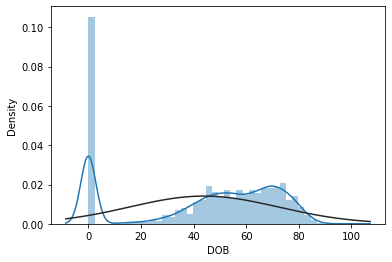

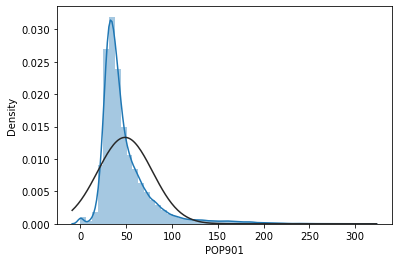

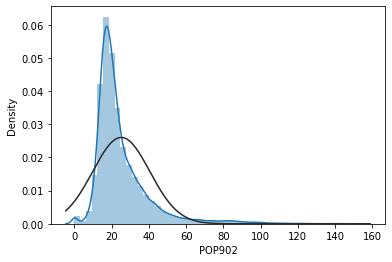

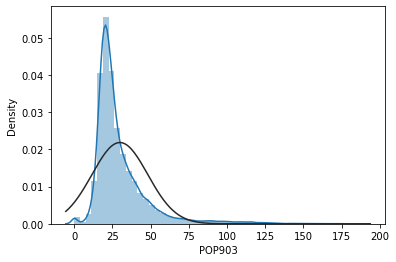

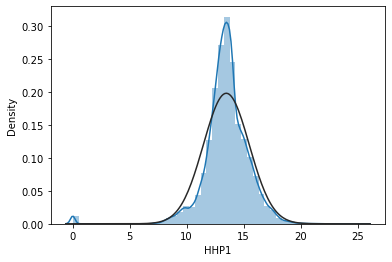

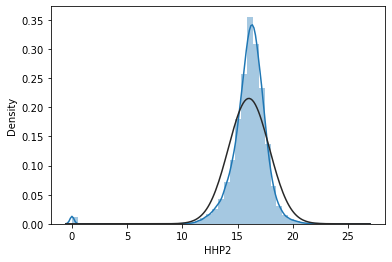

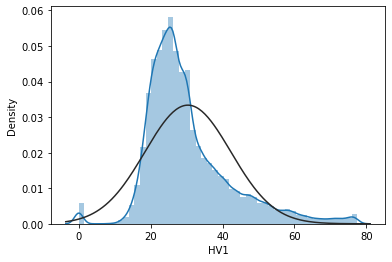

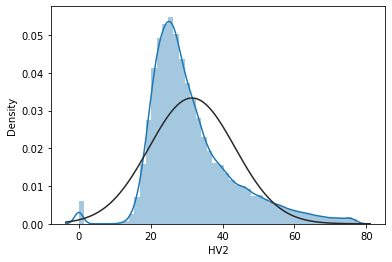

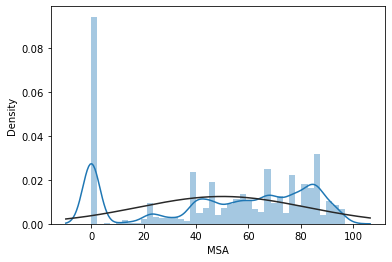

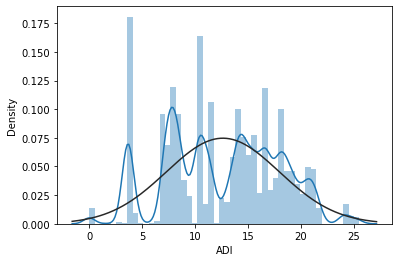

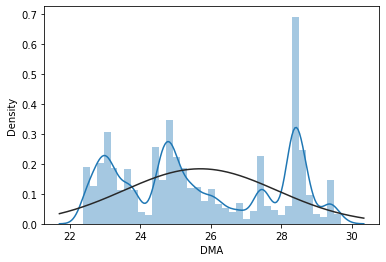

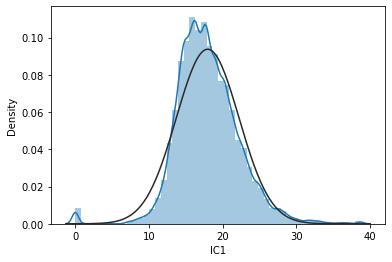

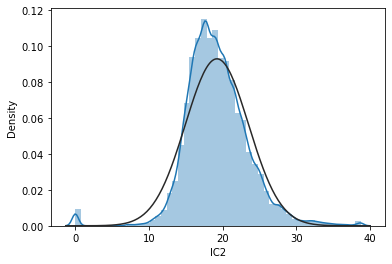

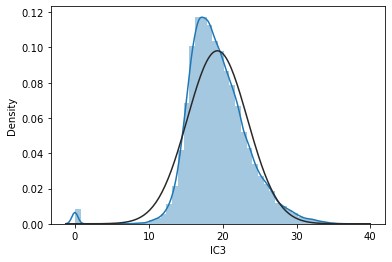

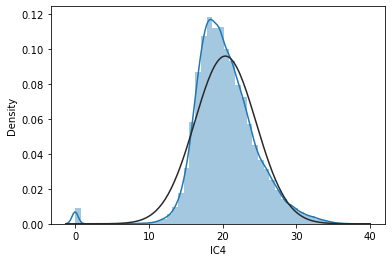

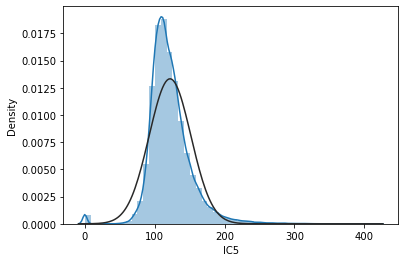

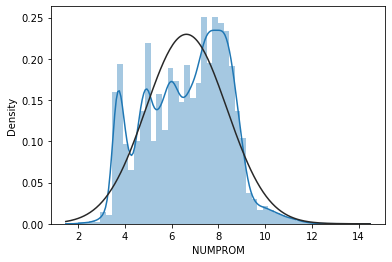

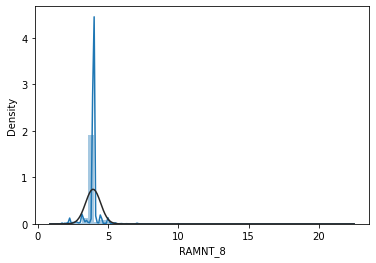

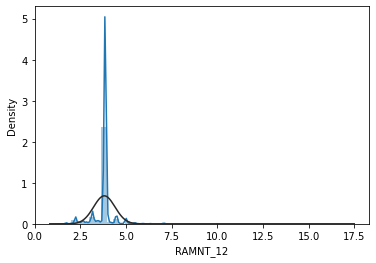

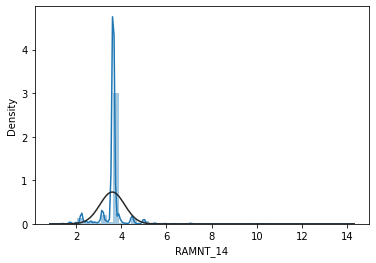

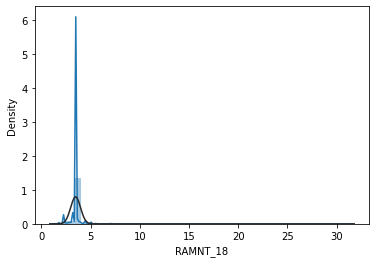

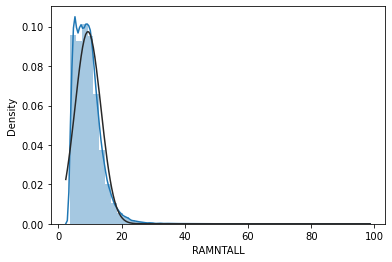

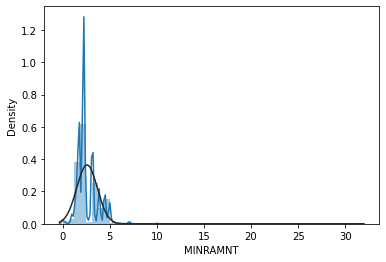

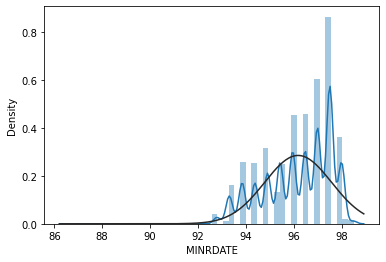

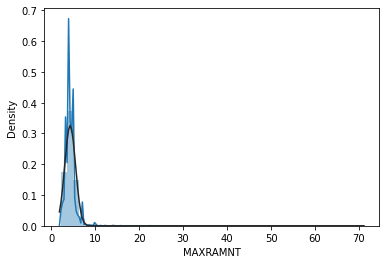

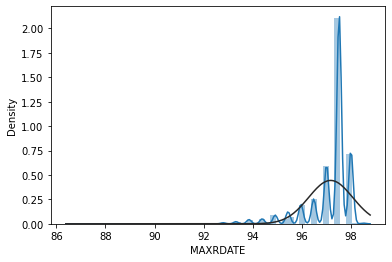

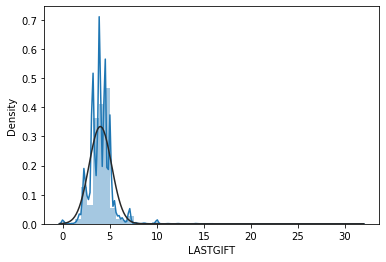

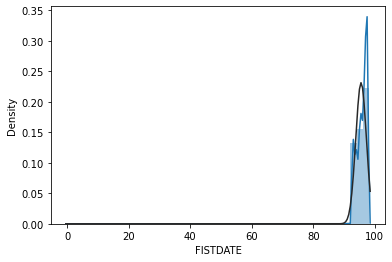

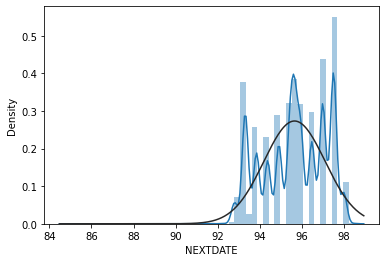

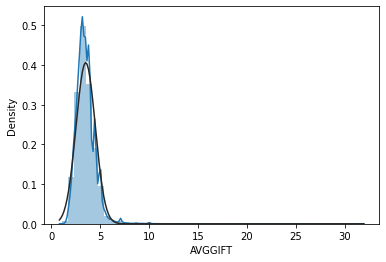

<Figure size 432x288 with 0 Axes>

In [109]:
con_df_sqrt = sqrt_transform_df(con_df)
con_df_sqrt

#### The Log transformation gives better results so I will use this one
However, the distribution plots show that there are still outliers in some of the columns.
I will first try the model with the outliers and will remove them later from the features I will keep for modeling.

### Removing the outliers

In [114]:
def remove_outliers(df, threshold=1.5):
    columns = df.columns
    for col in df.columns:
        upper = np.percentile(df[column], 75)
        lower = np.percentile(df[column], 25)
        iqr = upper - lower
        upper_limit = upper + threshold * iqr
        lower_limit = lower - threshold * iqr
        no_outliers = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    print(round((100 - ((len(no_outliers)/len(df))*100)), 2), '% of dataframe removed')
    return no_outliers

In [116]:
# con_df_no_outliers = remove_outliers(con_df_log, threshold=1.5)

### Standardizing the continuous numerical data

In [117]:
con_df_scaled = standard_scaling(con_df_log)

#### Creating four dataframes, one per target and numerical type

In [118]:
# Separating the targets
y = targets[['TARGET_B']]
y2 = targets[['TARGET_D']]
y['TARGET_B'] = y['TARGET_B'].astype(int)
y2['TARGET_D'] = y2['TARGET_D'].astype(int)

# resetting the index
con_df_scaled.reset_index(drop=True, inplace=True)
dis_df.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
y2.reset_index(drop=True, inplace=True)

# creating four dataframe, one per target and numerical type
con_B = pd.concat([con_df_scaled, y], axis=1)
con_D = pd.concat([con_df_scaled, y2], axis=1)
dis_B = pd.concat([dis_df, y], axis=1)
dis_D = pd.concat([dis_df, y2], axis=1)

## Fixing colinearity

### For target B
##### Continuous data

In [119]:
# Calculating the VIF value
VIF_con_B = VIF(con_B)
VIF_con_B

VIF    Column
3   97.956411    POP903
13  87.145345       IC3
6   79.150890       HV1
7   78.364884       HV2
1   72.382257    POP901
14  57.620308       IC4
11  38.870461       IC1
2   34.338806    POP902
12  33.132809       IC2
5   29.214434      HHP2
4   27.322464      HHP1
15  18.425487       IC5
27  15.585820  FISTDATE
29  13.690543   AVGGIFT
16  10.444640   NUMPROM
24   7.466025  MAXRAMNT
21   7.005832  RAMNTALL
28   5.776596  NEXTDATE
26   4.645414  LASTGIFT
22   4.292487  MINRAMNT
23   3.285671  MINRDATE
25   1.606639  MAXRDATE
9    1.572113       ADI
10   1.437706       DMA
18   1.411494  RAMNT_12
19   1.394799  RAMNT_14
17   1.332622   RAMNT_8
20   1.275511  RAMNT_18
8    1.133557       MSA
0    1.108245       DOB
30   1.008222  TARGET_B

##### Observations
VIF values higher than 10 (5 is the conservative value) is an indicator of multicolinearity.  \
Some of the VIF values of this dataframe are very high, we will therefore remove redundant values.

In [120]:
# Checking our top 10 features that are correlated to TARGET_B: we don't want ro lose them
top10_c_B

correlation
NUMPROM      0.033250
HV2          0.025636
HV1          0.025034
DMA          0.022492
IC4          0.020724
IC5          0.020616
IC2          0.019983
IC3          0.019620
IC1          0.018304
RAMNTALL     0.014712

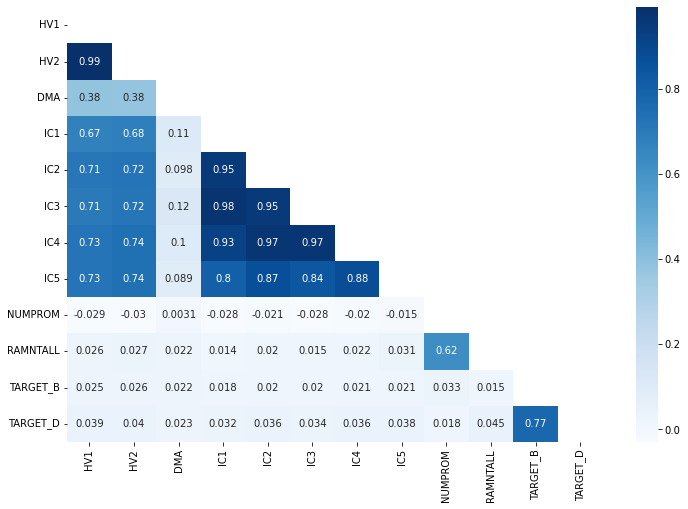

In [121]:
m1

### Generating new features to remove multicollinearities

**IC variables**: \
    - IC1 and IC2 represent median household and median family income. Let's create a column median_household_income.\
    - IC3 and IC4 represent average household and average family income. Let's create a column average_household_income.\
    - **I will only keep IC5, it is the most correlated to the targets.**

**HHP Variables:**\
    - HHP1 Median Person Per Household\
    - HHP2 Average Person Per Household

**HV Variables:**\
    - HV1 Median Home Value in hundreds\
    - HV2 Average Home Value in hundreds

**These are summary variables:**\
    - RAMNTALL Dollar amount of lifetime gifts to date 
    - NGIFTALL Number of lifetime gifts to date 
    - CARDGIFT Number of lifetime gifts to card promotions to date. 
    - I will keep RAMNTALL because it's the most correlated to the target and drop MAXRAMNT.

**POP values:**
    - POP901 Number of Persons\
    - POP902 Number of Families\
    - POP903 Number of Households\
    - I will keep POP902

In [122]:
con_B.columns

Index(['DOB', 'POP901', 'POP902', 'POP903', 'HHP1', 'HHP2', 'HV1', 'HV2',
       'MSA', 'ADI', 'DMA', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'NUMPROM',
       'RAMNT_8', 'RAMNT_12', 'RAMNT_14', 'RAMNT_18', 'RAMNTALL', 'MINRAMNT',
       'MINRDATE', 'MAXRAMNT', 'MAXRDATE', 'LASTGIFT', 'FISTDATE', 'NEXTDATE',
       'AVGGIFT', 'TARGET_B'],
      dtype='object')

In [123]:
con_B2 = con_B.drop(['POP901', 'POP903', 'HHP2', 'HV2', 'IC1', 'IC2', 'IC3', 'IC4','MAXRAMNT', 'FISTDATE','AVGGIFT'], axis=1)

In [124]:
VIF_con_B2 = VIF(con_B2)
VIF_con_B2

VIF    Column
8   7.166210   NUMPROM
13  5.409681  RAMNTALL
3   3.986979       HV1
7   2.829678       IC5
15  2.828439  MINRDATE
17  2.575136  LASTGIFT
14  2.511320  MINRAMNT
18  2.330776  NEXTDATE
5   1.526764       ADI
16  1.460086  MAXRDATE
6   1.388897       DMA
10  1.382540  RAMNT_12
11  1.353825  RAMNT_14
9   1.327270   RAMNT_8
12  1.246006  RAMNT_18
2   1.139304      HHP1
4   1.125284       MSA
0   1.104518       DOB
1   1.050673    POP902
19  1.007790  TARGET_B

### For target B
##### Discrete data
We will use the chi-square for the discrete data

In [125]:
dis_B.head()

ODATEDW  TCODE       AGE    INCOME  WEALTH1  HIT  MALEMILI  MALEVET  \
0     8901      0  60.00000  3.886024      6.2    0         0       39   
1     9401      1  46.00000  6.000000      9.0   16         0       15   
2     9001      1  61.62201  3.000000      1.0    2         0       20   
3     8701      0  70.00000  1.000000      4.0    2         0       23   
4     8601      0  78.00000  3.000000      2.0   60         1       28   

   VIETVETS  WWIIVETS  ...   RAMNT_19   RAMNT_22   RAMNT_24  NGIFTALL  \
0        34        18  ...  13.119329  12.264883   9.000000        31   
1        55        11  ...  13.119329  12.264883  11.367222         3   
2        29        33  ...  13.119329   8.000000   6.000000        27   
3        14        31  ...  13.119329  12.264883  11.367222        16   
4         9        53  ...  13.119329  12.264883  11.367222        37   

   CARDGIFT  LASTDATE  TIMELAG  RFA_2F  CLUSTER2  TARGET_B  
0        14      9512      4.0       4      39.0         0  
1         1      9512     18.0       2       1.0         0  
2        14      9512     12.0       4      60.0         0  
3         7      9512      9.0       4      41.0         0  
4         8      9601     14.0       2      26.0         0  

[5 rows x 296 columns]

In [126]:
def check_relation_target(df, target):
    correlated = []
    not_correlated = []

    for col in df.columns:
        ct_table_ind_=pd.crosstab(df[col], df[target])
        chi2_stat_, p_, dof_, expected_ = stats.chi2_contingency(ct_table_ind_)
        prob = 0.95
        critical_ = chi2.ppf(prob, dof_)
        if abs(chi2_stat_) >= critical_:
            correlated.append(col)
        else:
            not_correlated.append(col)

    _to_remove = []

    for col in df.columns:
        if col in not_correlated:
            _to_remove.append(col)
    print('column removed: ', _to_remove)
    
    df_light = df.drop(_to_remove, axis=1)
    print()
    print('size of new dataframe: ', df_light.shape)
    return df_light

In [127]:
dis_B_light = check_relation_target(dis_B, target = 'TARGET_B')

column removed:  ['WEALTH1', 'HIT', 'MALEMILI', 'MALEVET', 'VIETVETS', 'WWIIVETS', 'LOCALGOV', 'STATEGOV', 'FEDGOV', 'POP90C1', 'POP90C3', 'POP90C4', 'POP90C5', 'ETH2', 'ETH3', 'ETH4', 'ETH5', 'ETH8', 'ETH9', 'ETH11', 'ETH12', 'ETH13', 'ETH14', 'ETH15', 'ETH16', 'AGE902', 'AGE903', 'AGE904', 'AGE905', 'AGE906', 'CHIL1', 'CHIL2', 'CHIL3', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'CHILC2', 'CHILC3', 'CHILC4', 'CHILC5', 'HHAGE1', 'HHAGE2', 'HHAGE3', 'HHN3', 'HHN4', 'MARR1', 'MARR2', 'MARR3', 'MARR4', 'DW1', 'DW2', 'DW3', 'DW4', 'DW5', 'DW6', 'DW7', 'DW8', 'DW9', 'HU1', 'HU2', 'HU5', 'HHD2', 'HHD3', 'HHD4', 'HHD5', 'HHD6', 'HHD8', 'HHD10', 'HHD11', 'HHD12', 'ETHC1', 'ETHC5', 'HUR1', 'RHP1', 'HUPA1', 'HUPA2', 'HUPA3', 'HUPA4', 'HUPA5', 'HUPA6', 'HUPA7', 'RP2', 'RP4', 'IC6', 'IC7', 'IC8', 'IC9', 'IC12', 'IC15', 'IC17', 'IC18', 'IC20', 'IC21', 'HHAS1', 'HHAS2', 'HHAS4', 'MC1', 'MC2', 'MC3', 'TPE1', 'TPE2', 'TPE3', 'TPE4', 'TPE5', 'TPE8', 'TPE9', 'PEC1', 'PEC2', 'TPE10', 'TPE11', 'TPE12', 

In [128]:
dis_B_light.head()

ODATEDW  TCODE       AGE    INCOME  POP90C2  ETH1  ETH7  ETH10  AGE901  \
0     8901      0  60.00000  3.886024       35    92     0      0      39   
1     9401      1  46.00000  6.000000        0    67     2     14      34   
2     9001      1  61.62201  3.000000        2    96     0      0      35   
3     8701      0  70.00000  1.000000        8    61     2      0      32   
4     8601      0  78.00000  3.000000        0     2     0      0      33   

   AGE907  ...   RAMNT_19   RAMNT_22   RAMNT_24  NGIFTALL  CARDGIFT  LASTDATE  \
0      25  ...  13.119329  12.264883   9.000000        31        14      9512   
1      32  ...  13.119329  12.264883  11.367222         3         1      9512   
2      23  ...  13.119329   8.000000   6.000000        27        14      9512   
3      25  ...  13.119329  12.264883  11.367222        16         7      9512   
4      27  ...  13.119329  12.264883  11.367222        37         8      9601   

   TIMELAG  RFA_2F  CLUSTER2  TARGET_B  
0      4.0       4      39.0         0  
1     18.0       2       1.0         0  
2     12.0       4      60.0         0  
3      9.0       4      41.0         0  
4     14.0       2      26.0         0  

[5 rows x 104 columns]

### For target C
##### Continuous data

In [129]:
# Calculating the VIF value
VIF_con_D = VIF(con_D)
VIF_con_D

VIF    Column
3   97.956482    POP903
13  87.145631       IC3
6   79.150399       HV1
7   78.363730       HV2
1   72.381250    POP901
14  57.620370       IC4
11  38.871344       IC1
2   34.338633    POP902
12  33.133317       IC2
5   29.214220      HHP2
4   27.322494      HHP1
15  18.425464       IC5
27  15.585451  FISTDATE
29  13.690819   AVGGIFT
16  10.444088   NUMPROM
24   7.464523  MAXRAMNT
21   7.004403  RAMNTALL
28   5.776668  NEXTDATE
26   4.644750  LASTGIFT
22   4.292487  MINRAMNT
23   3.285284  MINRDATE
25   1.606656  MAXRDATE
9    1.572113       ADI
10   1.437596       DMA
18   1.411431  RAMNT_12
19   1.394762  RAMNT_14
17   1.332086   RAMNT_8
20   1.275507  RAMNT_18
8    1.133553       MSA
0    1.108090       DOB
30   1.005399  TARGET_D

In [130]:
# Checking our top 10 features that are correlated to TARGET_B: we don't want ro lose them
top10_c_D

correlation
RAMNT_14     0.084836
RAMNT_8      0.081792
RAMNT_12     0.062646
LASTGIFT     0.062027
RAMNT_18     0.050520
RAMNTALL     0.044992
AVGGIFT      0.044589
HV2          0.040005
MAXRAMNT     0.039396
HV1          0.039212

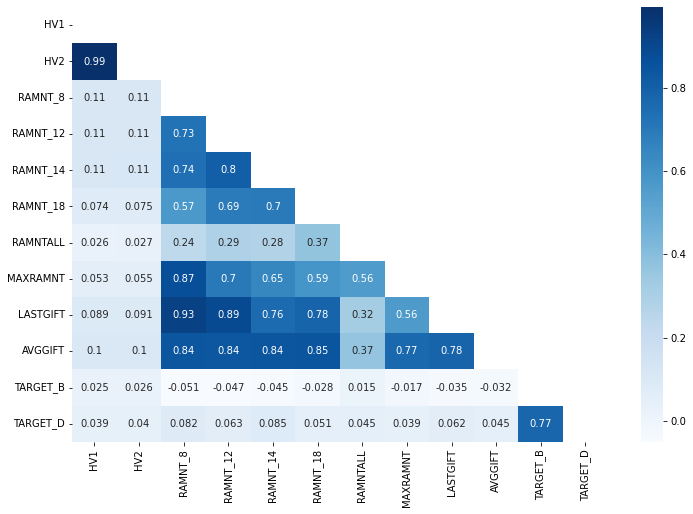

In [131]:
m2

##### Observations
Once again the VIF values are very high and much higher than 10. \
The VIF values of this dataframe are very high, we will therefore remove redundant values.

I also want to keep in mind the top 10 features that I'd ideally want to keep.

In [132]:
con_D.columns

Index(['DOB', 'POP901', 'POP902', 'POP903', 'HHP1', 'HHP2', 'HV1', 'HV2',
       'MSA', 'ADI', 'DMA', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'NUMPROM',
       'RAMNT_8', 'RAMNT_12', 'RAMNT_14', 'RAMNT_18', 'RAMNTALL', 'MINRAMNT',
       'MINRDATE', 'MAXRAMNT', 'MAXRDATE', 'LASTGIFT', 'FISTDATE', 'NEXTDATE',
       'AVGGIFT', 'TARGET_D'],
      dtype='object')

In [133]:
con_D2 = con_D.drop(['POP901', 'POP903', 'HHP2', 'FISTDATE', 'AVGGIFT', 'HV1', 'IC1', 'IC2', 'IC3', 'IC4'], axis=1)

In [134]:
VIF_con_D2 = VIF(con_D2)
VIF_con_D2

VIF    Column
8   7.402505   NUMPROM
13  6.472134  RAMNTALL
16  4.509382  MAXRAMNT
18  4.389522  LASTGIFT
3   3.930519       HV2
7   2.870746       IC5
15  2.853692  MINRDATE
14  2.525096  MINRAMNT
19  2.337688  NEXTDATE
5   1.475511       ADI
17  1.460565  MAXRDATE
10  1.402397  RAMNT_12
6   1.380095       DMA
11  1.374756  RAMNT_14
9   1.330171   RAMNT_8
12  1.253387  RAMNT_18
2   1.130584      HHP1
4   1.125746       MSA
0   1.105331       DOB
1   1.057345    POP902
20  1.005208  TARGET_D

### For target C
##### Discrete data
We will use the chi-square for the discrete data

In [135]:
dis_D.head()

ODATEDW  TCODE       AGE    INCOME  WEALTH1  HIT  MALEMILI  MALEVET  \
0     8901      0  60.00000  3.886024      6.2    0         0       39   
1     9401      1  46.00000  6.000000      9.0   16         0       15   
2     9001      1  61.62201  3.000000      1.0    2         0       20   
3     8701      0  70.00000  1.000000      4.0    2         0       23   
4     8601      0  78.00000  3.000000      2.0   60         1       28   

   VIETVETS  WWIIVETS  ...   RAMNT_19   RAMNT_22   RAMNT_24  NGIFTALL  \
0        34        18  ...  13.119329  12.264883   9.000000        31   
1        55        11  ...  13.119329  12.264883  11.367222         3   
2        29        33  ...  13.119329   8.000000   6.000000        27   
3        14        31  ...  13.119329  12.264883  11.367222        16   
4         9        53  ...  13.119329  12.264883  11.367222        37   

   CARDGIFT  LASTDATE  TIMELAG  RFA_2F  CLUSTER2  TARGET_D  
0        14      9512      4.0       4      39.0         0  
1         1      9512     18.0       2       1.0         0  
2        14      9512     12.0       4      60.0         0  
3         7      9512      9.0       4      41.0         0  
4         8      9601     14.0       2      26.0         0  

[5 rows x 296 columns]

In [136]:
dis_D_light = check_relation_target(dis_D, target = 'TARGET_D')

column removed:  ['ODATEDW', 'WEALTH1', 'HIT', 'MALEMILI', 'VIETVETS', 'STATEGOV', 'POP90C1', 'POP90C2', 'POP90C3', 'POP90C4', 'POP90C5', 'ETH1', 'ETH2', 'ETH4', 'ETH9', 'ETH10', 'ETH11', 'ETH12', 'ETH14', 'ETH15', 'ETH16', 'AGE902', 'AGE907', 'CHIL1', 'CHIL3', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'AGEC6', 'CHILC2', 'CHILC3', 'CHILC4', 'CHILC5', 'HHAGE2', 'HHN1', 'HHN2', 'HHN3', 'HHN4', 'MARR1', 'MARR2', 'MARR3', 'DW3', 'DW7', 'DW8', 'DW9', 'HU3', 'HU4', 'HU5', 'HHD1', 'HHD3', 'HHD4', 'HHD7', 'HHD8', 'HHD9', 'HHD11', 'ETHC1', 'ETHC2', 'ETHC4', 'ETHC5', 'HVP4', 'HVP5', 'HUR1', 'RHP1', 'RHP2', 'RHP3', 'RHP4', 'HUPA1', 'HUPA3', 'HUPA4', 'HUPA5', 'HUPA7', 'RP3', 'RP4', 'IC6', 'IC8', 'IC9', 'IC10', 'IC11', 'IC13', 'IC15', 'IC16', 'IC17', 'IC20', 'IC21', 'IC22', 'HHAS2', 'HHAS3', 'HHAS4', 'MC2', 'MC3', 'TPE1', 'TPE3', 'TPE4', 'TPE5', 'TPE8', 'TPE9', 'PEC1', 'PEC2', 'TPE10', 'TPE11', 'TPE12', 'TPE13', 'LFC6', 'LFC7', 'LFC8', 'LFC9', 'LFC10', 'OCC2', 'OCC5', 'OCC8', 'OCC10', 'OCC11', '

In [137]:
dis_D_light.head()

TCODE       AGE    INCOME  MALEVET  WWIIVETS  LOCALGOV  FEDGOV  ETH3  ETH5  \
0      0  60.00000  3.886024       39        18        10       1     0    11   
1      1  46.00000  6.000000       15        11         6       1     0     6   
2      1  61.62201  3.000000       20        33         6       1     0     2   
3      0  70.00000  1.000000       23        31         3       3     0    32   
4      0  78.00000  3.000000       28        53        26       2     0     1   

   ETH7  ...   RAMNT_19   RAMNT_22   RAMNT_24  NGIFTALL  CARDGIFT  LASTDATE  \
0     0  ...  13.119329  12.264883   9.000000        31        14      9512   
1     2  ...  13.119329  12.264883  11.367222         3         1      9512   
2     0  ...  13.119329   8.000000   6.000000        27        14      9512   
3     2  ...  13.119329  12.264883  11.367222        16         7      9512   
4     0  ...  13.119329  12.264883  11.367222        37         8      9601   

   TIMELAG  RFA_2F  CLUSTER2  TARGET_D  
0      4.0       4      39.0         0  
1     18.0       2       1.0         0  
2     12.0       4      60.0         0  
3      9.0       4      41.0         0  
4     14.0       2      26.0         0  

[5 rows x 115 columns]

### Feature selection - OLS

In [138]:
def OLS(data = [], targets = []):
    dfs = []
    for df in data:
        for target in targets:
            X_constant = sm.add_constant(df)
            model = sm.OLS(target,X_constant).fit()
            results = model.summary()
            print(results)
            results_as_html = results.tables[1].as_html()
            df_ols_summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
            dfs.append(df_ols_summary)
    return dfs

In [139]:
# removing the targets from each dataframe
con_B2.drop(['TARGET_B'], axis=1, inplace=True)
dis_B_light.drop(['TARGET_B'], axis=1, inplace=True)
con_D2.drop(['TARGET_D'], axis=1, inplace=True)
dis_D_light.drop(['TARGET_D'], axis=1, inplace=True)

### For Target B

In [140]:
# running OLS
dfs_ols_B = OLS(data = [con_B2, dis_B_light], targets = [y])
print(dfs_ols_B)

# turning the results in a dataframe
dfs_ols_B_con = dfs_ols_B[0]
dfs_ols_B_dis = dfs_ols_B[1]

                            OLS Regression Results                            
Dep. Variable:               TARGET_B   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     41.08
Date:                Mon, 30 May 2022   Prob (F-statistic):          1.35e-152
Time:                        08:31:46   Log-Likelihood:                 9625.1
No. Observations:               95093   AIC:                        -1.921e+04
Df Residuals:                   95073   BIC:                        -1.902e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0508      0.001     71.618      0.0

### For Target D

In [141]:
# Running OLS
dfs_OLS_D = OLS(data = [con_D2, dis_D_light], targets = [y2])
print(dfs_OLS_D)

# turning the results in a dataframe
dfs_ols_D_con = dfs_OLS_D[0]
dfs_ols_D_dis = dfs_OLS_D[1]

                            OLS Regression Results                            
Dep. Variable:               TARGET_D   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     25.56
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.57e-95
Time:                        08:31:48   Log-Likelihood:            -2.7621e+05
No. Observations:               95093   AIC:                         5.525e+05
Df Residuals:                   95072   BIC:                         5.527e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7934      0.014     55.370      0.0

In [142]:
dfs_OLS_D = OLS(data = [con_D2, dis_D_light], targets = [y2])

                            OLS Regression Results                            
Dep. Variable:               TARGET_D   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     25.56
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.57e-95
Time:                        08:31:49   Log-Likelihood:            -2.7621e+05
No. Observations:               95093   AIC:                         5.525e+05
Df Residuals:                   95072   BIC:                         5.527e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7934      0.014     55.370      0.0

In [143]:
dfs_OLS_D_con = dfs_OLS_D[0]
dfs_OLS_D_con

coef  std err       t  P>|t|  [0.025  0.975]
const     0.7934    0.014  55.370  0.000   0.765   0.821
DOB       0.0242    0.015   1.603  0.109  -0.005   0.054
POP902    0.0026    0.015   0.176  0.861  -0.026   0.031
HHP1     -0.0106    0.015  -0.697  0.486  -0.040   0.019
HV2       0.0632    0.028   2.226  0.026   0.008   0.119
MSA       0.0070    0.015   0.461  0.645  -0.023   0.037
ADI      -0.0018    0.017  -0.103  0.918  -0.036   0.032
DMA       0.0531    0.017   3.152  0.002   0.020   0.086
IC5       0.0868    0.024   3.577  0.000   0.039   0.134
NUMPROM  -0.0862    0.039  -2.210  0.027  -0.163  -0.010
RAMNT_8  -0.0094    0.017  -0.568  0.570  -0.042   0.023
RAMNT_12 -0.0045    0.017  -0.267  0.790  -0.038   0.029
RAMNT_14  0.0392    0.017   2.335  0.020   0.006   0.072
RAMNT_18 -0.0081    0.016  -0.505  0.614  -0.040   0.023
RAMNTALL  0.2579    0.036   7.076  0.000   0.186   0.329
MINRAMNT -0.0150    0.023  -0.659  0.510  -0.060   0.030
MINRDATE  0.0603    0.024   2.490  0.013   0.013   0.108
MAXRAMNT  0.0641    0.030   2.107  0.035   0.004   0.124
MAXRDATE  0.0386    0.017   2.228  0.026   0.005   0.073
LASTGIFT  0.0979    0.030   3.263  0.001   0.039   0.157
NEXTDATE -0.0049    0.022  -0.224  0.823  -0.048   0.038

In [144]:
dfs_OLS_D_dis = dfs_OLS_D[1]
dfs_OLS_D_dis

coef     std err      t  P>|t|     [0.025      0.975]
const    -1.069189e+02  152.341000 -0.702  0.483 -405.50600  191.669000
TCODE    -2.150000e-07    0.000015 -0.014  0.989   -0.00003    0.000029
AGE       9.823000e-07    0.001000  0.001  0.999   -0.00200    0.002000
INCOME    4.470000e-02    0.010000  4.544  0.000    0.02500    0.064000
MALEVET   2.100000e-03    0.002000  0.850  0.395   -0.00300    0.007000
...                ...         ...    ...    ...        ...         ...
CARDGIFT  2.390000e-02    0.009000  2.747  0.006    0.00700    0.041000
LASTDATE  1.300000e-03    0.000000  4.100  0.000    0.00100    0.002000
TIMELAG   1.100000e-03    0.002000  0.584  0.559   -0.00300    0.005000
RFA_2F    4.210000e-02    0.017000  2.531  0.011    0.00900    0.075000
CLUSTER2 -8.000000e-04    0.002000 -0.456  0.648   -0.00400    0.003000

[115 rows x 6 columns]

### I will only keep the columns that have a p value < 0.05

In [145]:
def df_drop_high_p(ols_df, df, metric, threshold):
    ols_to_keep = []
    ols_df['column_name'] = ols_df.index
    ols_df = ols_df[(ols_df[metric] <= 0.05)]
    for x in ols_df['column_name'].unique():
        if x != 'const':
            ols_to_keep.append(x)
    print(ols_to_keep)
    print()
    df = df[ols_to_keep]
    return df   

In [146]:
xcon_B = df_drop_high_p(dfs_ols_B_con, con_B2, 'P>|t|', 0.05)
xdis_B = df_drop_high_p(dfs_ols_B_dis, dis_B_light, 'P>|t|', 0.05)
xcon_D = df_drop_high_p(dfs_ols_D_con, con_D2, 'P>|t|', 0.05)
xdis_D = df_drop_high_p(dfs_ols_D_dis, dis_D_light, 'P>|t|', 0.05)

['DOB', 'HV1', 'DMA', 'IC5', 'NUMPROM', 'RAMNT_8', 'RAMNT_12', 'RAMNT_14', 'RAMNTALL', 'MINRDATE', 'MAXRDATE', 'LASTGIFT', 'NEXTDATE']

['ODATEDW', 'INCOME', 'AGEC6', 'HHD7', 'HHD9', 'HUR2', 'RHP3', 'RHP4', 'EC1', 'ADATE_18', 'CARDPROM', 'RAMNT_24', 'CARDGIFT', 'LASTDATE', 'RFA_2F']

['HV2', 'DMA', 'IC5', 'NUMPROM', 'RAMNT_14', 'RAMNTALL', 'MINRDATE', 'MAXRAMNT', 'MAXRDATE', 'LASTGIFT']

['INCOME', 'LOCALGOV', 'ETH5', 'ETH13', 'HHAGE3', 'HHN6', 'HHD5', 'HHD6', 'RP2', 'OCC7', 'EC1', 'EC4', 'EC8', 'POBC2', 'VOC2', 'HC9', 'NUMPRM12', 'RAMNT_9', 'RAMNT_11', 'RAMNT_22', 'RAMNT_24', 'NGIFTALL', 'CARDGIFT', 'LASTDATE', 'RFA_2F']



In [224]:
num_B = xdis_B.drop(['RFA_2F', 'INCOME', 'ADATE_18'], axis=1)
num_D = xdis_D.drop(['RFA_2F', 'INCOME'], axis=1)

##### Applying distribution transformation (square root transform works better)

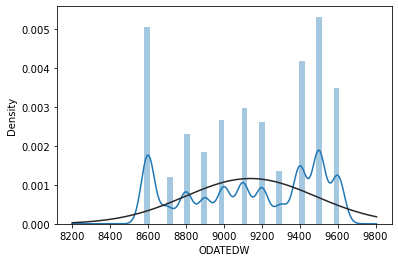

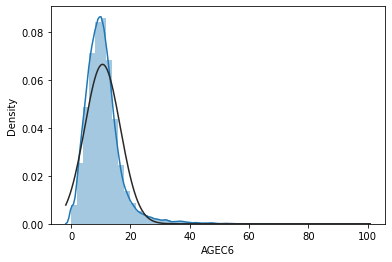

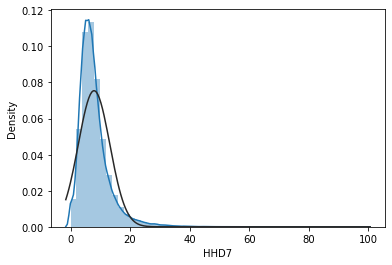

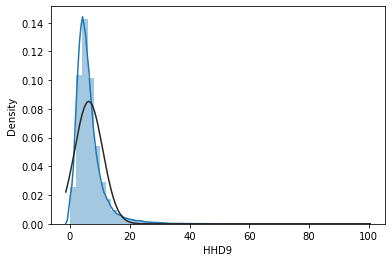

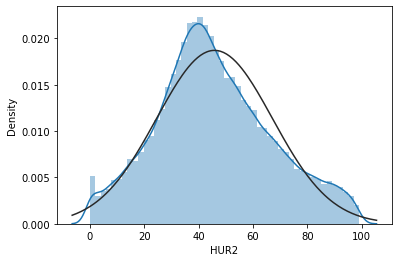

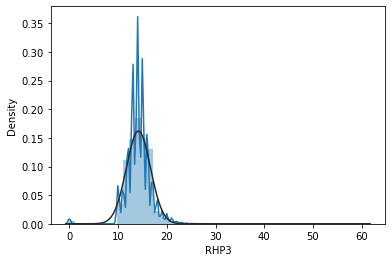

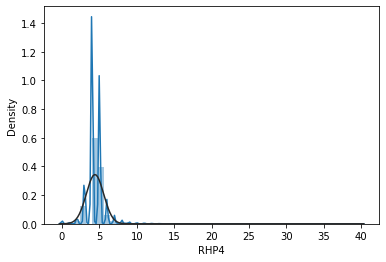

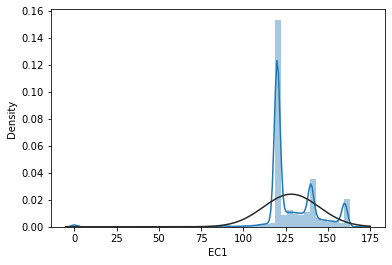

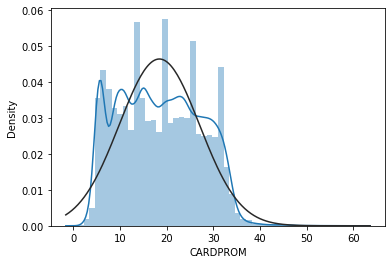

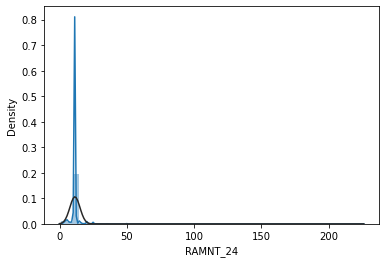

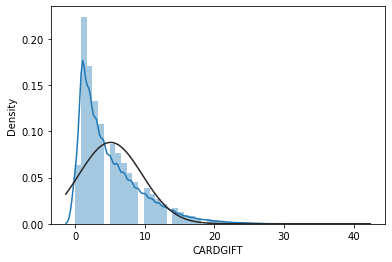

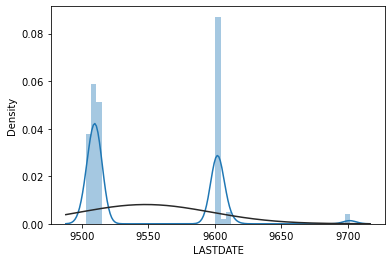

<Figure size 432x288 with 0 Axes>

In [225]:
for col in num_B.columns:
    sns.distplot(num_B[col], fit=norm)
    fig = plt.figure()

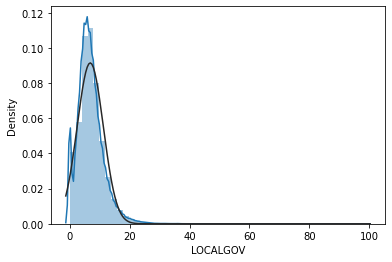

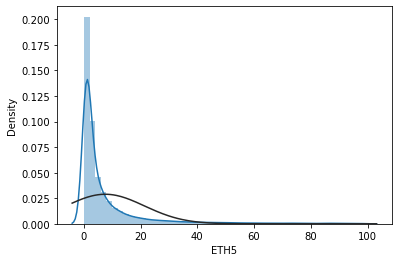

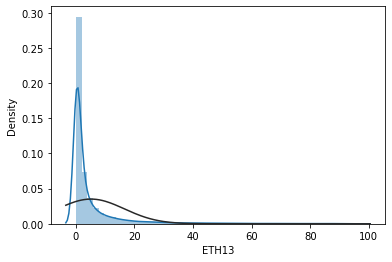

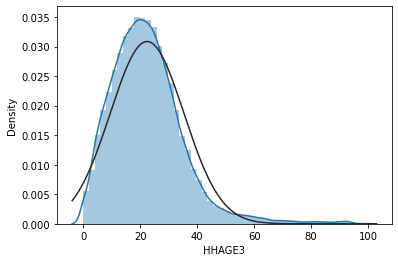

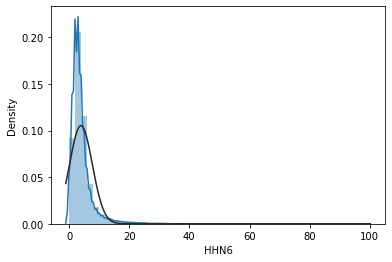

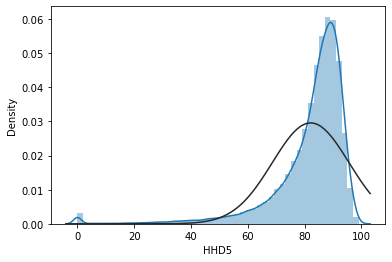

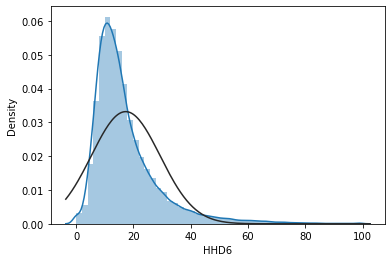

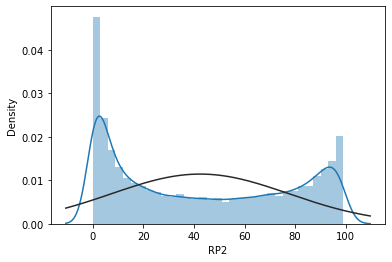

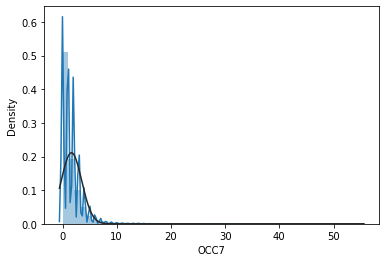

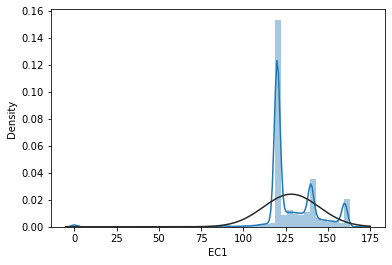

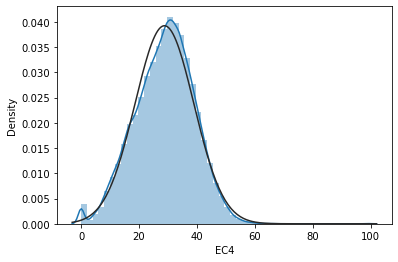

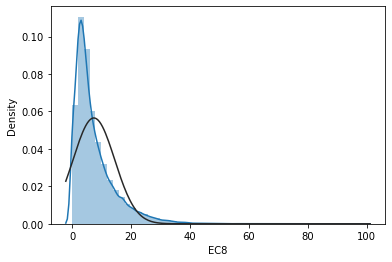

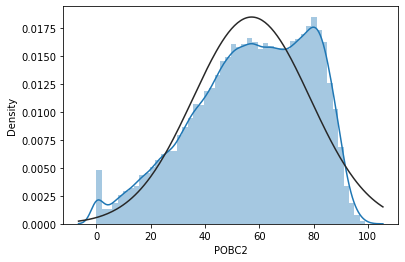

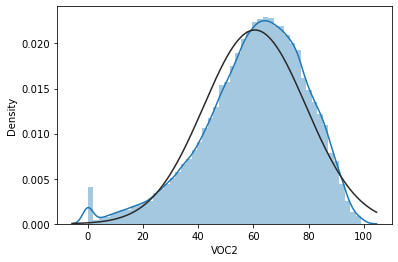

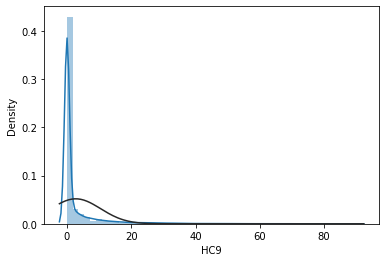

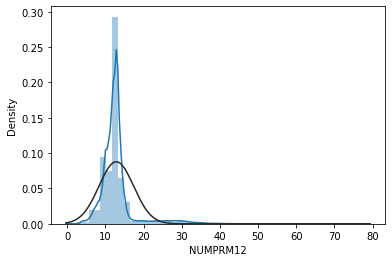

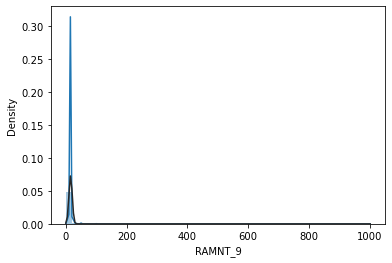

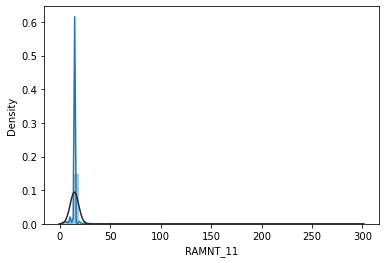

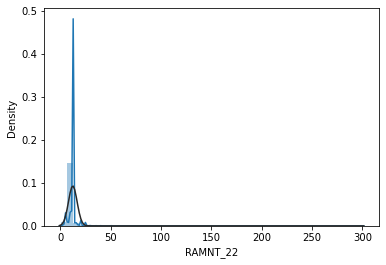

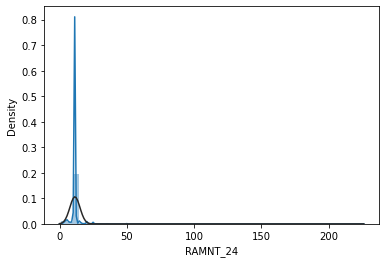

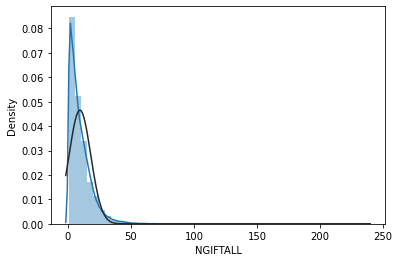

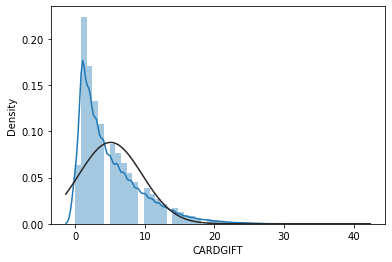

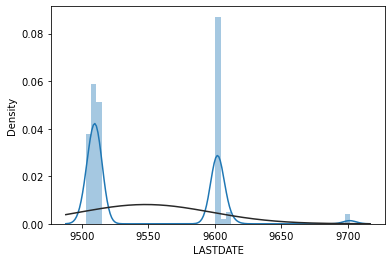

<Figure size 432x288 with 0 Axes>

In [227]:
for col in num_D.columns:
    sns.distplot(num_D[col], fit=norm)
    fig = plt.figure()

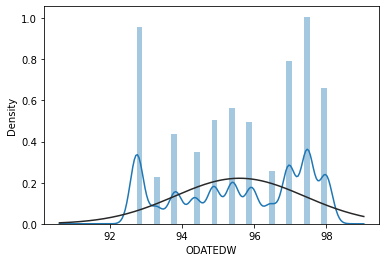

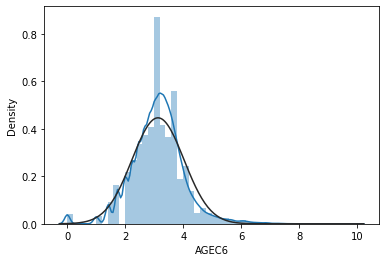

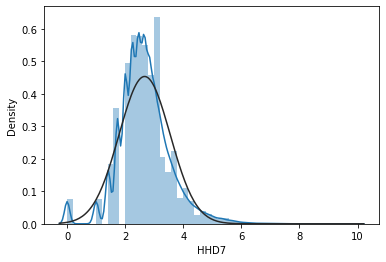

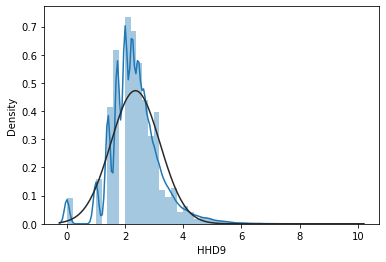

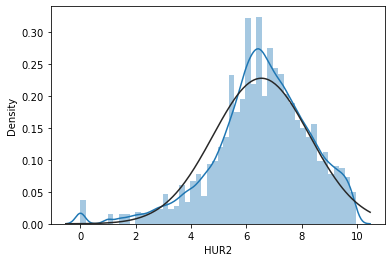

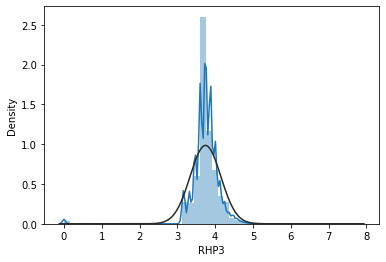

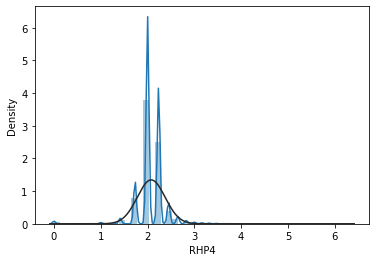

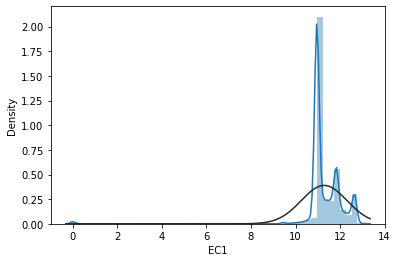

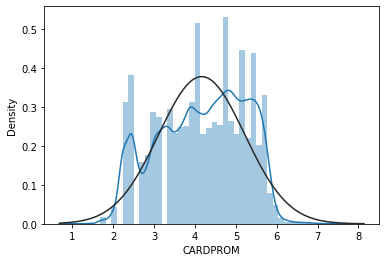

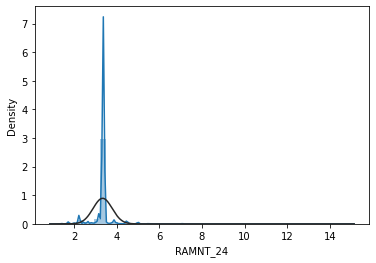

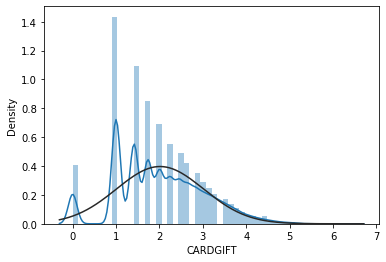

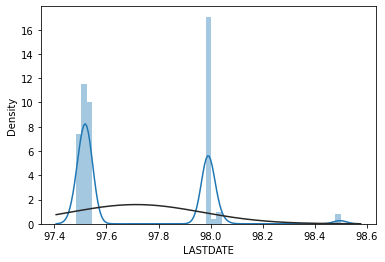

<Figure size 432x288 with 0 Axes>

In [251]:
num_B_sqrt = sqrt_transform_df(num_B)

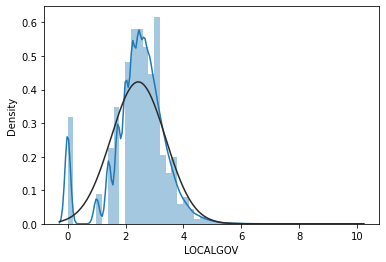

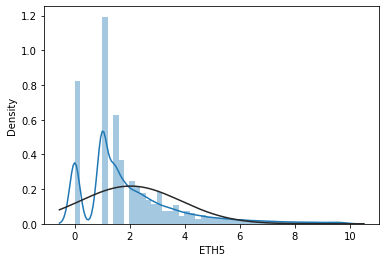

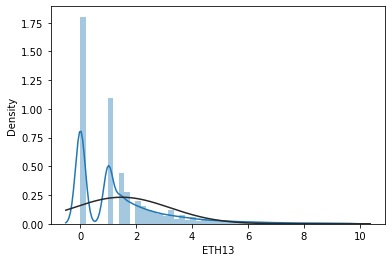

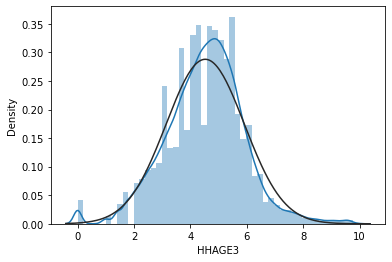

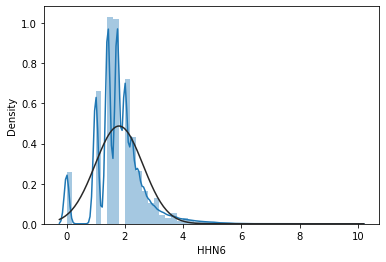

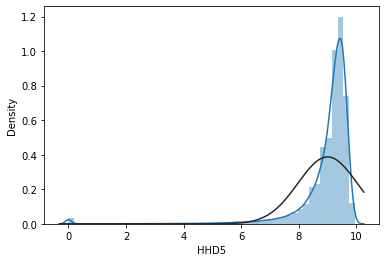

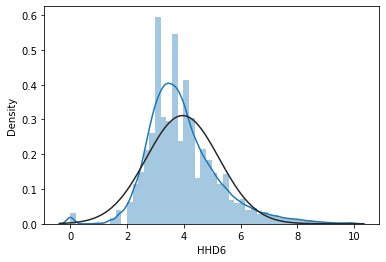

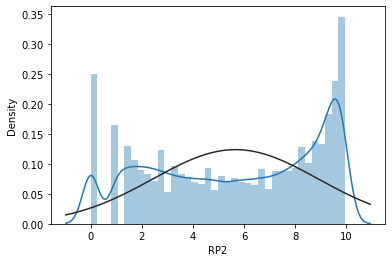

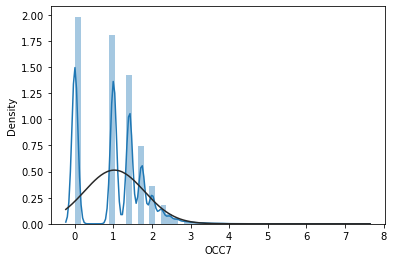

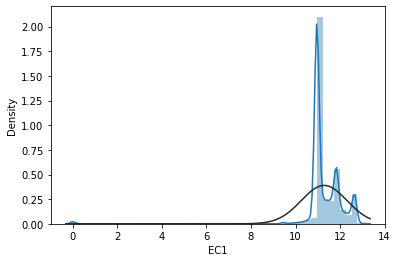

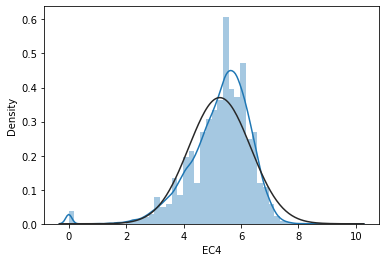

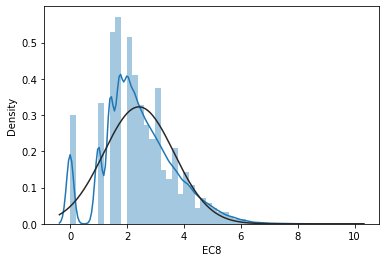

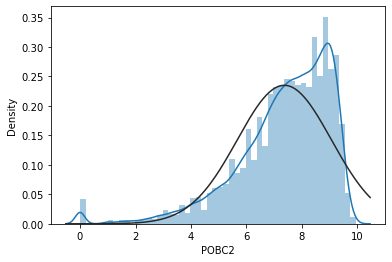

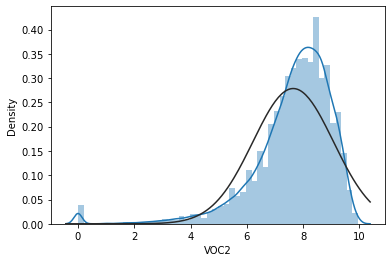

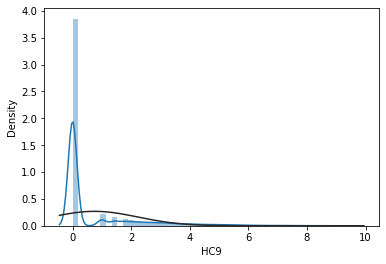

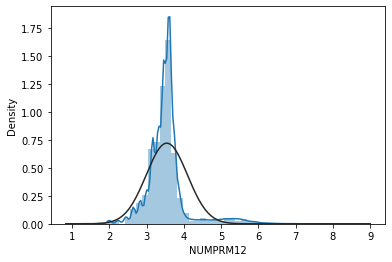

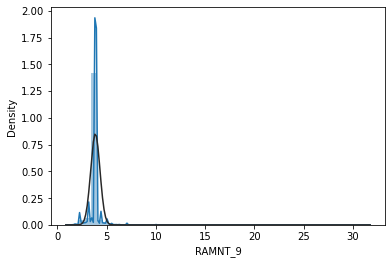

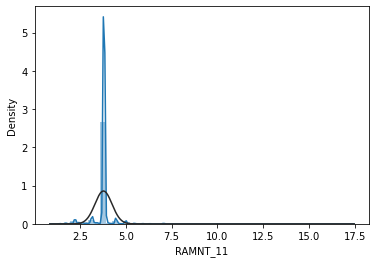

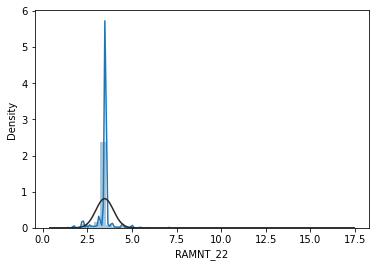

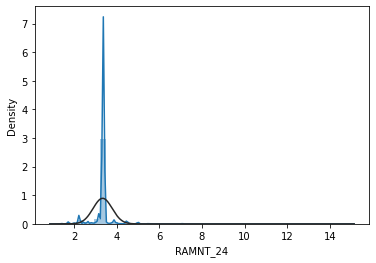

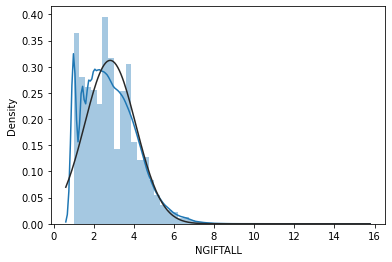

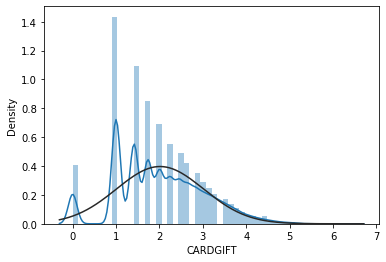

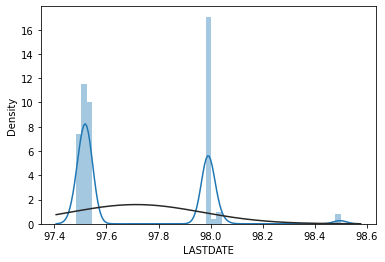

<Figure size 432x288 with 0 Axes>

In [252]:
num_D_sqrt = sqrt_transform_df(num_D)

In [310]:
#num_B_sqrt.LASTDATE.value_counts()

In [304]:
def get_quasi_constant(df):
    to_remove = []
    for col in df.columns:
        maximum = max(list(df[col].value_counts()))
        percent = round(maximum/len(df)*100,2)
        if percent > 75:
            to_remove.append(col)
            print(col)
            print(maximum)
            print(percent, '%')
            print()
    print(to_remove)
    return to_remove

In [305]:
dropB = get_quasi_constant(num_B_sqrt)

[]


In [306]:
num_B_sqrt = num_B_sqrt.drop(['RAMNT_24'], axis=1)

KeyError: "['RAMNT_24'] not found in axis"

In [307]:
dropD = get_quasi_constant(num_D_sqrt)

RAMNT_9
78412
82.46 %

RAMNT_11
80403
84.55 %

RAMNT_22
74316
78.15 %

RAMNT_24
77405
81.4 %

['RAMNT_9', 'RAMNT_11', 'RAMNT_22', 'RAMNT_24']


In [308]:
num_D_sqrt = num_D_sqrt.drop(dropD, axis=1)

In [238]:
def remove_outliers(df, threshold=1.5):
    for col in df.columns:
        upper = np.percentile(df[col], 75)
        lower = np.percentile(df[col], 25)
        iqr = upper - lower
        upper_limit = upper + threshold * iqr
        lower_limit = lower - threshold * iqr
        no_outliers = df[(df[col]>lower_limit) & (df[col]<upper_limit)]
    print(round((100 - ((len(no_outliers)/len(df))*100)), 2), '% of dataframe removed')
    return no_outliers

In [321]:
num_B_no = remove_outliers(num_B_sqrt)
num_D_no = remove_outliers(num_D_sqrt)

0.0 % of dataframe removed
0.0 % of dataframe removed


### Scaling

In [322]:
num_B_scaled = standard_scaling(num_B_no)
num_D_scaled = standard_scaling(num_D_no)

#### INCOME and RFA_2F

In [324]:
last_cat = xdis_B[['INCOME', 'RFA_2F']]

print(last_cat.RFA_2F.unique()) # frequency code
print(last_cat.INCOME.unique()) # household income

# resetting the index
cat_svd.reset_index(drop=True, inplace=True)
last_cat.reset_index(drop=True, inplace=True)

cat_encoded2 = pd.concat([cat_svd,last_cat], axis=1)

[4 2 1 3]
[3.88602444 6.         3.         1.         4.         2.
 7.         5.        ]


### Removing the outliers of the continuous dataframes

In [247]:
xcon_B_no = remove_outliers(xcon_B)
print(xcon_B_no.shape)
xcon_D_no = remove_outliers(xcon_D)
print(xcon_D_no.shape)

17.11 % of dataframe removed
(78820, 13)
16.47 % of dataframe removed
(79434, 10)


### Concatening the dataframes for Classification - TARGET_B and for Regression - TARGET_D

In [376]:
# resetting the index

#cat_encoded.reset_index(drop=True, inplace=True)
cat_encoded2.reset_index(drop=True, inplace=True)
cat_svd.reset_index(drop=True, inplace=True)

xcon_B.reset_index(drop=True, inplace=True)
xcon_B_no.reset_index(drop=True, inplace=True) # merge
#xdis_B.reset_index(drop=True, inplace=True)
num_B_scaled.reset_index(drop=True, inplace=True)

xcon_D.reset_index(drop=True, inplace=True)
xcon_D_no.reset_index(drop=True, inplace=True) # merge
#xdis_D.reset_index(drop=True, inplace=True)
num_D_scaled.reset_index(drop=True, inplace=True)
   
    
# Concatenating the dataframes    
    
#X_B = pd.concat([xcon_B, xdis_B, cat_encoded], axis=1)
#X_D = pd.concat([xcon_D, xdis_D, cat_encoded], axis=1)

X_B = pd.concat([xcon_B, num_B_scaled, cat_encoded2], axis=1)
X3 = pd.concat([con_B2, num_B_scaled, cat_encoded2], axis=1)
XB_ = pd.merge(xcon_B_no, num_B_scaled, how='left', left_index=True, right_index=True) # no outliers
XB = pd.merge(XB_, cat_encoded2, how='left', left_index=True, right_index=True) # no outliers

# for the dataframe for target D we want to predict the donation amount. We will train only on the id that have already given an amount.
X_D = pd.concat([xcon_D, xdis_D, cat_svd], axis=1)
XD_ = pd.merge(xcon_D_no, num_D_scaled, how='left', left_index=True, right_index=True) # no outliers
XD = pd.merge(XD_, cat_encoded2, how='left', left_index=True, right_index=True) # no outliers


#XB = pd.concat([xcon_B, xdis_B], axis=1)
#XD = pd.concat([xcon_D, xdis_D], axis=1)

# Modeling

## Classification - TARGET_B 

In [371]:
# Functions for modeling and model evaluation

def modeling(y, X, model, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    model.fit(X_train, y_train)
    y_pred_class = model.predict(X_test)
    model_count = pd.Series(y_pred_class).value_counts()
    data_count = y_test.value_counts()
    matrix = confusion_matrix(y_test, y_pred_class)
    print(model, ': ')
    print(model_count, '\n')
    print('The data count is: ', data_count, '\n')
    print('The matrix is: ', matrix)
    print('\n')
    return model, y_pred_class, y_test, X_test

def model_accuracy(y_test, y_pred_class):
    confusion = confusion_matrix(y_test, y_pred_class)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    print("Classifier accuracy is: ", round((TP + TN) / float(TP + TN + FP + FN), 2))
    sensitivity = round(TP / float(FN + TP), 2)
    print("The model sensitivity is: ", sensitivity)
    false_negative_rate = round(FN / float( FN + TP), 2)
    print("The model's false negative rate is: ", false_negative_rate)
    specificity = round(TN / (TN + FP), 2)
    print("The model specificity is: ", specificity)
    false_positive_rate = round(FP / float(TN + FP), 2)
    print("The model's false_positive_rate is: ", false_positive_rate)
    return confusion

def matrix_graph(confusion):
    graph = sns.heatmap(confusion, annot=True,fmt='g')
    return graph

def model_scores(model, X_test, y_test, y_pred_class):
    score = model.score(X_test, y_test)
    report = classification_report(y_test, y_pred_class)
    print('The model score is: ', round(model.score(X_test, y_test),4), '\n')
    print('The report is: \n', classification_report(y_test, y_pred_class))
    return score, report

def roc_graph(y_test, X_test, model):
    logit_roc_auc = metrics.roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return ()

def diff_df(y_test, y_pred_class):
    results = pd.DataFrame()
    results['true'] = y_test
    results['pred'] = y_pred_class
    results['difference'] = results.apply(lambda x: 'true'if (x['true'] == x['pred']) else 'false', axis=1)
    results = results.sort_values('difference', ascending=True)
    return results

# function for upsampling the minority class with SMOTE
def smote_modeling(X, y, model, target='offer_accepted', test_size=0.3):
    os = SMOTE(random_state=0)
    X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    columns = X_smote_train.columns
    os_data_X, os_data_y = os.fit_resample(X_smote_train, y_smote_train)
    os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
    os_data_y = pd.DataFrame(data=os_data_y,columns=[target])
    y_smote = os_data_y[target]
    print("length of oversampled data is ",len(os_data_X))
    print("Number of No in oversampled data",len(os_data_y[os_data_y[target]==0]))
    print("Number of Yes",len(os_data_y[os_data_y[target]==1]))
    print("Proportion of No in oversampled data is ",len(os_data_y[os_data_y[target]==0])/len(os_data_X))
    print("Proportion of Yes data in oversampled data is ",len(os_data_y[os_data_y[target]==1])/len(os_data_X))
    print('\n')
    smodel = model.fit(os_data_X, os_data_y )
    y_smote_pred_class = smodel.predict(X_smote_test)
    smodel_count = pd.Series(y_smote_pred_class).value_counts()
    smote_data_count = y_smote_test.value_counts()
    print(smodel, 'is: \n')
    print('model count is:')
    print(smodel_count)
    print('\n')
    print('data count is:')
    print(smote_data_count)
    print('\n')
    return os_data_X, os_data_y, y_smote, smodel, X_smote_test, y_smote_test, y_smote_pred_class

# upsampling and downsampling using Smote-Tomek
def smote_tomek(X, y, model, target='offer_accepted', test_size=0.3):
    smote_tomek = SMOTETomek(random_state=0)
    X_ST_train, X_ST_test, y_ST_train, y_ST_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    columns = X_ST_train.columns
    ST_data_X,ST_data_y = smote_tomek.fit_resample(X_ST_train, y_ST_train)
    ST_data_X = pd.DataFrame(data=ST_data_X,columns=columns )
    ST_data_y = pd.DataFrame(data=ST_data_y,columns=[target])
    y_ST = ST_data_y[target]
    ST_model = model.fit(ST_data_X, ST_data_y )
    y_ST_pred_class = ST_model.predict(X_ST_test)
    ST_model_count = pd.Series(y_ST_pred_class).value_counts()
    ST_data_count = y_ST_test.value_counts()
    print(ST_model, 'is: \n')
    print('model count is:')
    print(ST_model_count)
    print('\n')
    print('data count is:')
    print(ST_data_count)
    print('\n')
    return ST_data_X, ST_data_y, y_ST, ST_model, X_ST_test, y_ST_test, y_ST_pred_class

# upsampling and downsampling using Smote-EEN
def SENN_modeling(X, y, model, target='offer_accepted', test_size=0.3):
    smote_enn = SMOTEENN(random_state=0)
    X_SENN_train, X_SENN_test, y_SENN_train, y_SENN_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    columns = X_SENN_train.columns
    SENN_data_X,SENN_data_y = smote_enn.fit_resample(X_SENN_train, y_SENN_train)
    SENN_data_X = pd.DataFrame(data=SENN_data_X,columns=columns )
    SENN_data_y = pd.DataFrame(data=SENN_data_y,columns=[target])
    y_SENN = SENN_data_y[target]
    SENN_model = model.fit(SENN_data_X, SENN_data_y )
    y_SENN_pred_class = SENN_model.predict(X_SENN_test)
    SENN_model_count = pd.Series(y_SENN_pred_class).value_counts()
    SENN_data_count = y_SENN_test.value_counts()
    print(SENN_model, 'is: \n')
    print('model count is:')
    print(SENN_model_count)
    print('\n')
    print('data count is:')
    print(SENN_data_count)
    print('\n')
    return SENN_data_X, SENN_data_y, y_SENN, SENN_model, X_SENN_test, y_SENN_test, y_SENN_pred_class

# Random Forest function using Smote-EEN for dealing with data imbalance in Target_B
def smote_RF(X, y, model, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    sm = SMOTEENN(random_state=42)
    X_sm, y_sm = sm.fit_resample(X_train, y_train)
    model = model.fit(X_sm, y_sm )
    y_pred_class = model.predict(X_test)
    print (round(model.score(X_train, y_train),4))
    print(round(model.score(X_test, y_test),4))
    matrix = metrics.confusion_matrix(y_test, y_pred_class)
    features_ranking = pd.DataFrame(model.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)
    features_ranking = features_ranking.rename(columns={0: 'feature_importance'})
    return model, y_pred_class, y_test, X_test, features_ranking, matrix

LogisticRegression() : 
0    28528
dtype: int64 

The data count is:  TARGET_B
0           27079
1            1449
dtype: int64 

The matrix is:  [[27079     0]
 [ 1449     0]]


Classifier accuracy is:  0.95
The model sensitivity is:  0.0
The model's false negative rate is:  1.0
The model specificity is:  1.0
The model's false_positive_rate is:  0.0
The model score is:  0.9492 

The report is: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     27079
           1       0.00      0.00      0.00      1449

    accuracy                           0.95     28528
   macro avg       0.47      0.50      0.49     28528
weighted avg       0.90      0.95      0.92     28528



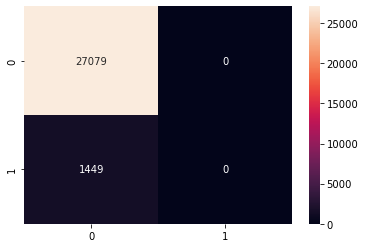

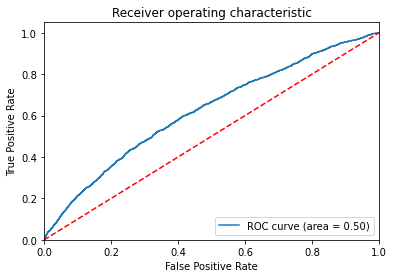

In [327]:
model_B1, y_pred_class_B1, y_test_B1, X_test_B1 = modeling(y, X_B, LogisticRegression(multi_class='auto'), test_size=0.3)
accuracy_B1 = model_accuracy(y_test_B1, y_pred_class_B1)
confusion_matrix_B1 = matrix_graph(accuracy_B1)
score_B1, report_B1 = model_scores(model_B1, X_test_B1, y_test_B1, y_pred_class_B1)
roc_curve_B1 = roc_graph(y_test_B1, X_test_B1, model_B1)

#### We are clearly dealing with a very imbalanced dataset

In [328]:
y.value_counts()

TARGET_B
0           90263
1            4830
dtype: int64

## Reducing data imbalance

##### With SMOTE-Tomek

LogisticRegression() is: 

model count is:
0    14560
1     9214
dtype: int64


data count is:
TARGET_B
0           22566
1            1208
dtype: int64


Classifier accuracy is:  0.61
The model sensitivity is:  0.52
The model's false negative rate is:  0.48
The model specificity is:  0.62
The model's false_positive_rate is:  0.38
The model score is:  0.6145 

The report is: 
               precision    recall  f1-score   support

           0       0.96      0.62      0.75     22566
           1       0.07      0.52      0.12      1208

    accuracy                           0.61     23774
   macro avg       0.51      0.57      0.44     23774
weighted avg       0.91      0.61      0.72     23774



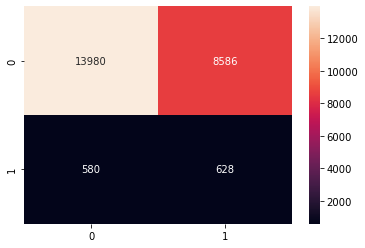

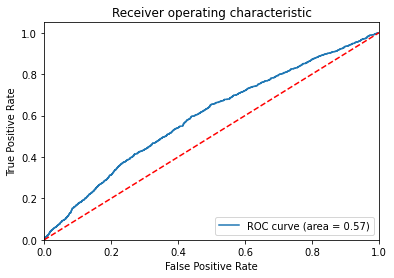

In [329]:
ST_data_X, ST_data_y, y_ST, ST_model, X_ST_test, y_ST_test, y_ST_pred_class = smote_tomek(X_B, y, LogisticRegression(multi_class='auto'), target='TARGET_B', test_size=0.25)
accuracy_B_ST = model_accuracy(y_ST_test, y_ST_pred_class)
confusion_matrix_B_ST = matrix_graph(accuracy_B_ST)
score_B_ST, report_B_ST = model_scores(ST_model, X_ST_test, y_ST_test, y_ST_pred_class)
roc_curve_B_ST = roc_graph(y_ST_test, X_ST_test, ST_model)

##### With SMOTE-EEN

LogisticRegression() is: 

model count is:
0    14560
1     9214
dtype: int64


data count is:
TARGET_B
0           22566
1            1208
dtype: int64


Classifier accuracy is:  0.61
The model sensitivity is:  0.52
The model's false negative rate is:  0.48
The model specificity is:  0.62
The model's false_positive_rate is:  0.38
The model score is:  0.6145 

The report is: 
               precision    recall  f1-score   support

           0       0.96      0.62      0.75     22566
           1       0.07      0.52      0.12      1208

    accuracy                           0.61     23774
   macro avg       0.51      0.57      0.44     23774
weighted avg       0.91      0.61      0.72     23774



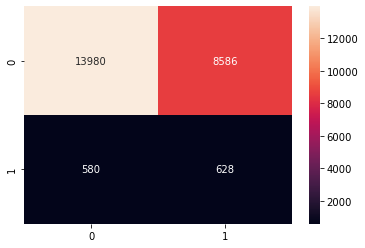

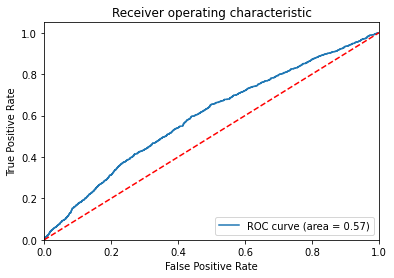

In [330]:
SE_data_X, SE_data_y, y_SE, SE_model, X_SE_test, y_SE_test, y_SE_pred_class = smote_tomek(X_B, y, LogisticRegression(multi_class='auto'), target='TARGET_B', test_size=0.25)
accuracy_B_SE = model_accuracy(y_SE_test, y_SE_pred_class)
confusion_matrix_B_SE = matrix_graph(accuracy_B_SE)
score_B_SE, report_B_SE = model_scores(SE_model, X_SE_test, y_SE_test, y_SE_pred_class)
roc_curve_B_SE = roc_graph(y_SE_test, X_SE_test, SE_model)

In [331]:
RFC_model, RFC_y_pred_class, RFC_y_test, RFC_X_test, RFC_features_ranking, RFC_matrix = smote_RF(XB, y, RandomForestClassifier(), test_size=0.3)
print(RFC_features_ranking)
RFC_matrix

0.9848
0.9239
          feature_importance
LASTGIFT            0.134990
INCOME              0.092761
RAMNT_14            0.076517
MAXRDATE            0.073561
RAMNT_12            0.058738
DMA                 0.042136
DOB                 0.040259
MINRDATE            0.034202
RAMNT_8             0.033755
RAMNTALL            0.030192
NEXTDATE            0.029328
HUR2                0.028893
RAMNT_24            0.028100
HV1                 0.027624
LASTDATE            0.025970
RHP4                0.025644
NUMPROM             0.025047
IC5                 0.024952
AGEC6               0.021058
RFA_2F              0.020059
EC1                 0.019231
HHD7                0.018909
CARDPROM            0.018668
HHD9                0.018020
CARDGIFT            0.016219
RHP3                0.016174
ODATEDW             0.012147
ADATE_18            0.006847


array([[26286,   793],
       [ 1378,    71]], dtype=int64)

In [333]:
# Number of trees in random forest
n_estimators = np.linspace(2000, 2500, int((2500-200)/150) + 1, dtype=int)

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [1, 2, 3]

# Minimum number of samples required to split a node
min_samples_split = [1, 3, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]

# Method of selecting samples for training each tree
bootstrap = [True]

# Criterion
criterion=['gini']
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X_B, y, test_size=0.3, random_state=42, stratify=y)
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
rf_random.fit(X_sm, y_sm)
rf_random.best_params_

print (' \n', round(rf_random.score(X_train, y_train),4))
print('\n', round(rf_random.score(X_test, y_test),4))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
 
 0.158

 0.1577


In [335]:
rf_random.best_params_

{'n_estimators': 2300,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 3,
 'criterion': 'gini',
 'bootstrap': True}

In [336]:
rfc = RandomForestClassifier(n_estimators=2300, min_samples_split=3, min_samples_leaf=1, max_depth=3, criterion='gini', bootstrap=True, max_features='sqrt')
rfc.fit(X_sm, y_sm)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X_B, y, cv=10, scoring='roc_auc')
print('Confusion Matrix')
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print('Classification Report')
print(classification_report(y_test, rfc_predict))
print('\n')
print('All AUC Scores')
print(rfc_cv_score)
print('\n')
print('Mean AUC Score')
print('Mean AUC Score - Random Forest: ', rfc_cv_score.mean())

Confusion Matrix
[[ 3207 23872]
 [   95  1354]]


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.12      0.21     27079
           1       0.05      0.93      0.10      1449

    accuracy                           0.16     28528
   macro avg       0.51      0.53      0.16     28528
weighted avg       0.92      0.16      0.21     28528



All AUC Scores
[0.61402106 0.58015831 0.61574903 0.61617531 0.61514264 0.62912226
 0.58435924 0.62495258 0.63017237 0.60649497]


Mean AUC Score
Mean AUC Score - Random Forest:  0.6116347759242162


In [337]:
features_ranking = pd.DataFrame(rfc.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)
features_ranking = features_ranking.rename(columns={0: 'feature_importance'})
features_ranking

feature_importance
LASTGIFT            0.155125
CARDGIFT            0.106361
RAMNT_14            0.079139
RHP4                0.069645
RAMNT_8             0.060482
...                      ...
44                  0.000067
15                  0.000062
41                  0.000057
48                  0.000051
11                  0.000040

[76 rows x 1 columns]

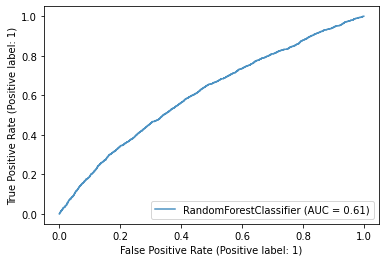

In [338]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

### Keeping the best features

In [378]:
best_features = list(features_ranking.index)
best_features = best_features[:30]
X_B_best = X_B[best_features]

best2 = []
for x in best_features:
    if x in XB:
        best2.append(x)
        
XB_best = XB[best2]
        
best3 = []
for x in best_features:
    if x in X3:
        best3.append(x)

X3_best = X3[best3]

LogisticRegression(class_weight='balanced') is: 

model count is:
0    14360
1     9414
dtype: int64


data count is:
TARGET_B
0           22566
1            1208
dtype: int64


Classifier accuracy is:  0.61
The model sensitivity is:  0.53
The model's false negative rate is:  0.47
The model specificity is:  0.61
The model's false_positive_rate is:  0.39
The model score is:  0.607 

The report is: 
               precision    recall  f1-score   support

           0       0.96      0.61      0.75     22566
           1       0.07      0.53      0.12      1208

    accuracy                           0.61     23774
   macro avg       0.51      0.57      0.43     23774
weighted avg       0.92      0.61      0.72     23774



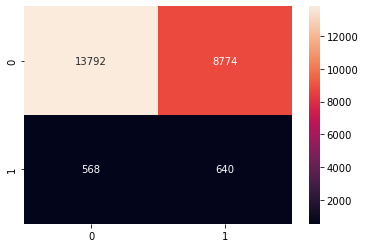

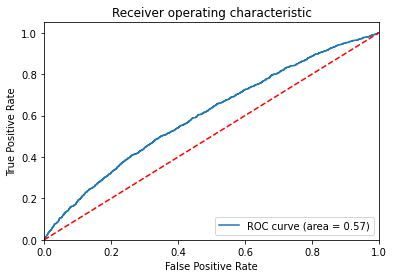

In [381]:
ST_data_X, ST_data_y, y_ST, ST_model, X_ST_test, y_ST_test, y_ST_pred_class = smote_tomek(X_B_best, y, LogisticRegression(multi_class='auto', class_weight='balanced'), target='TARGET_B', test_size=0.25)
accuracy_B_ST = model_accuracy(y_ST_test, y_ST_pred_class)
confusion_matrix_B_ST = matrix_graph(accuracy_B_ST)
score_B_ST, report_B_ST = model_scores(ST_model, X_ST_test, y_ST_test, y_ST_pred_class)
roc_curve_B_ST = roc_graph(y_ST_test, X_ST_test, ST_model)

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X_B_best, y, test_size=0.3, random_state=42, stratify=y)
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
rf_random.fit(X_sm, y_sm)
rf_random.best_params_

print (' \n', round(rf_random.score(X_train, y_train),4))
print('\n', round(rf_random.score(X_test, y_test),4))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
 
 0.6708

 0.6739


In [383]:
rf_random.best_params_

{'n_estimators': 2100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'gini',
 'bootstrap': True}

In [384]:
rfc = RandomForestClassifier(n_estimators=2100, min_samples_split=5, min_samples_leaf=2, max_depth=3, criterion='gini', bootstrap=True, max_features='auto')
rfc.fit(X_sm, y_sm)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X_B, y, cv=10, scoring='roc_auc')
print('Confusion Matrix')
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print('Classification Report')
print(classification_report(y_test, rfc_predict))
print('\n')
print('All AUC Scores')
print(rfc_cv_score)
print('\n')
print('Mean AUC Score')
print('Mean AUC Score - Random Forest: ', rfc_cv_score.mean())

Confusion Matrix
[[18515  8564]
 [  783   666]]


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     27079
           1       0.07      0.46      0.12      1449

    accuracy                           0.67     28528
   macro avg       0.52      0.57      0.46     28528
weighted avg       0.91      0.67      0.76     28528



All AUC Scores
[0.61425982 0.58053972 0.61638663 0.61644208 0.6161955  0.62969572
 0.58536439 0.62490785 0.6305598  0.60714756]


Mean AUC Score
Mean AUC Score - Random Forest:  0.6121499059554992


In [385]:
features_ranking = pd.DataFrame(rfc.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)
features_ranking = features_ranking.rename(columns={0: 'feature_importance'})
features_ranking

feature_importance
LASTGIFT            0.193824
RAMNT_14            0.118476
RHP4                0.118125
EC1                 0.090198
CARDGIFT            0.087437
RAMNT_8             0.053012
LASTDATE            0.051781
RAMNT_12            0.051516
RHP3                0.045734
MAXRDATE            0.045184
INCOME              0.030521
2                   0.021526
HHD9                0.018492
DMA                 0.012181
HHD7                0.012053
DOB                 0.010157
MINRDATE            0.008489
8                   0.006497
RAMNTALL            0.003590
ODATEDW             0.003445
CARDPROM            0.003225
13                  0.002951
0                   0.002855
AGEC6               0.002591
RFA_2F              0.001921
IC5                 0.001271
NUMPROM             0.001260
1                   0.000816
NEXTDATE            0.000731
5                   0.000143

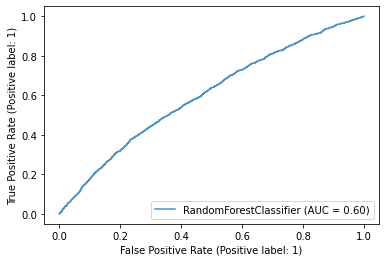

In [386]:
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
plt.show()